# Machine Learning Project

We start by importing the necessary packages for analysis.

In [32]:
# install.packages('ggplot2')
# install.packages('reshape2')
# install.packages('gridExtra')
# install.packages("reticulate")
# install.packages("tidyverse")
# install.packages("GGally")
# install.packages("plotly")


# install.packages("factoextra")
# install.packages("FactoMineR")
# install.packages("corrplot")
# install.packages("glmnet")
# install.packages("ggfortify")
# install.packages("pROC")

In [2]:
library(reticulate)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
# PARTIE 1
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet)
library(ggfortify)
library(pROC)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement du package : ‘reshape2’


L'objet sui

## Analyse exploratoire des données

### Question 1

In [3]:
# Download data
path <- ""
data <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", header = TRUE)

# Printing data
head(data)
summary(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [4]:
# Changing the type of qualitative variables into factors
# data[, "Entity"] <- as.factor(data[, "Entity"])
#data[, "Year"] <- as.factor(data[, "Year"])
year <- as.factor(data$Year)
data[, "Density.n.P.Km2."] <-as.numeric(gsub(",",".",data$Density.n.P.Km2.))

### Question 2

In the next section, we look for missing values in the dataset

In [5]:
# Count the number of missing values in the entire data frame
num_missing = sum(is.na(data))
print(num_missing)


[1] 6978


In [6]:
# Checking which columbs are missing values
for (col_name in colnames(data)) {
  print(paste(col_name))
  print(sum(is.na(data[[col_name]])))
}

[1] "Entity"
[1] 0
[1] "Year"
[1] 0
[1] "Access.to.electricity....of.population."
[1] 10
[1] "Access.to.clean.fuels.for.cooking"
[1] 169
[1] "Renewable.electricity.generating.capacity.per.capita"
[1] 931
[1] "Financial.flows.to.developing.countries..US..."
[1] 2089
[1] "Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] 194
[1] "Electricity.from.fossil.fuels..TWh."
[1] 21
[1] "Electricity.from.nuclear..TWh."
[1] 126
[1] "Electricity.from.renewables..TWh."
[1] 21
[1] "Low.carbon.electricity....electricity."
[1] 42
[1] "Primary.energy.consumption.per.capita..kWh.person."
[1] 0
[1] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] 207
[1] "Value_co2_emissions_kt_by_country"
[1] 428
[1] "Renewables....equivalent.primary.energy."
[1] 2137
[1] "gdp_growth"
[1] 317
[1] "gdp_per_capita"
[1] 282
[1] "Density.n.P.Km2."
[1] 1
[1] "Land.Area.Km2."
[1] 1
[1] "Latitude"
[1] 1
[1] "Longitude"
[1] 1


** Many variables are have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset: **

* Renewable-electricity-generating-capacity-per-capitacapitacapitacapita

*   Financial flows to developing countries (US Dollars)
*
Renewables (% equivalent primary energy).

In [7]:
# Columns to remove
columns_to_remove = c("Financial.flows.to.developing.countries..US...", "Renewable.electricity.generating.capacity.per.capita", "Renewables....equivalent.primary.energy.")
Financial
data <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                   sep = ",", header = TRUE)
year <- as.factor(data$Year)
data[, "Density.n.P.Km2."] <-as.numeric(gsub(",",".",data$Density.n.P.Km2.))

# Removeing the specified columns from the data frame
data = data[, -which(names(data) %in% columns_to_remove)]
head(data)


,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,44.99,0.16,0,0.31,65.95744,302.5948,1.64,760,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,45.60,0.09,0,0.50,84.74577,236.8919,1.74,730,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,37.83,0.13,0,0.56,81.15942,210.8622,1.40,1030,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,36.66,0.31,0,0.63,67.02128,229.9682,1.40,1220,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,44.24,0.33,0,0.56,62.92135,204.2312,1.20,1030,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,33.88,0.34,0,0.59,63.44086,252.0691,1.41,1550,11.229715,242.0313,60,652230,33.93911,67.70995


### Question 3

For the rest of this project, we decided to use a data set containing only individuals with no missing values. This leaves 2868 observations, which is verified bellow.

In [8]:
print('Dimension of the original data set')
dim(data)
data_complete = data[complete.cases(data), ]
print('Dimension of the new data set')
dim(data_complete)
data=data_complete

[1] "Dimension of the original data set"


[1] 3649   18

[1] "Dimension of the new data set"


[1] 2868   18

## Question 4
Unidimensional descriptive analysis of data

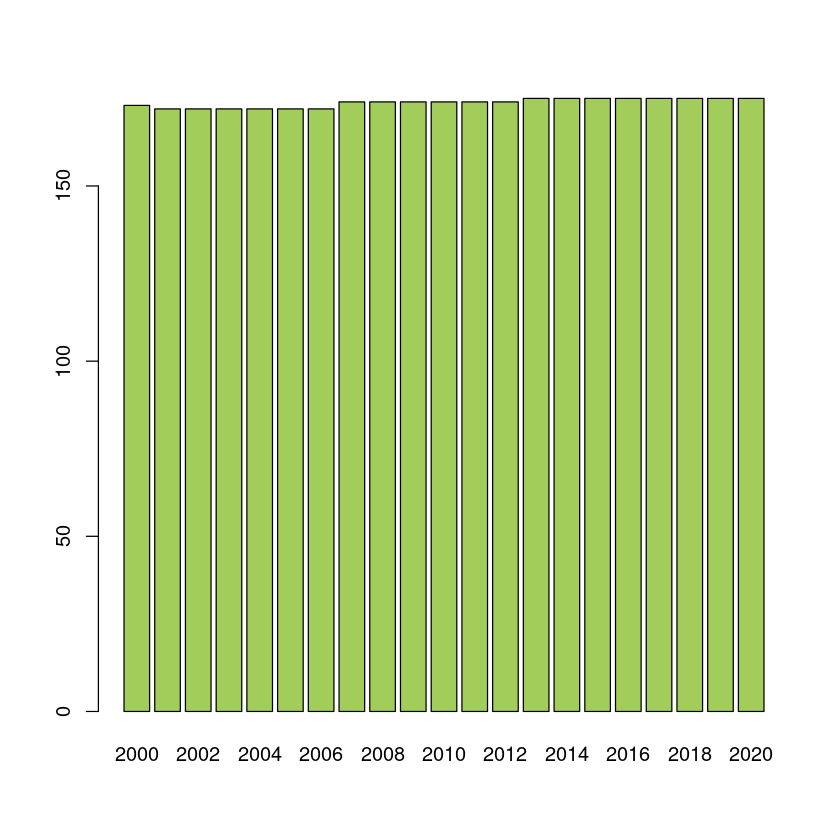

In [9]:
# Variables qualitatives
barplot.default(summary(year), col = "darkolivegreen3")
#entity <- as.factor(data$Entity)
#barplot.default(summary(entity), col = "darkolivegreen3")

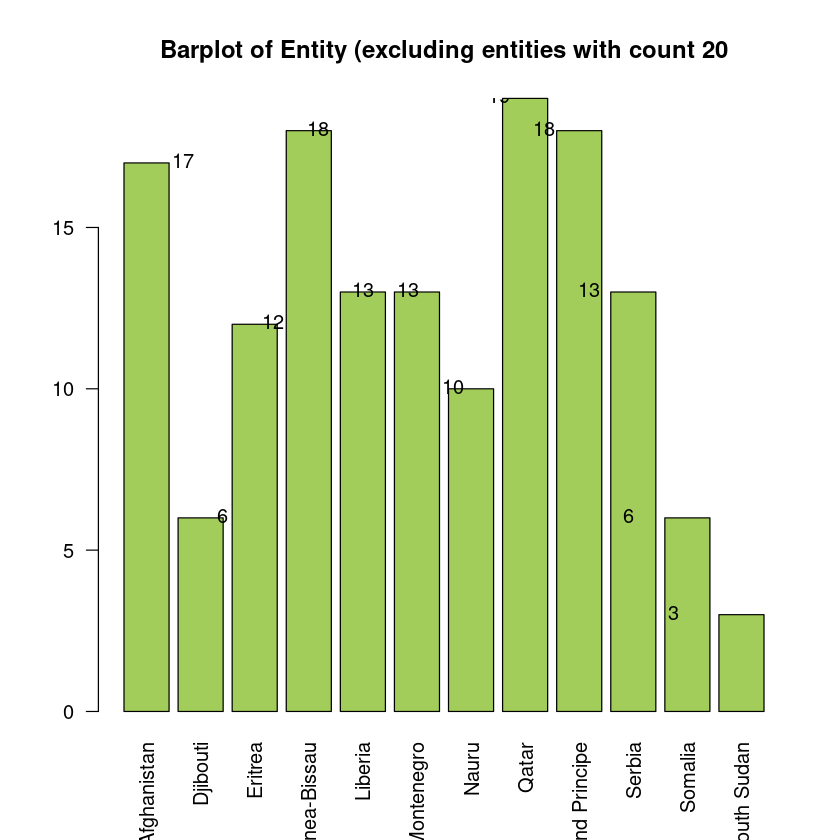

In [10]:
# Assuming 'data' is your data frame
entity_counts <- table(data$Entity)

# Set the threshold for the minimum number of appearances
appearance_threshold <- 20

# Get entities with count not equal to the threshold
filtered_entities <- names(entity_counts[entity_counts != appearance_threshold])

# Filter data for entities with count not equal to the threshold
filtered_data <- data[data$Entity %in% filtered_entities, ]

# Create a table of frequencies for the 'Entity' column in the filtered data
entity_table <- table(filtered_data$Entity)

# Create a barplot for the table of frequencies with rotated x-axis labels
barplot(entity_table, col = "darkolivegreen3", main = "Barplot of Entity (excluding entities with count 20",
        names.arg = filtered_entities, las = 2)

# Add counts as text labels on each bar
text(seq_along(entity_table), entity_table, labels = entity_table, pos = 4, col = "black", cex = 1)


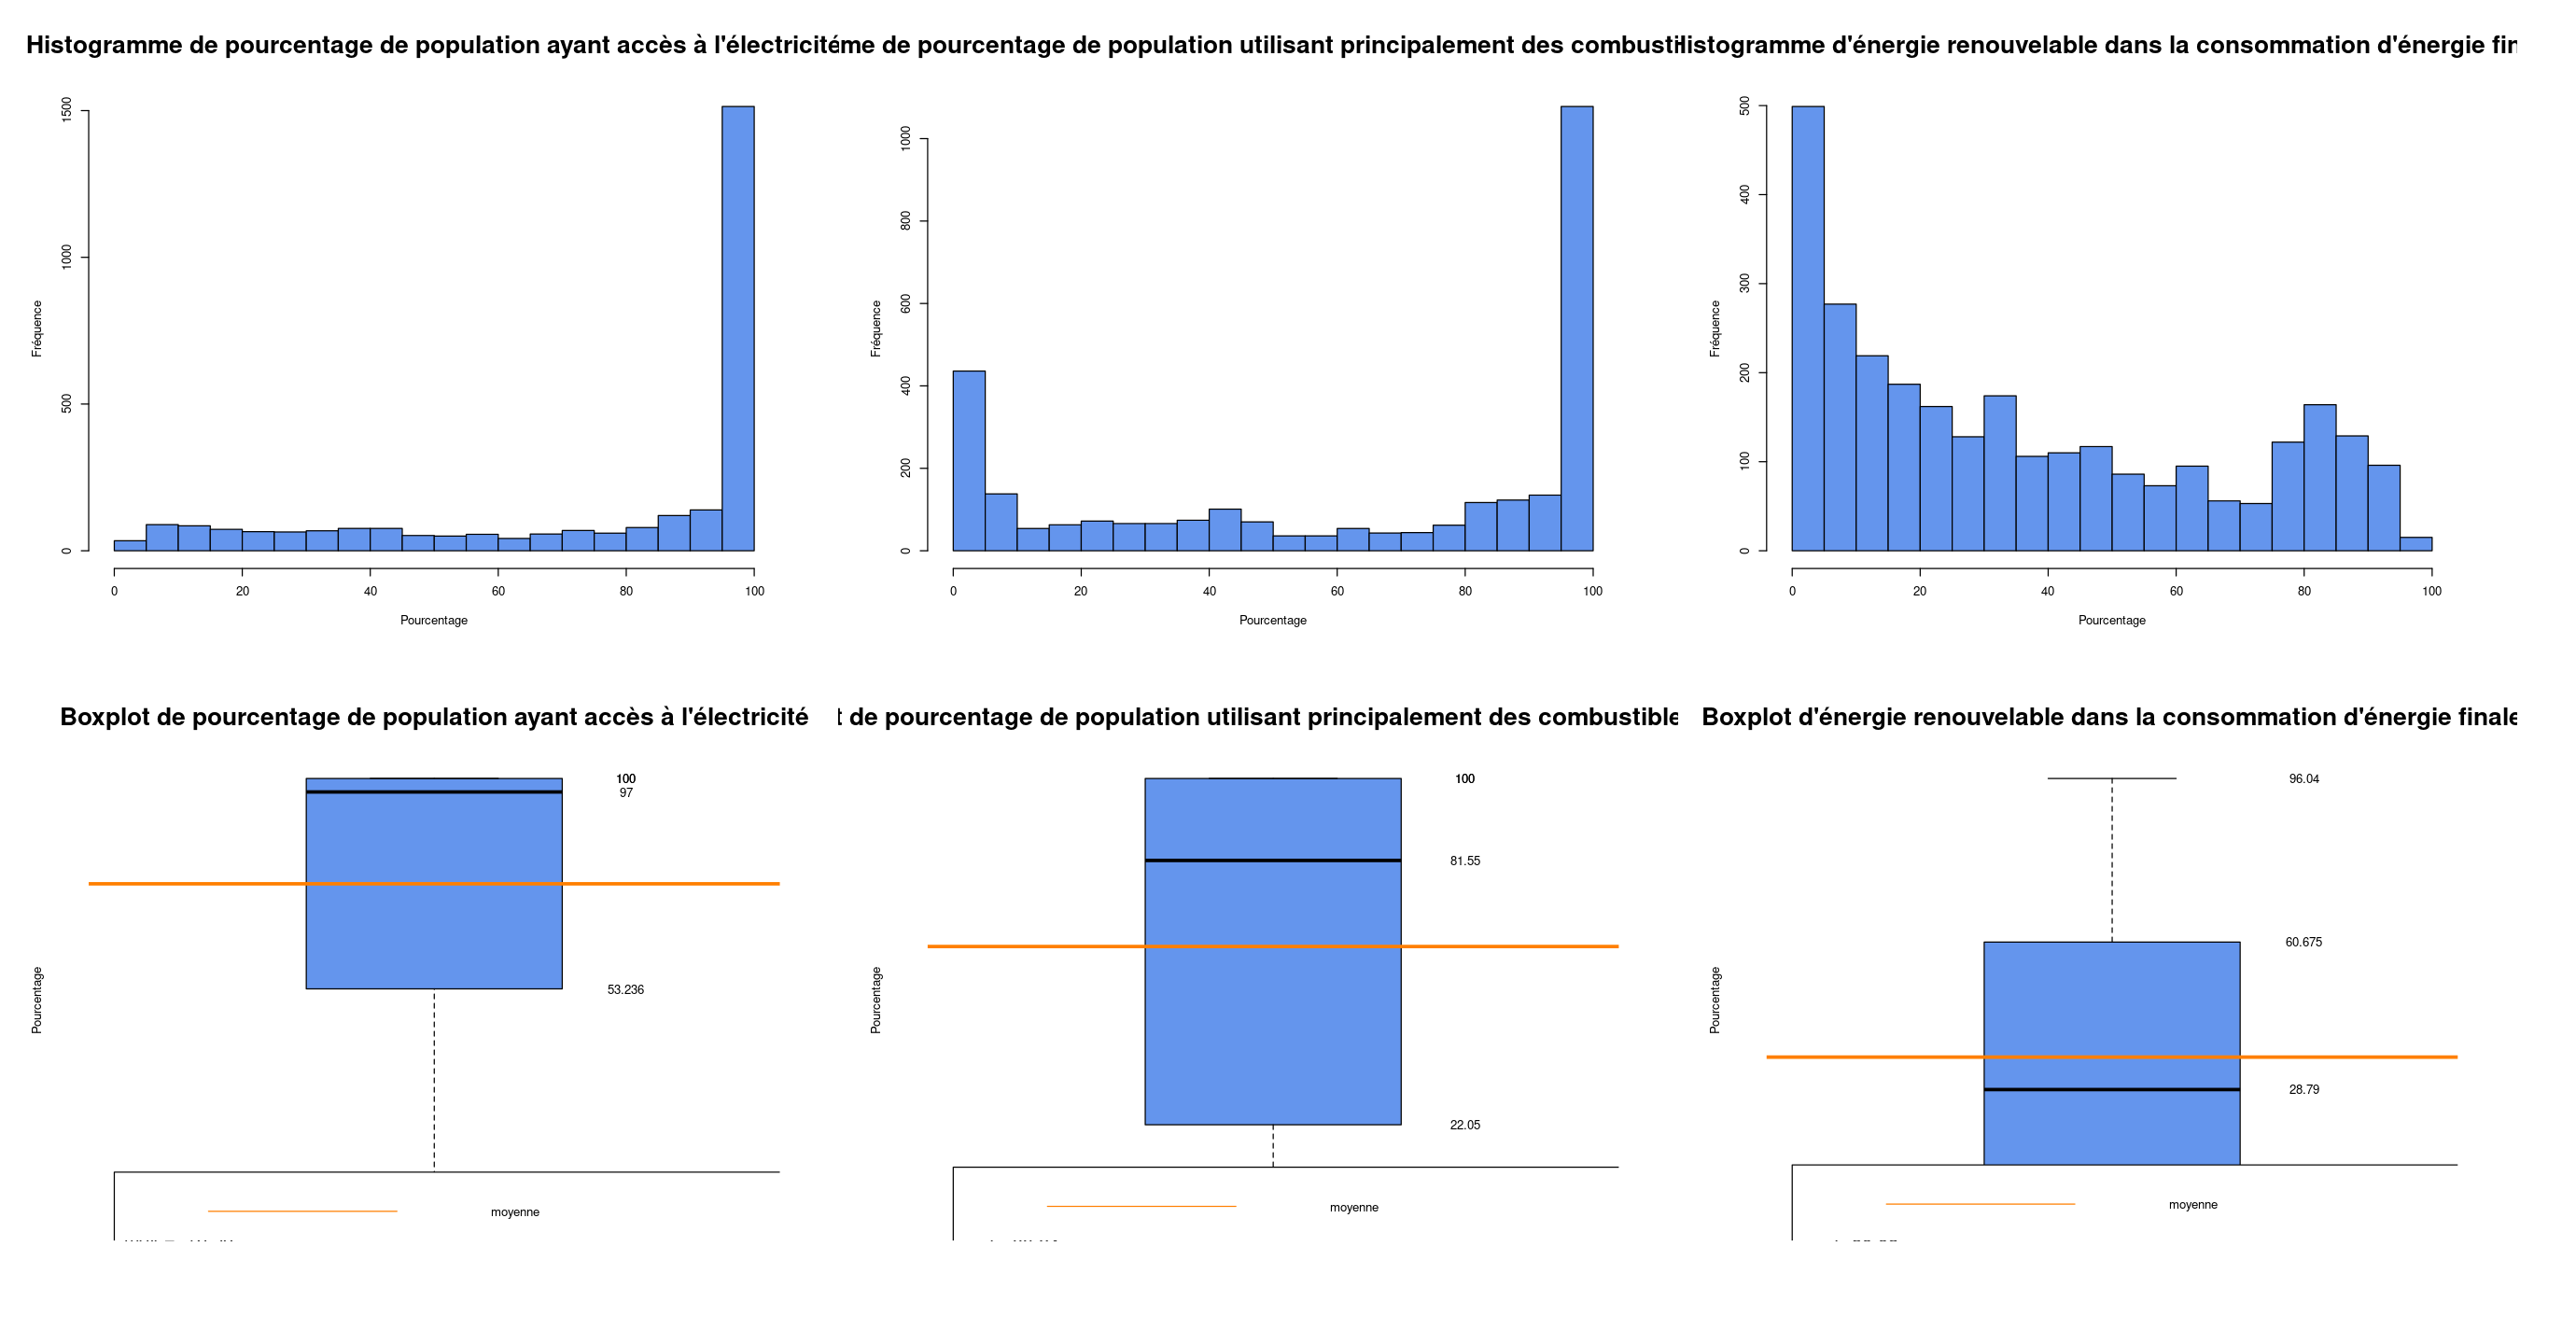

In [11]:
# Set up a 2x2 grid for subplots
#layout(matrix(c(1, 2, 3), nrow = 1))
layout(matrix(c(1, 2, 3,4, 5, 6 ), nrow=2, byrow=FALSE))
par(mar = c(5, 4, 4, 2) + 2, oma = c(0, 0, 0, 4))
#par(mfcol = c(1, 3))
options(repr.plot.width = 23, repr.plot.height = 12)

# Plot 1
hist(data$Access.to.electricity....of.population., main="Histogramme de pourcentage de population ayant accès à l'électricité",
     xlab = 'Pourcentage', ylab = 'Fréquence', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.electricity....of.population., main = "Boxplot de pourcentage de population ayant accès à l'électricité",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.electricity....of.population.), labels = round(fivenum(data$Access.to.electricity....of.population.),3), x = 1.3)
abline(h = mean(data$Access.to.electricity....of.population.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

# Plot 2
hist(data$Access.to.clean.fuels.for.cooking, main="Histogramme de pourcentage de population utilisant principalement des combustibles propres",
     xlab = 'Pourcentage', ylab = 'Fréquence', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.clean.fuels.for.cooking, main = "Boxplot de pourcentage de population utilisant principalement des combustibles propres",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.clean.fuels.for.cooking), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Access.to.clean.fuels.for.cooking), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

# Plot 3
hist(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main="Histogramme d'énergie renouvelable dans la consommation d'énergie finale",
     xlab = 'Pourcentage', ylab = 'Fréquence', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main = "Boxplot d'énergie renouvelable dans la consommation d'énergie finale",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....), labels = round(fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....),3), x = 1.3)
abline(h = mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)


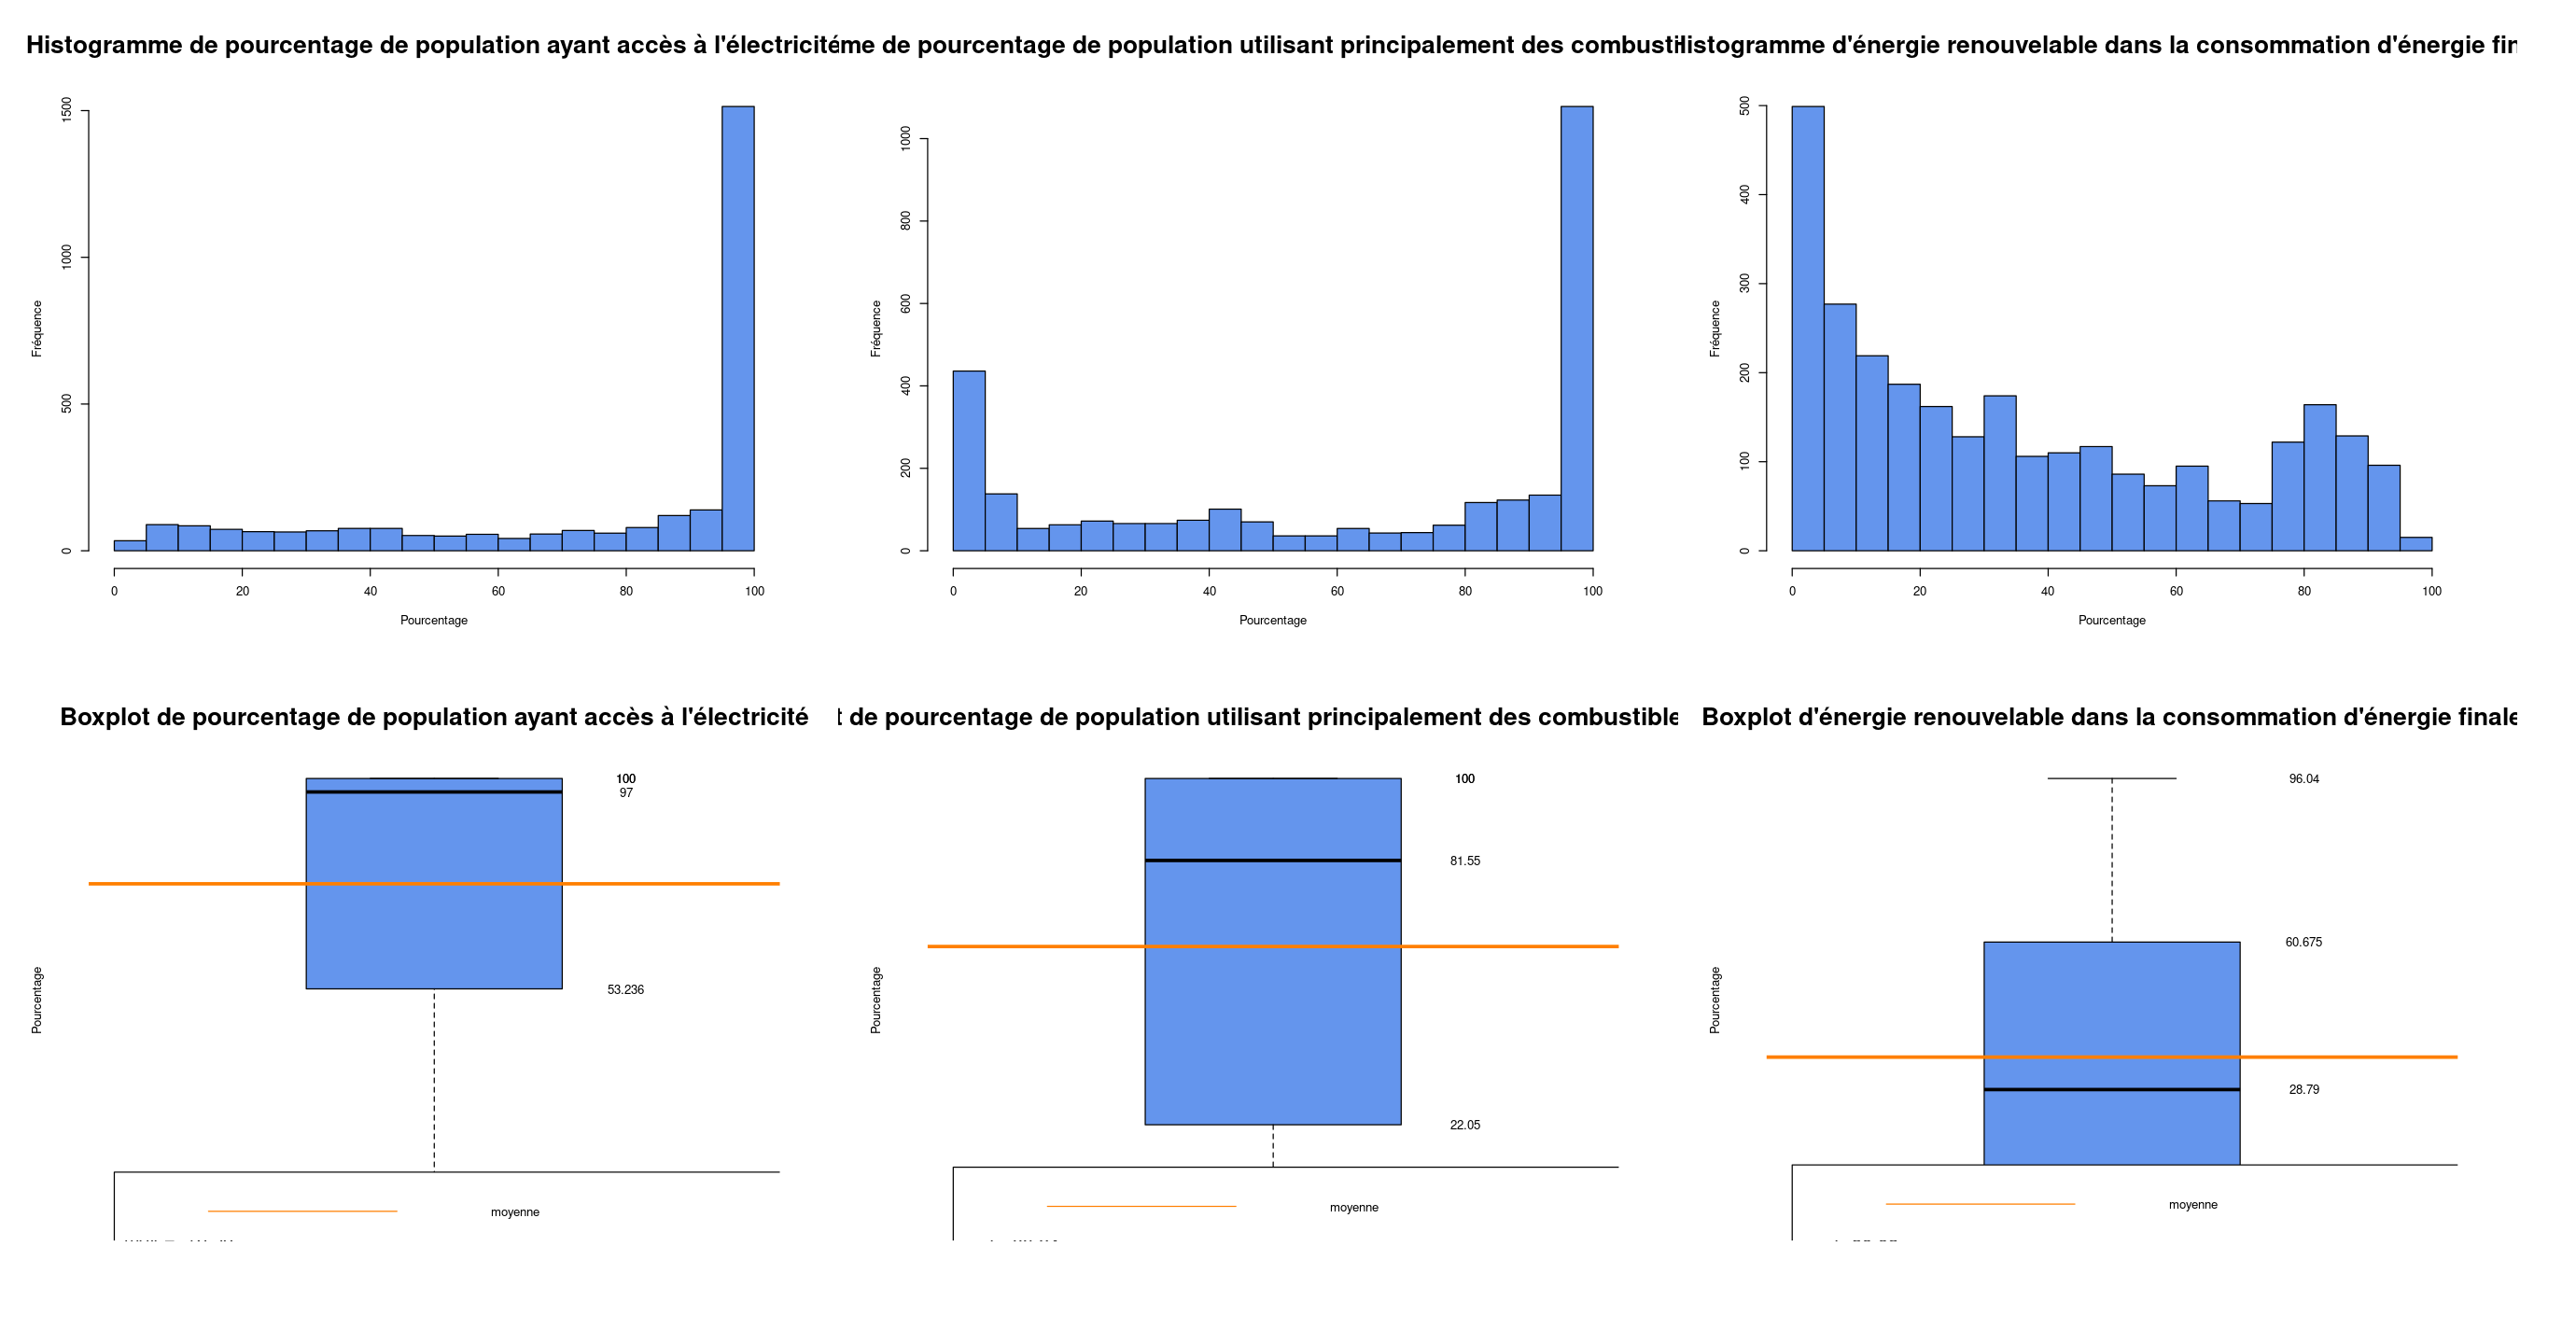

In [12]:
# Set up a 2x2 grid for subplots
#layout(matrix(c(1, 2, 3), nrow = 1))
layout(matrix(c(1, 2, 3,4, 5, 6 ), nrow=2, byrow=FALSE))
par(mar = c(5, 4, 4, 2) + 2, oma = c(0, 0, 0, 4))
#par(mfcol = c(1, 3))
options(repr.plot.width = 23, repr.plot.height = 12)

# Plot 1
hist(data$Access.to.electricity....of.population., main="Histogramme de pourcentage de population ayant accès à l'électricité",
     xlab = 'Pourcentage', ylab = 'Fréquence', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.electricity....of.population., main = "Boxplot de pourcentage de population ayant accès à l'électricité",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.electricity....of.population.), labels = round(fivenum(data$Access.to.electricity....of.population.),3), x = 1.3)
abline(h = mean(data$Access.to.electricity....of.population.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

# Plot 2
hist(data$Access.to.clean.fuels.for.cooking, main="Histogramme de pourcentage de population utilisant principalement des combustibles propres",
     xlab = 'Pourcentage', ylab = 'Fréquence', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.clean.fuels.for.cooking, main = "Boxplot de pourcentage de population utilisant principalement des combustibles propres",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.clean.fuels.for.cooking), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Access.to.clean.fuels.for.cooking), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

# Plot 3
hist(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main="Histogramme d'énergie renouvelable dans la consommation d'énergie finale",
     xlab = 'Pourcentage', ylab = 'Fréquence', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main = "Boxplot d'énergie renouvelable dans la consommation d'énergie finale",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....), labels = round(fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....),3), x = 1.3)
abline(h = mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)


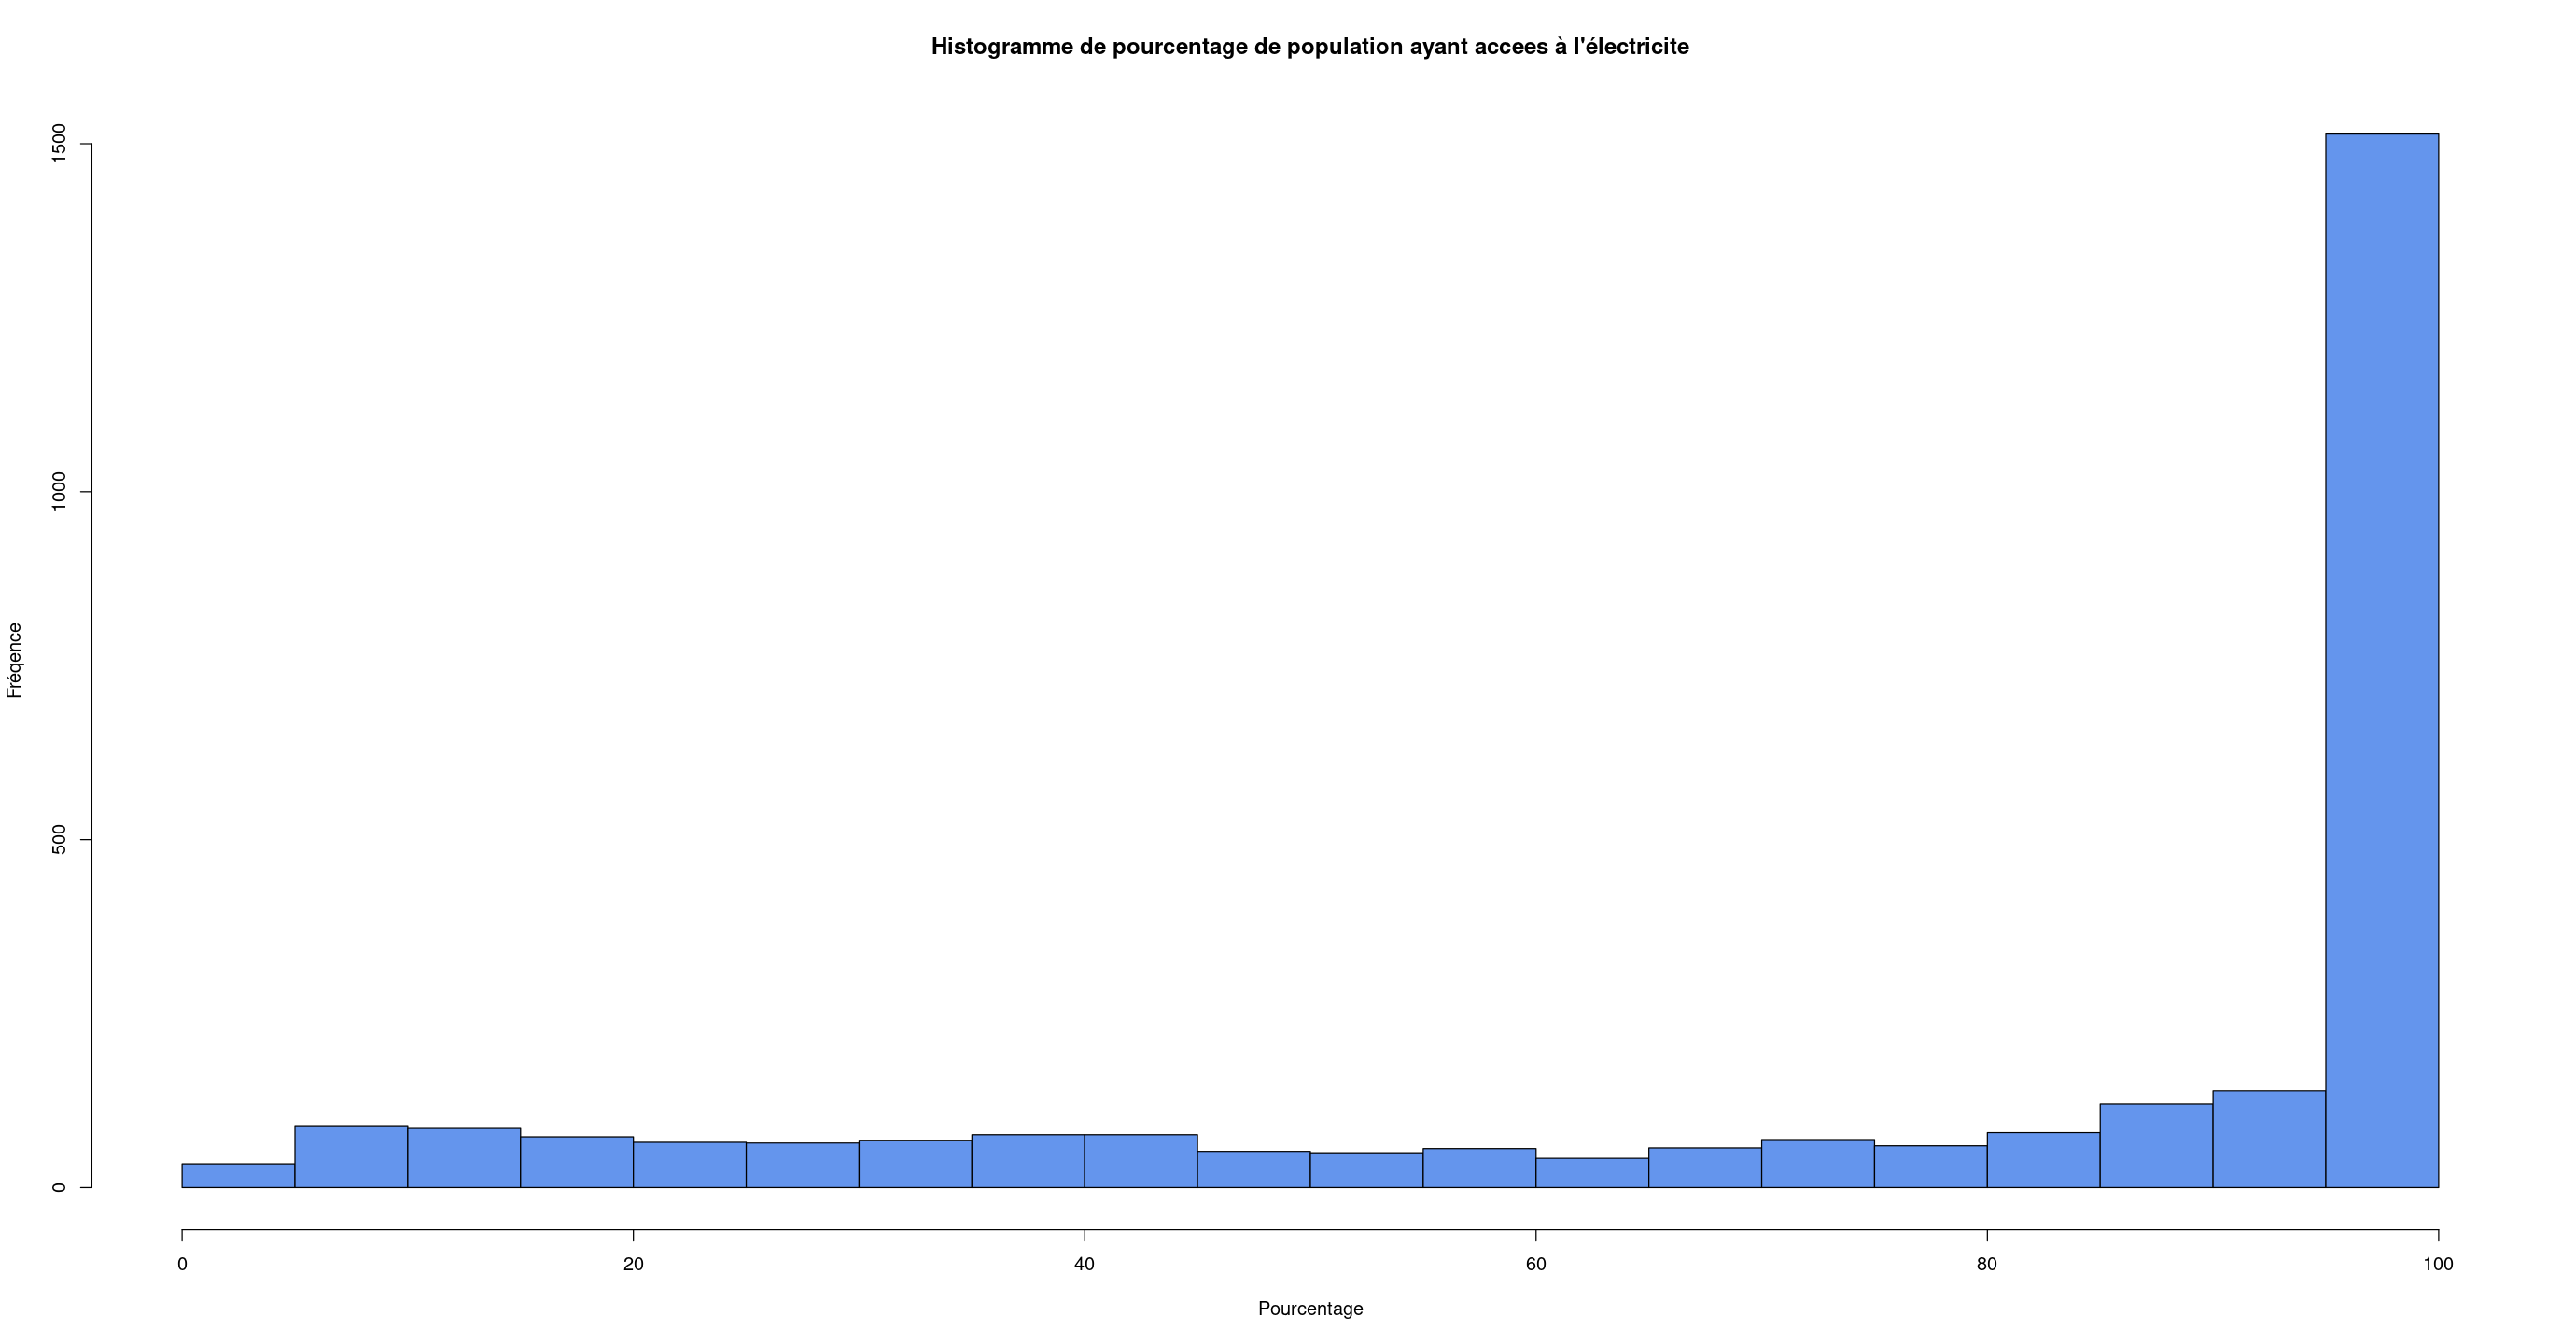

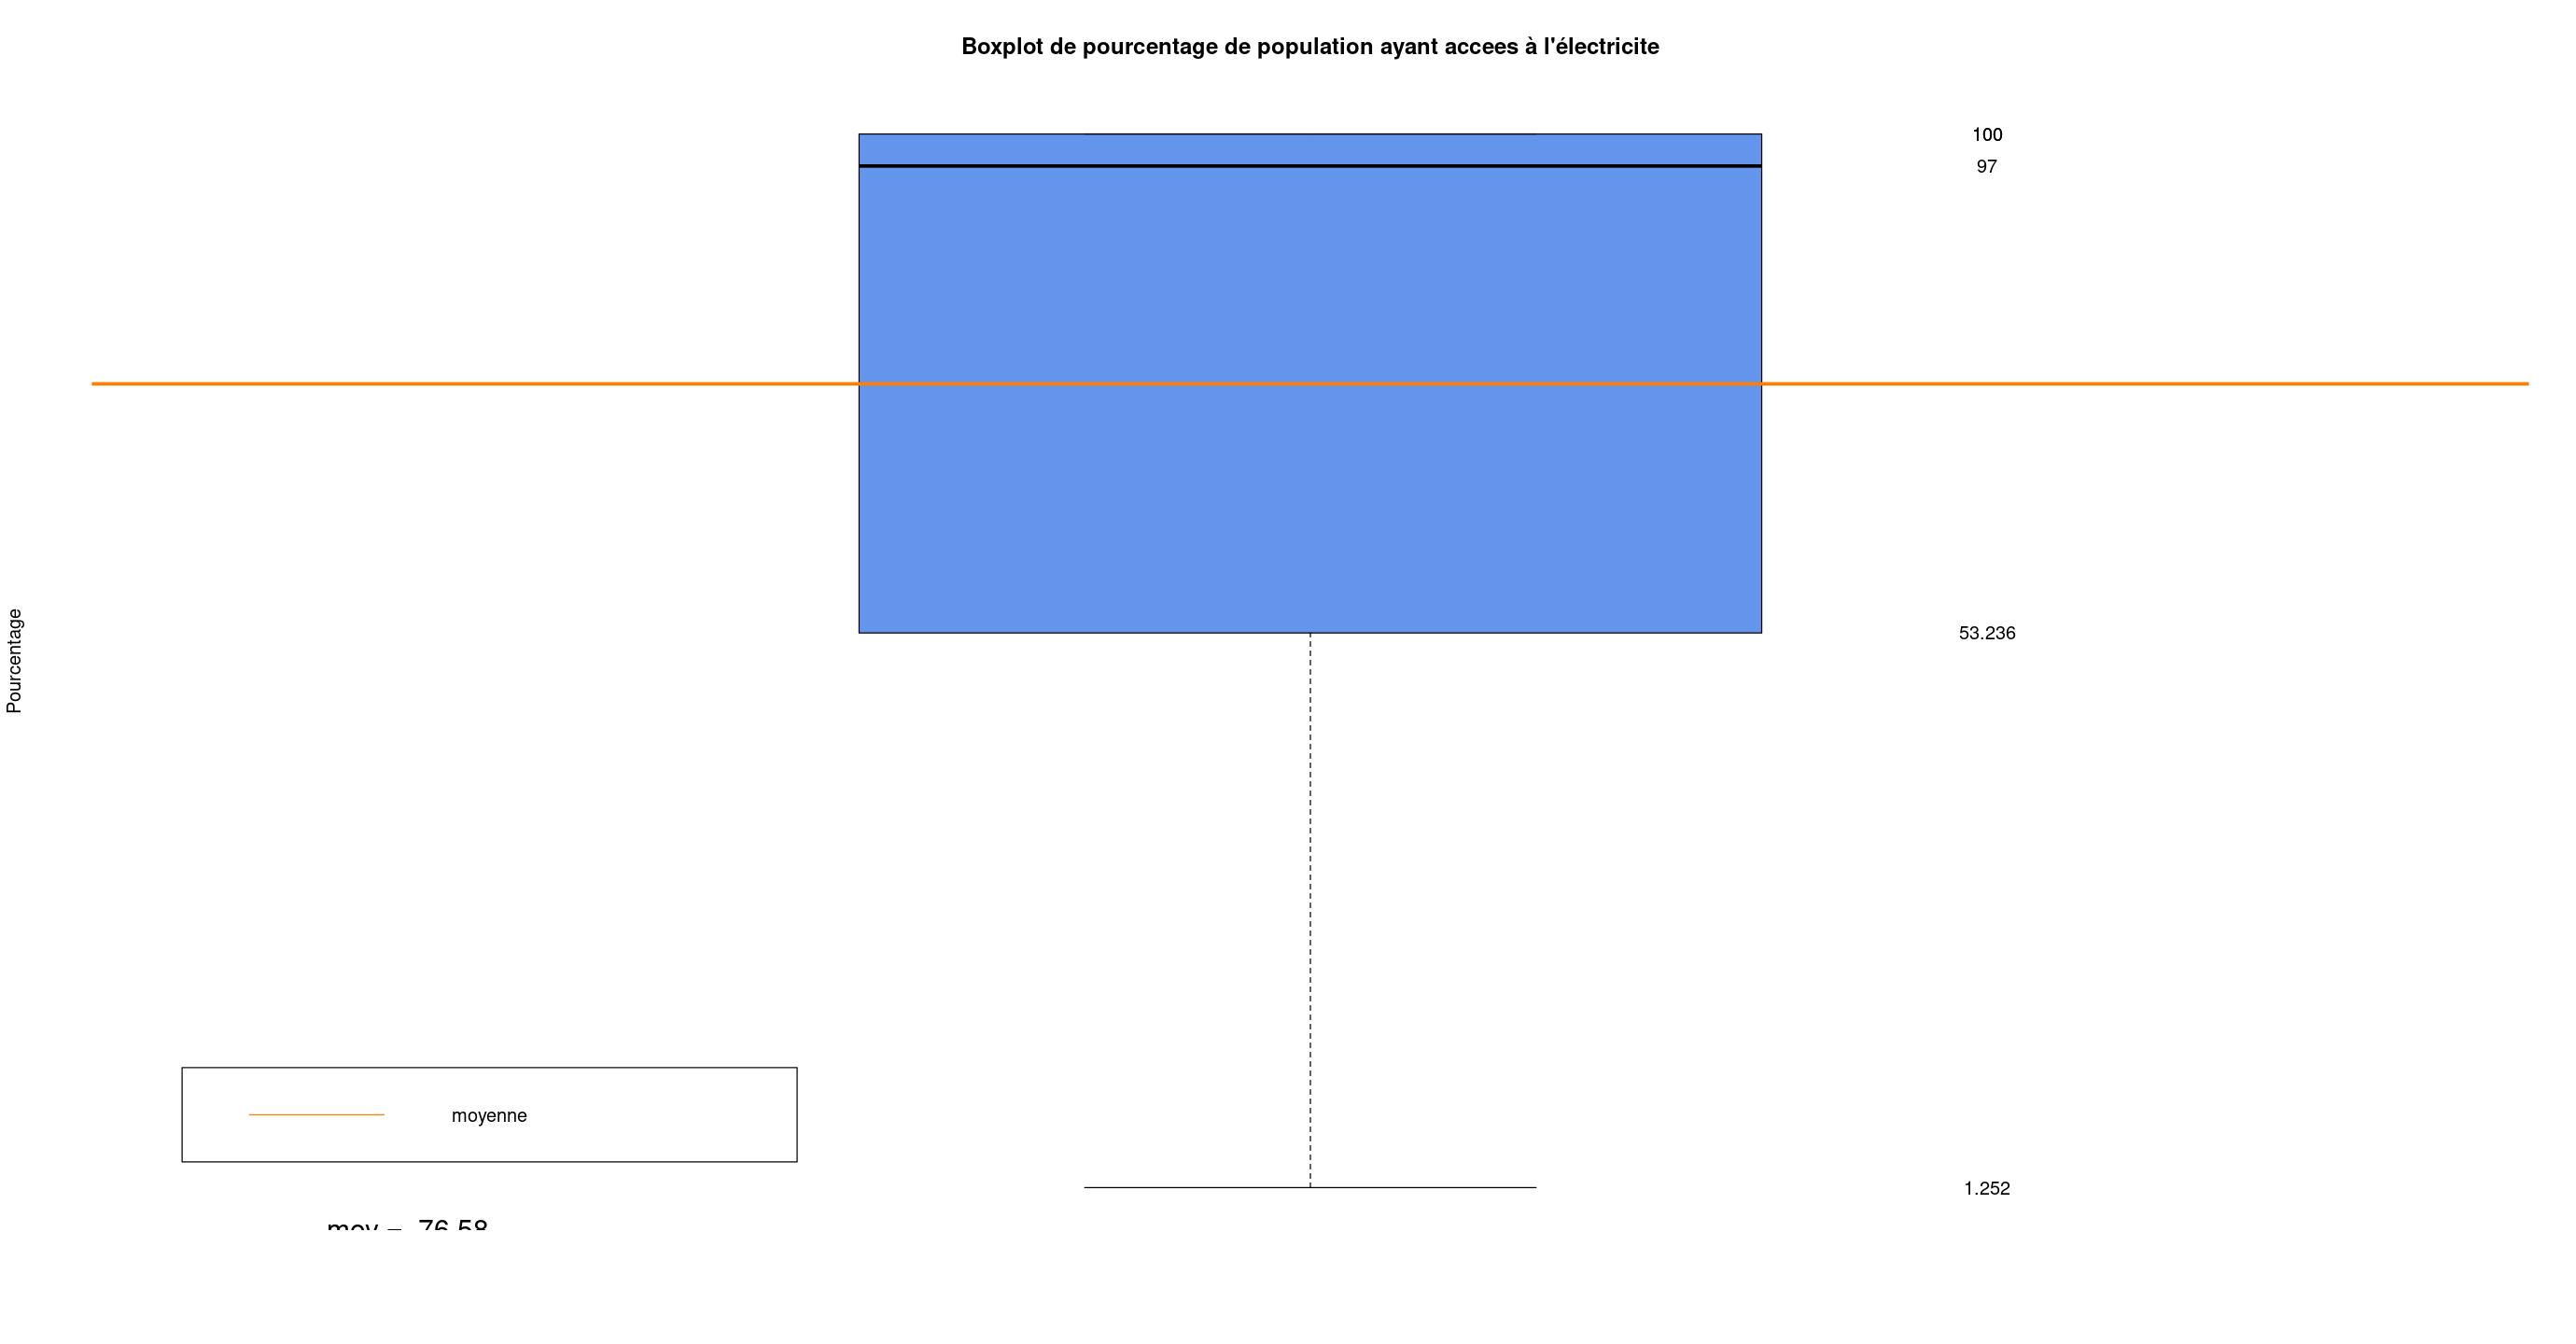

In [13]:
# Variables quantitatives
hist(data$Access.to.electricity....of.population., main="Histogramme de pourcentage de population ayant accees à l'électricite",
           xlab = 'Pourcentage', ylab = 'Fréqence', col= 'cornflowerblue', breaks = 25)
boxplot(data$Access.to.electricity....of.population., main = "Boxplot de pourcentage de population ayant accees à l'électricite",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue')
text(y = fivenum(data$Access.to.electricity....of.population.), labels = round(fivenum(data$Access.to.electricity....of.population.),3), x = 1.3)
abline(h = mean(data$Access.to.electricity....of.population.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

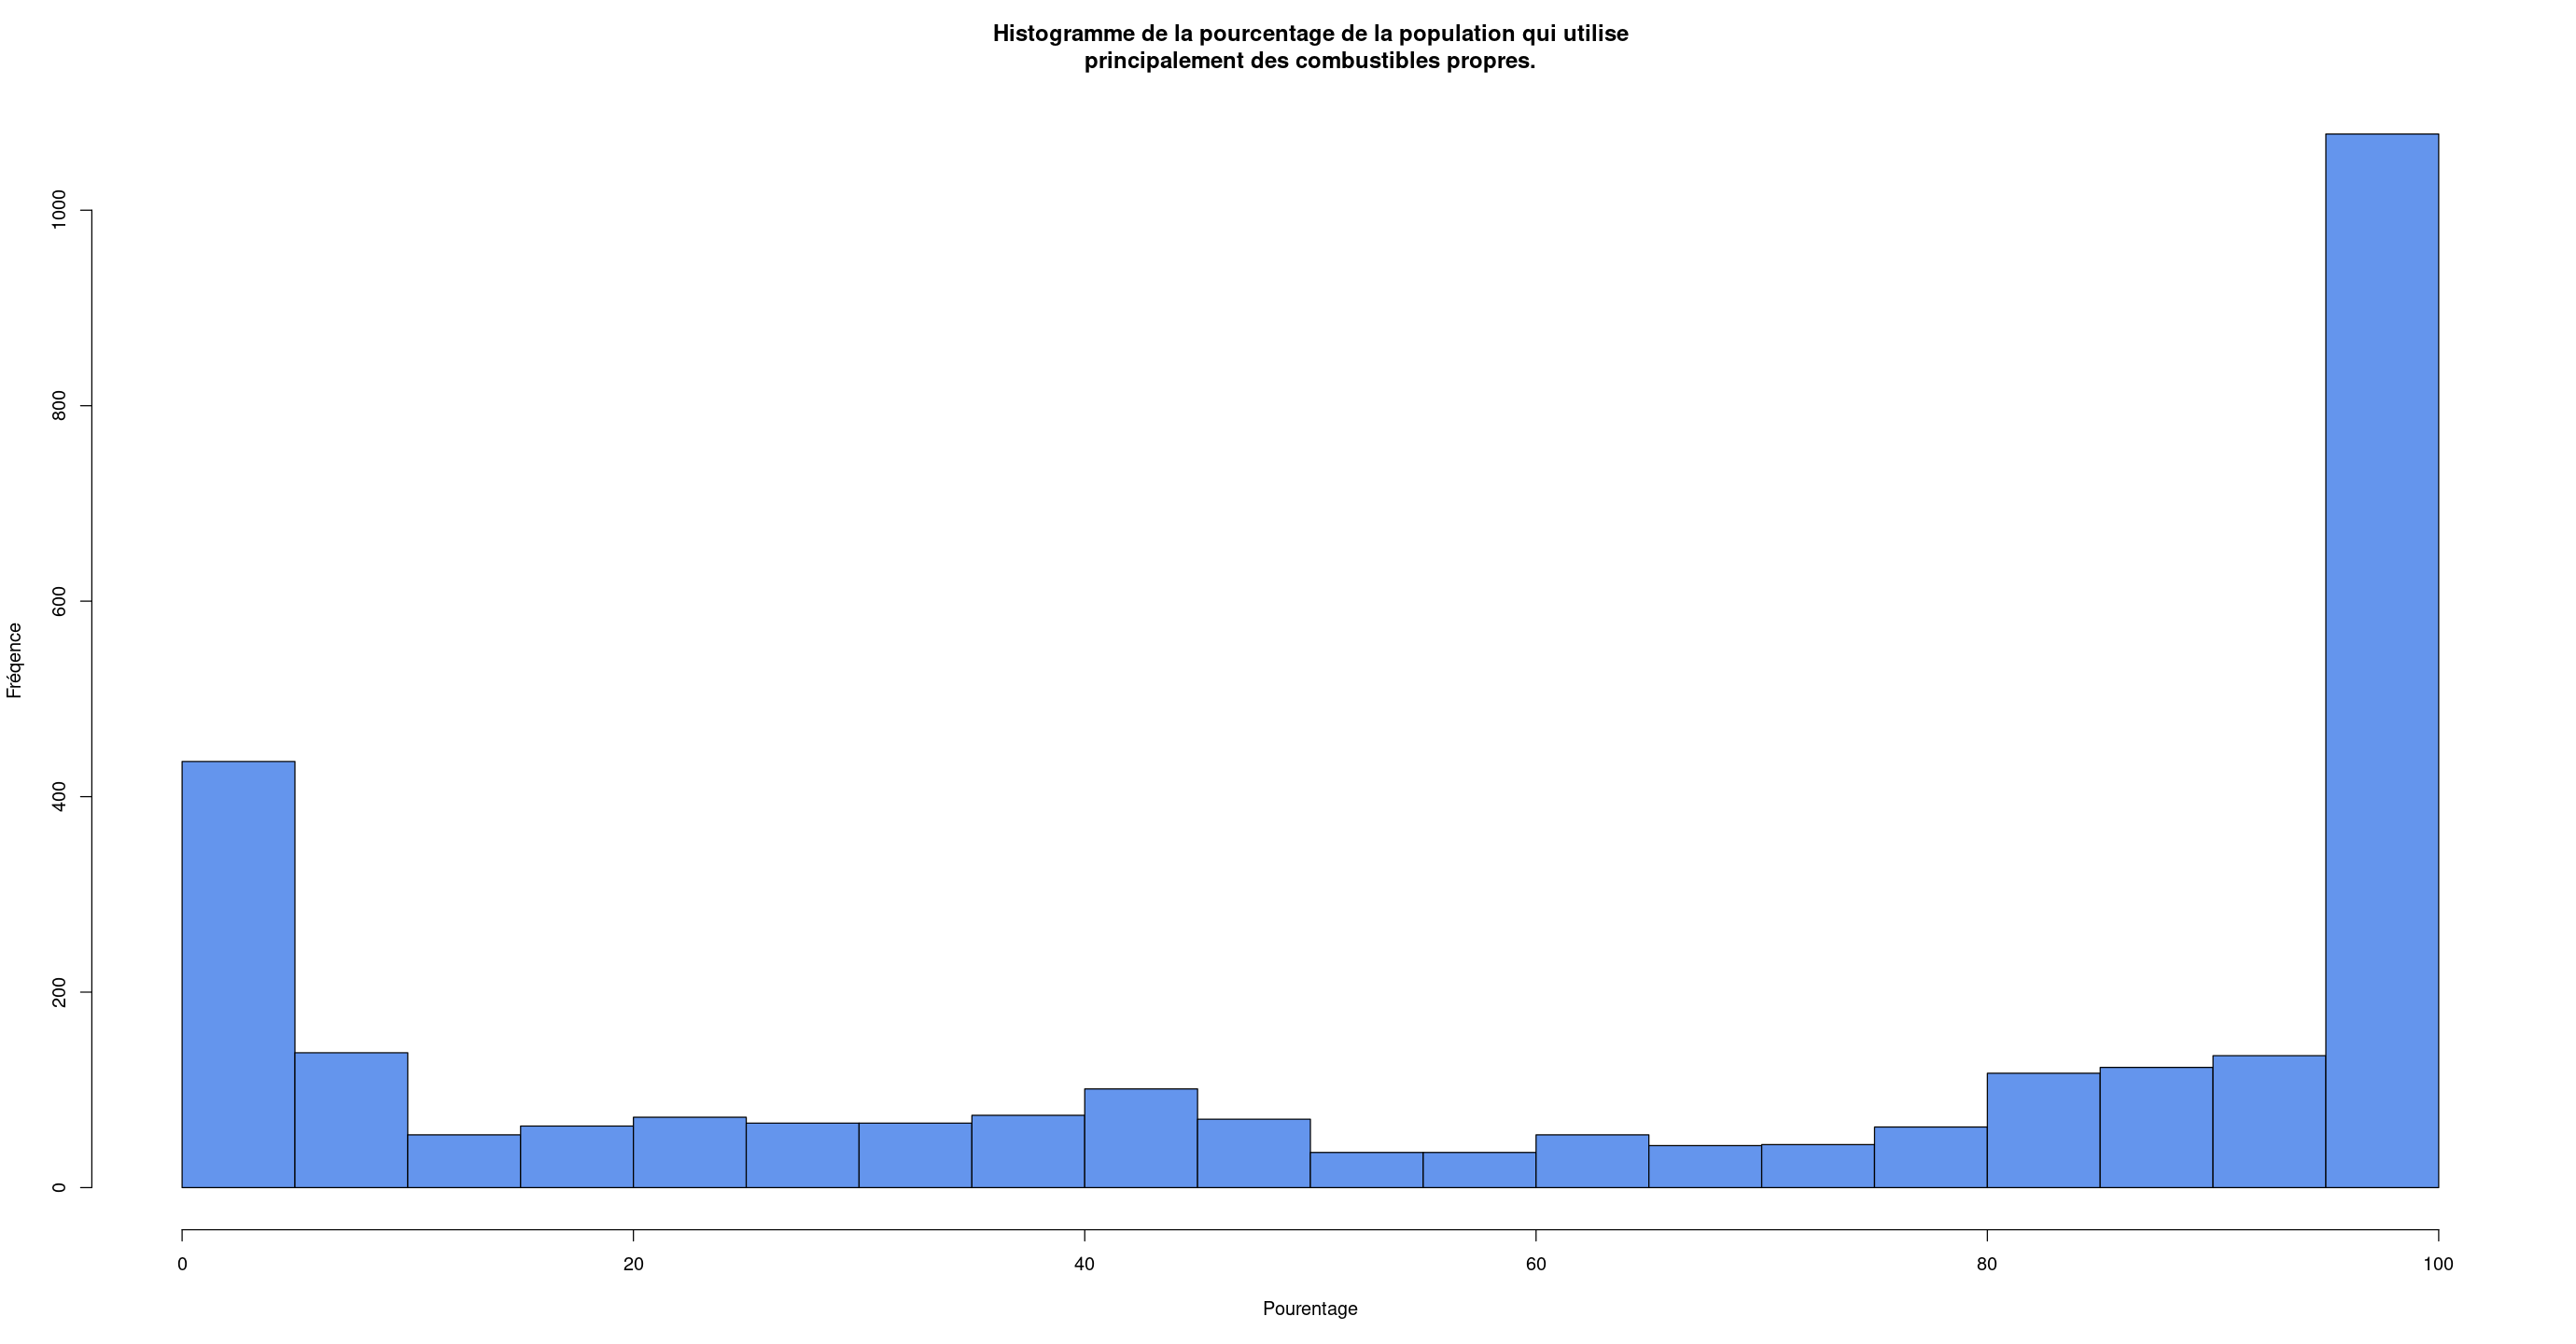

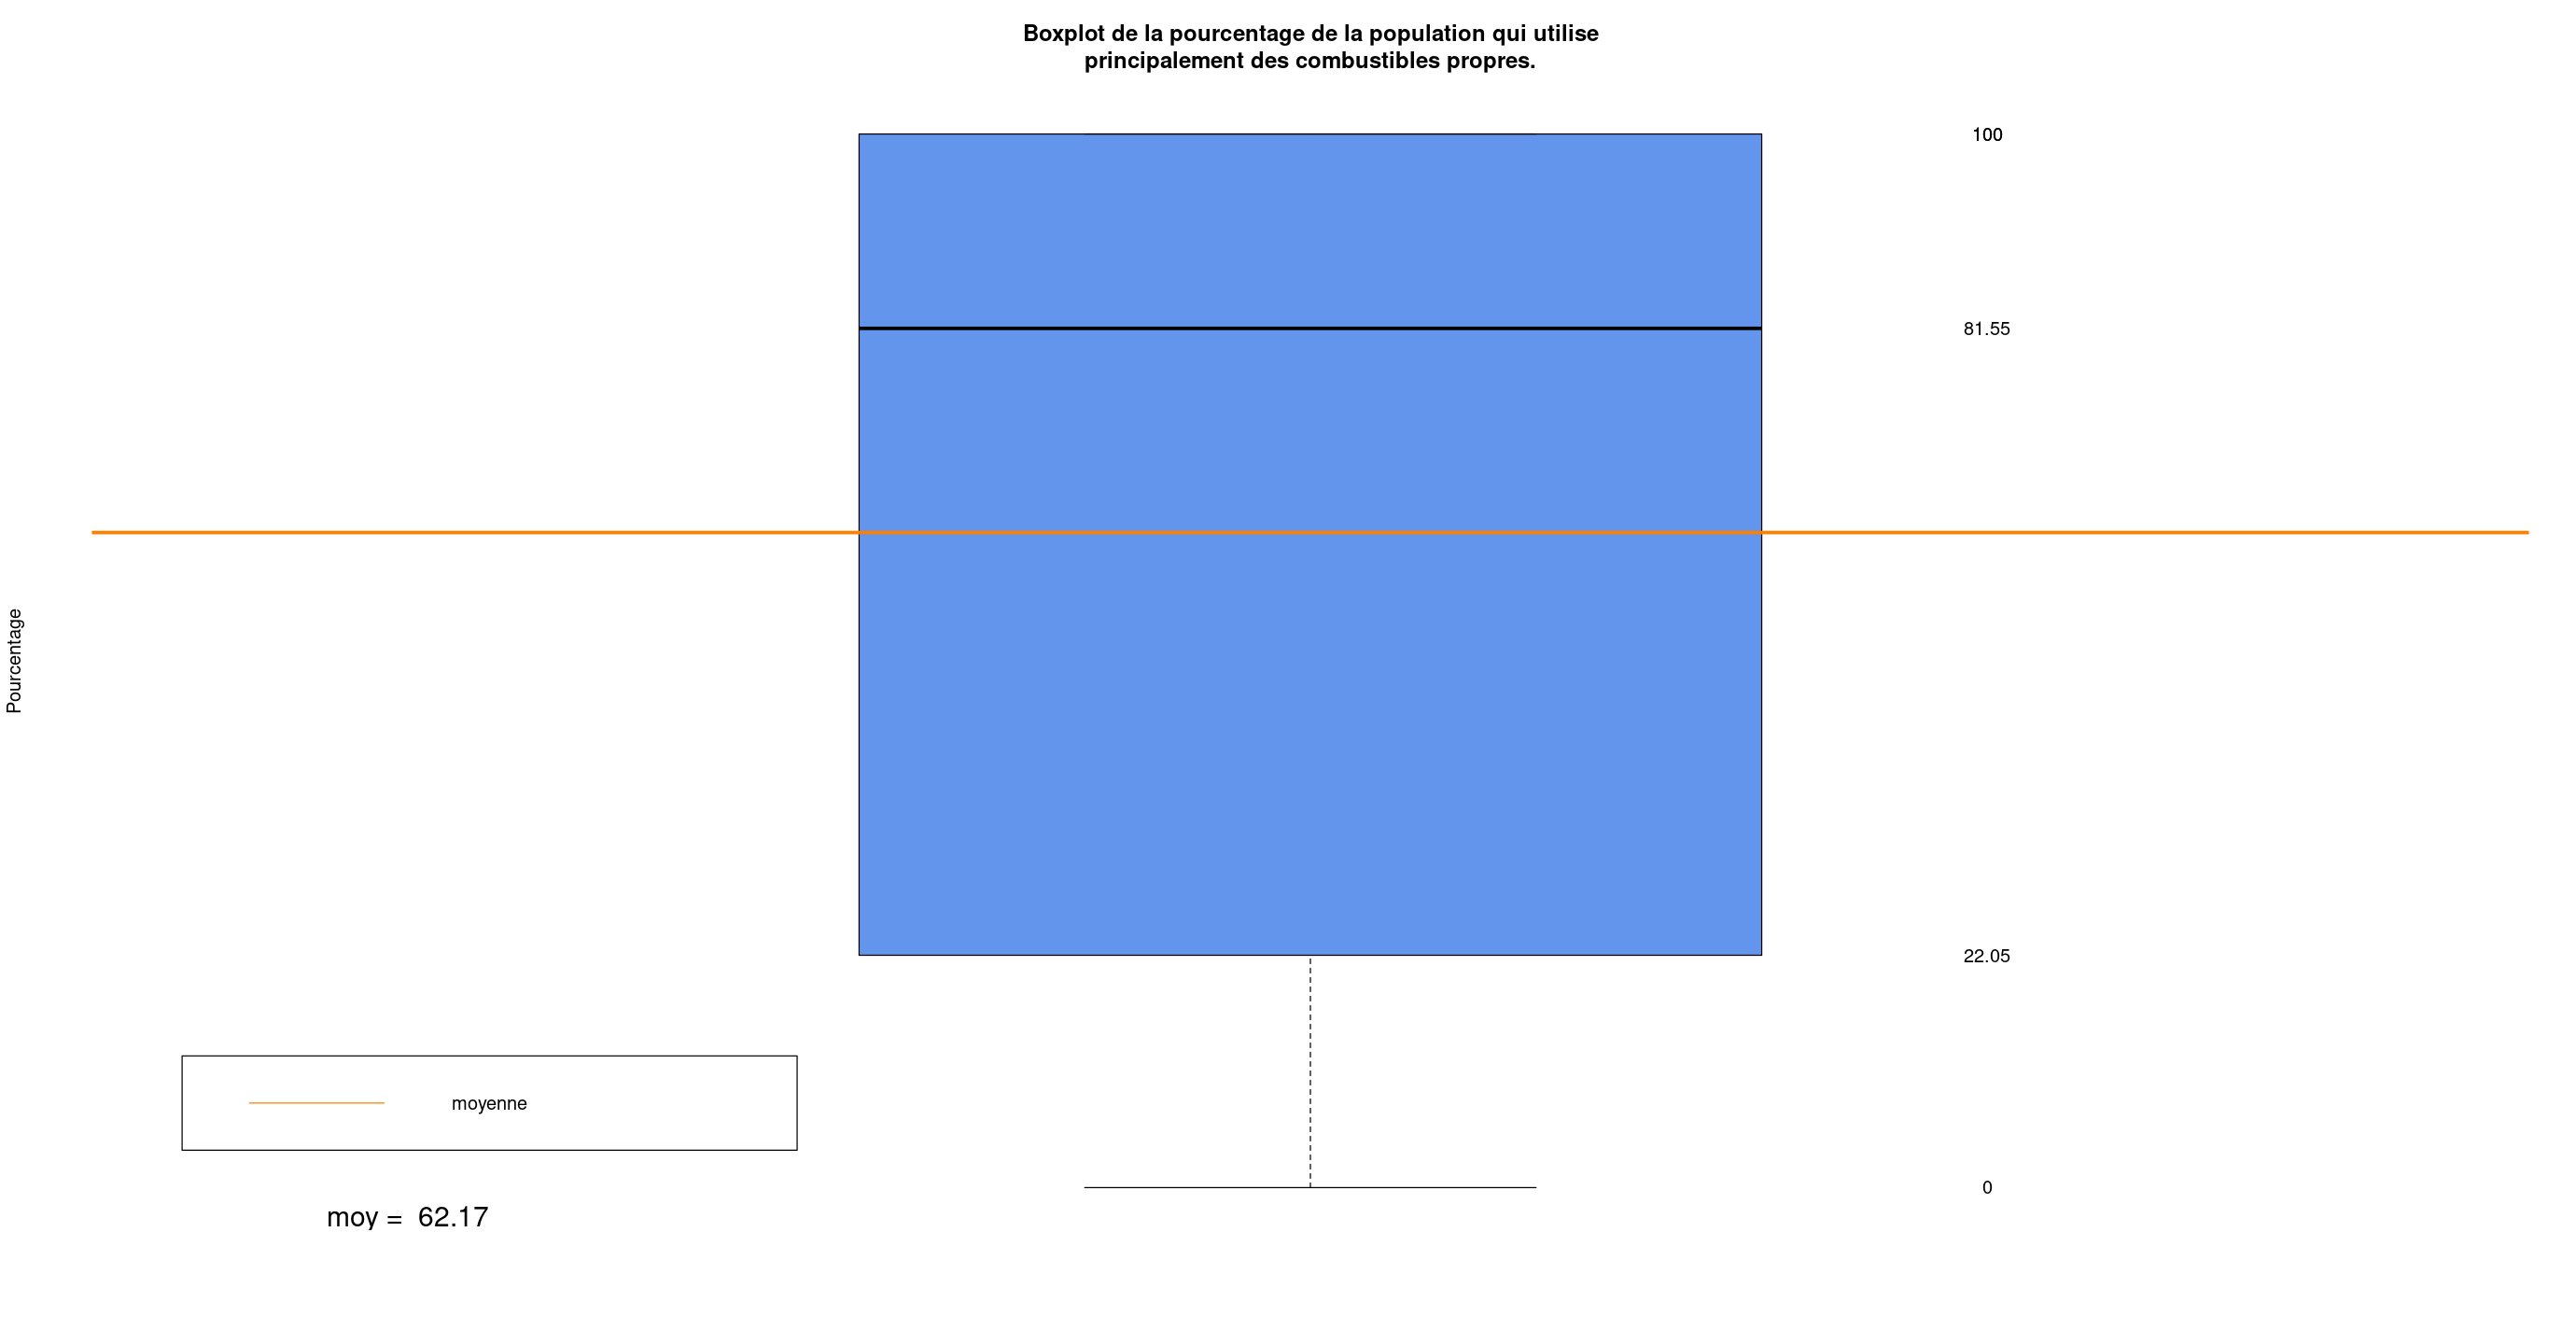

In [14]:
hist(data$Access.to.clean.fuels.for.cooking, main="Histogramme de la pourcentage de la population qui utilise
principalement des combustibles propres.",
           xlab = 'Pourentage', ylab = 'Fréqence', col= 'cornflowerblue', breaks = 25)
boxplot(data$Access.to.clean.fuels.for.cooking, main = "Boxplot de la pourcentage de la population qui utilise
principalement des combustibles propres.",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue')
text(y = fivenum(data$Access.to.clean.fuels.for.cooking), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Access.to.clean.fuels.for.cooking), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

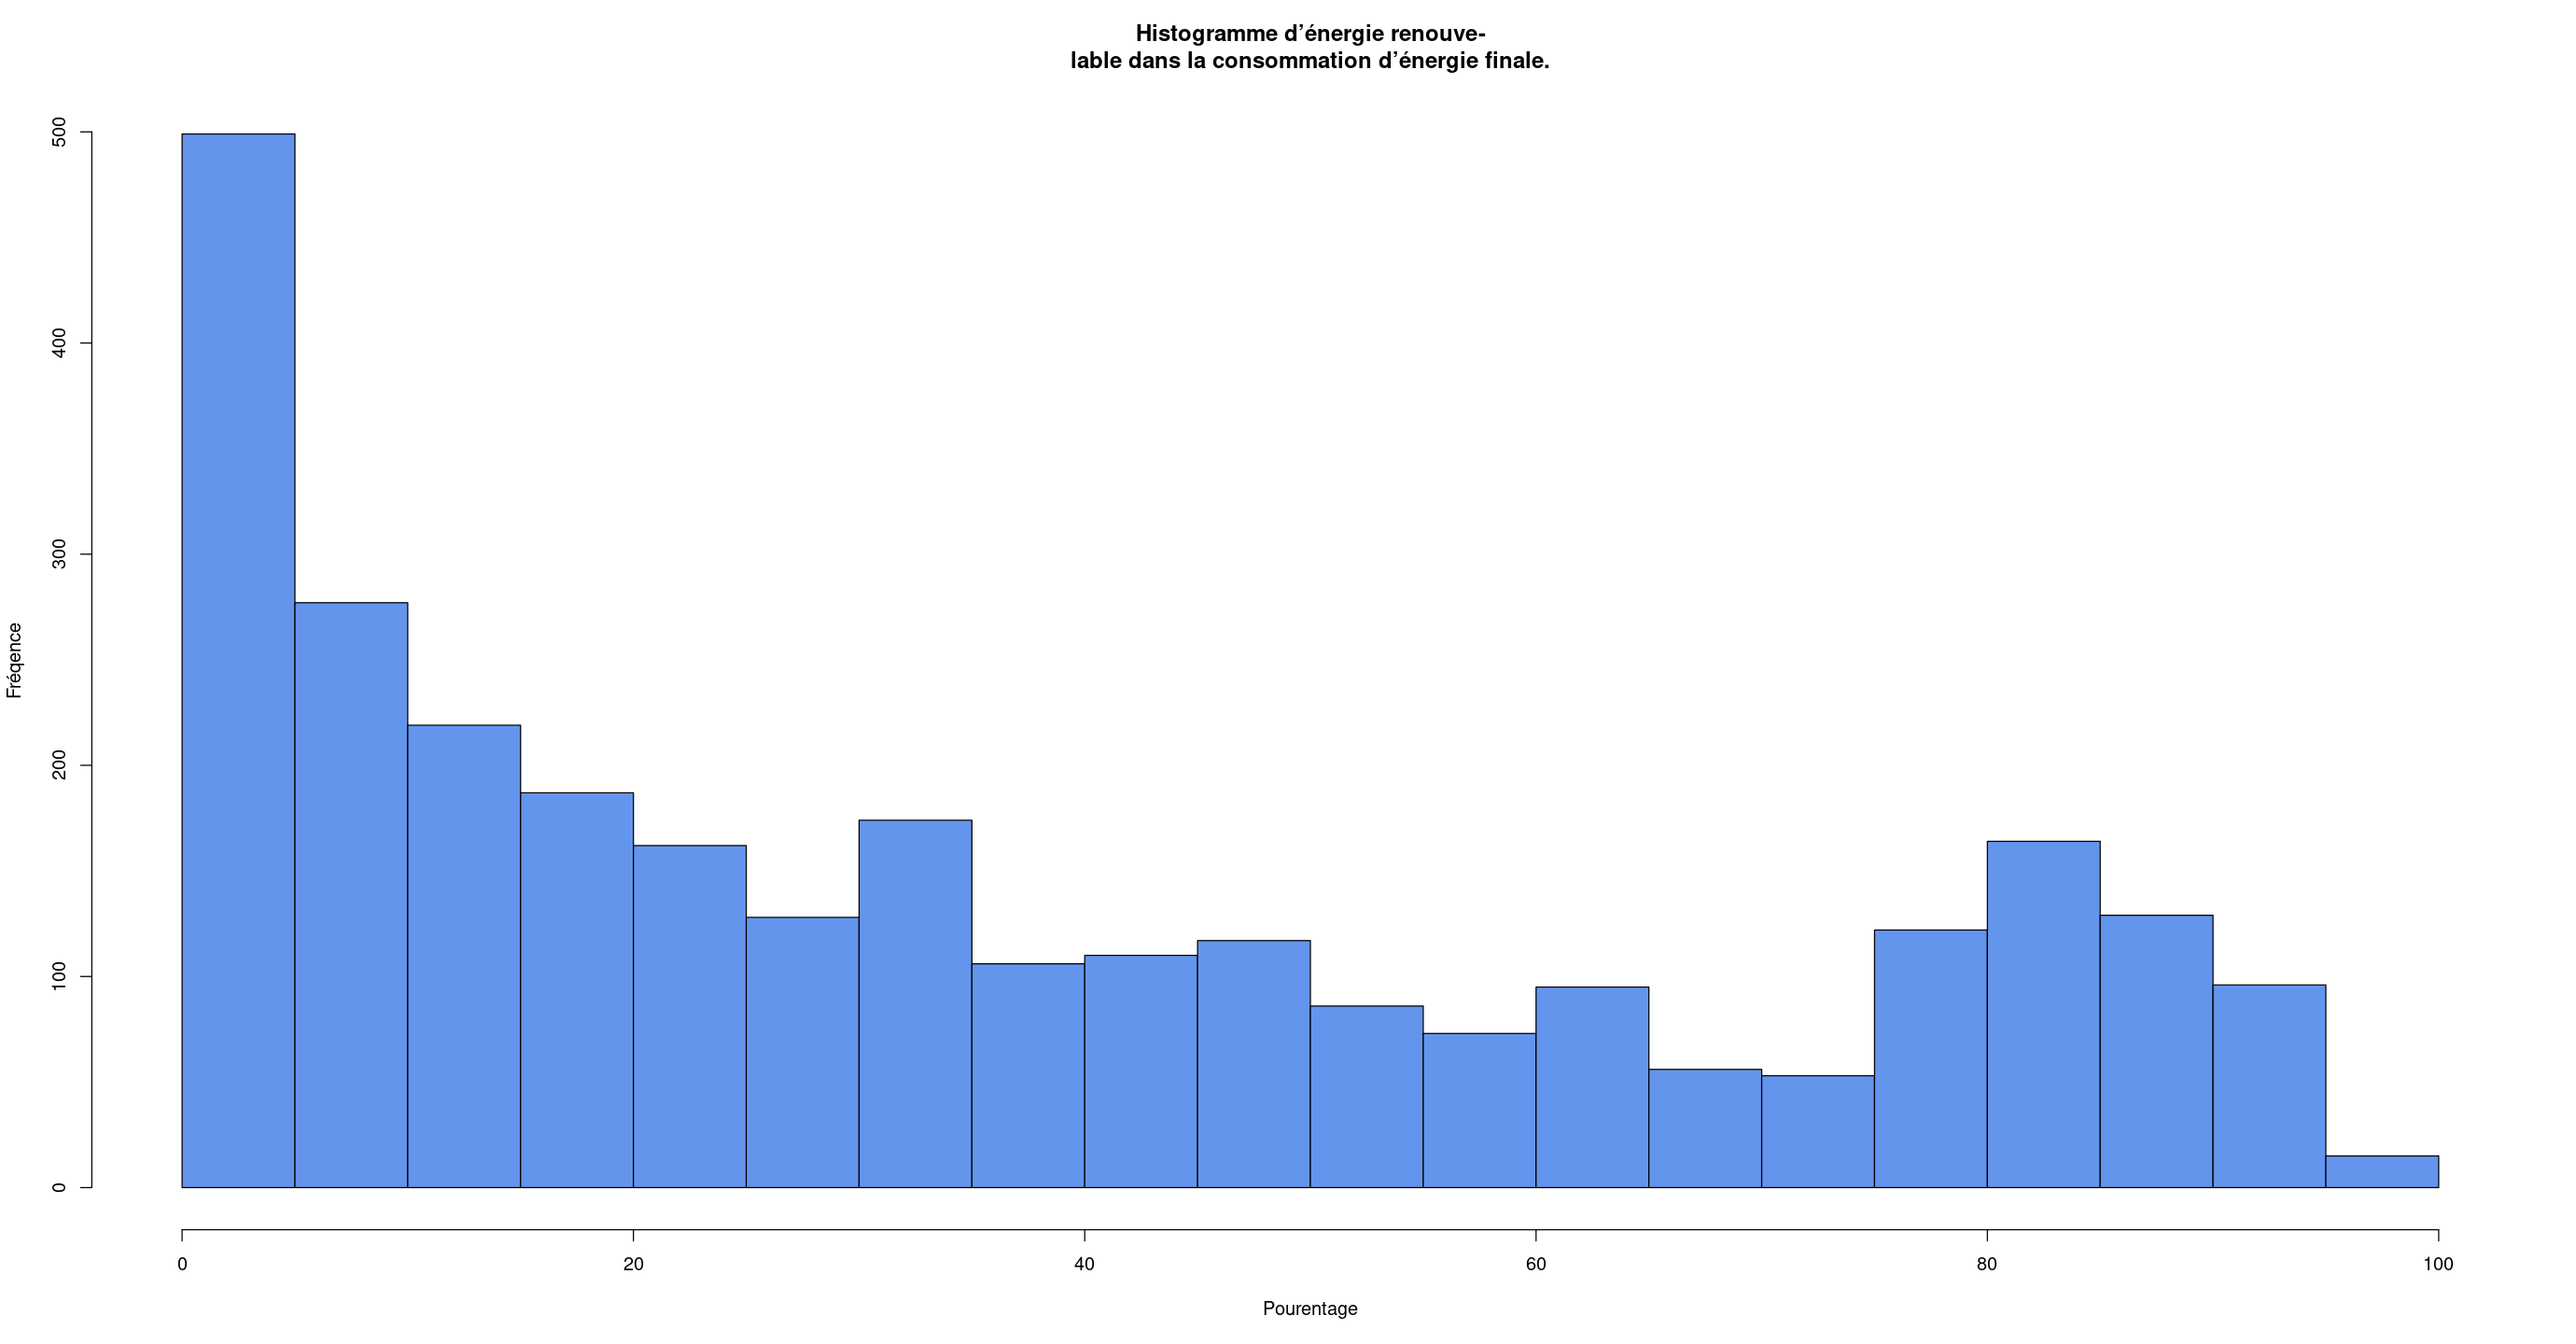

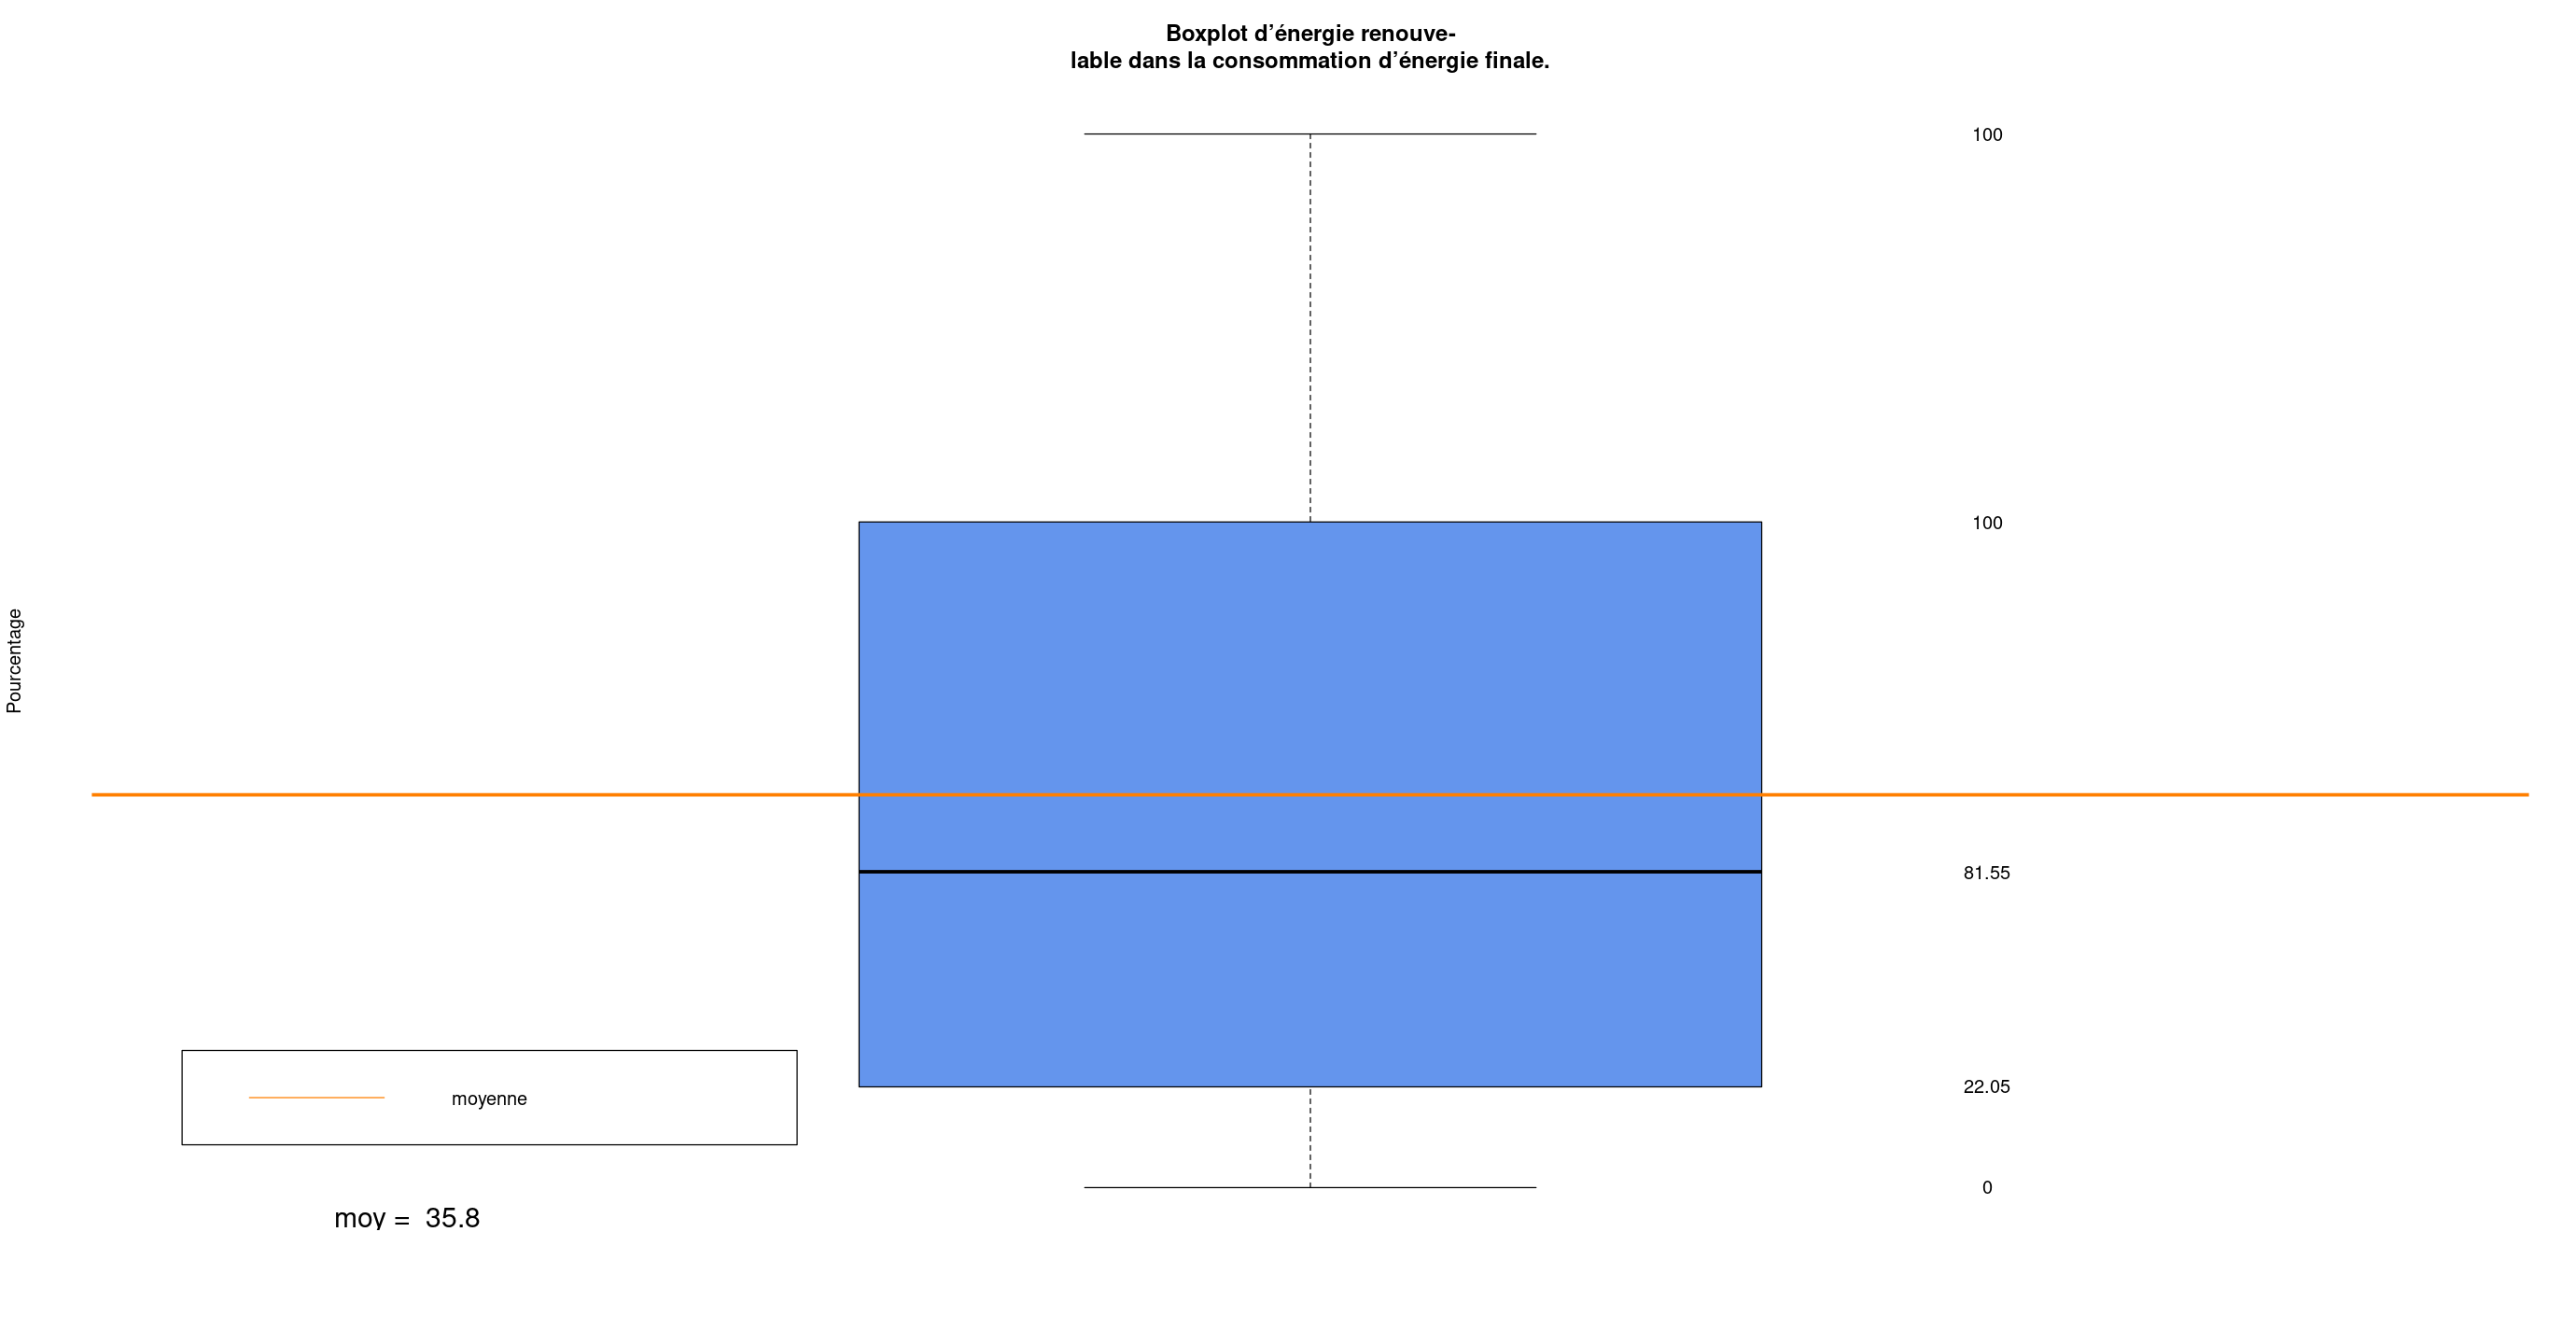

In [15]:
hist(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main="Histogramme d’énergie renouve-
lable dans la consommation d’énergie finale.",
           xlab = 'Pourentage', ylab = 'Fréqence', col= 'cornflowerblue', breaks = 25)
boxplot(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main = "Boxplot d’énergie renouve-
lable dans la consommation d’énergie finale.",
        ylab = 'Pourcentage', axes=FALSE, col= 'cornflowerblue')
text(y = fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

Ici, il faut transformer des variables quantitatives, comment??

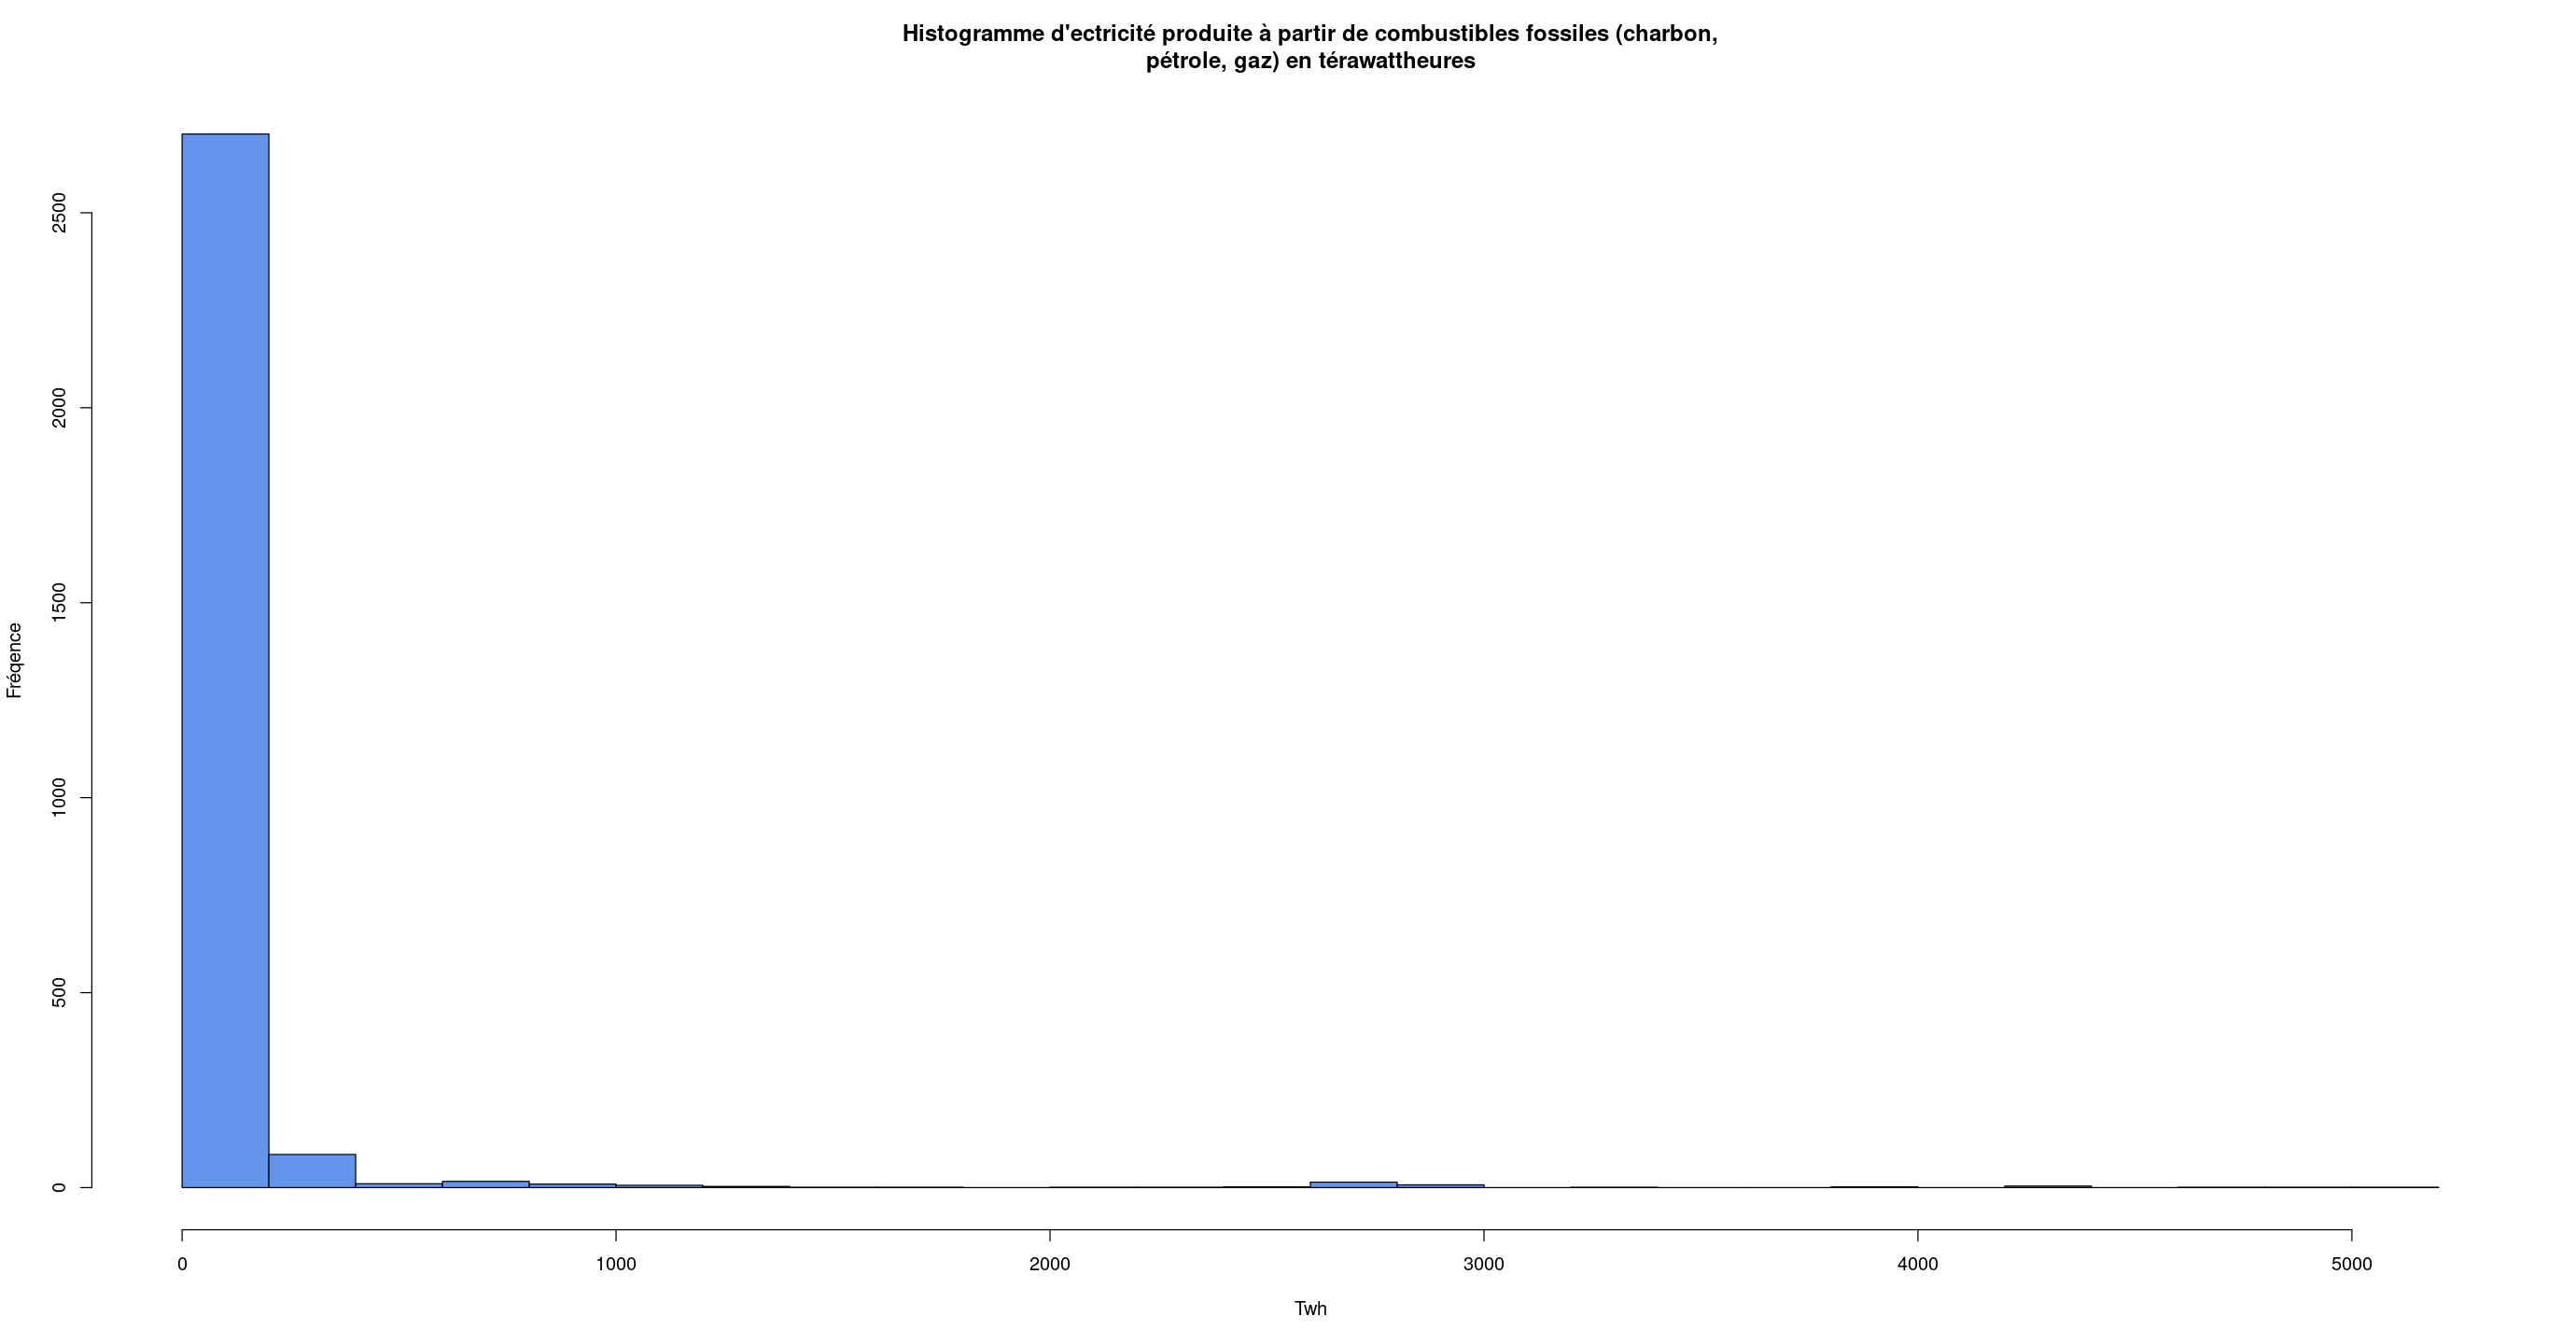

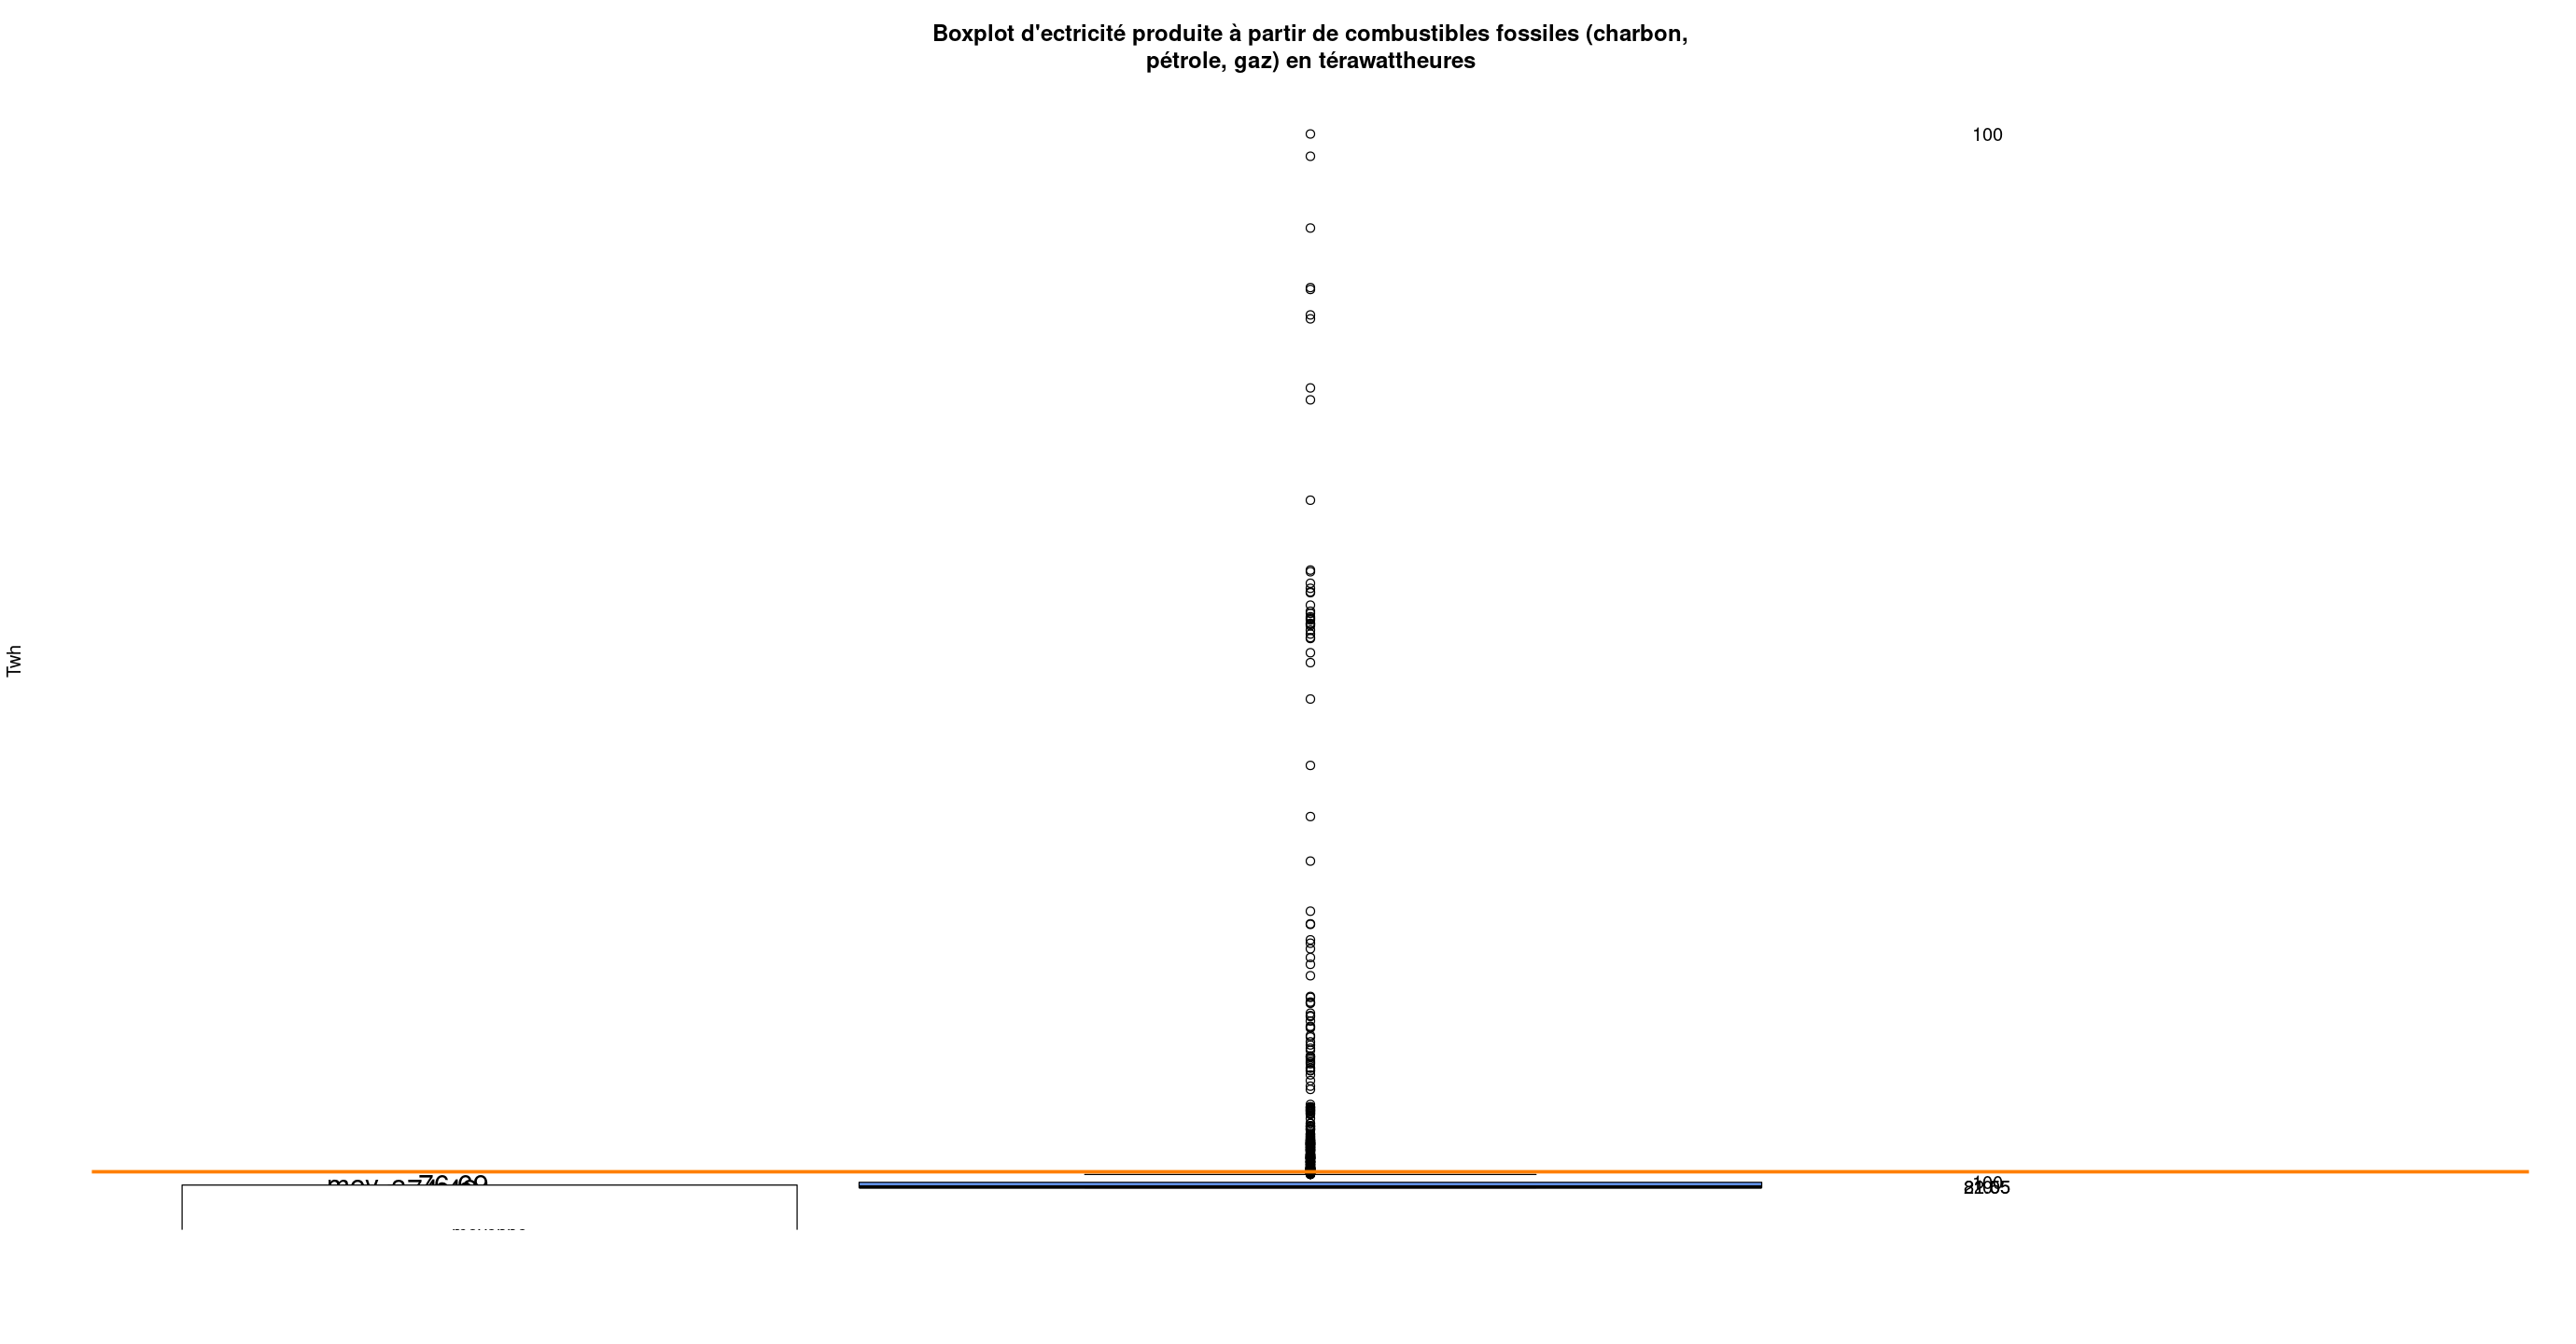

In [16]:
hist(data$Electricity.from.fossil.fuels..TWh., main="Histogramme d'ectricité produite à partir de combustibles fossiles (charbon,
pétrole, gaz) en térawattheures",
           xlab = 'Twh', ylab = 'Fréqence', col= 'cornflowerblue', breaks = 25)
boxplot(data$Electricity.from.fossil.fuels..TWh., main = "Boxplot d'ectricité produite à partir de combustibles fossiles (charbon,
pétrole, gaz) en térawattheures",
        ylab = 'Twh', axes=FALSE, col= 'cornflowerblue')
text(y = fivenum(data$Electricity.from.fossil.fuels..TWh.), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Electricity.from.fossil.fuels..TWh.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Electricity.from.fossil.fuels..TWh.), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Electricity.from.fossil.fuels..TWh.), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

Données après un double tranformation en square root

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Une valeur extrême (-Inf) dans la boite de dispersion 1 n'est pas représentée”


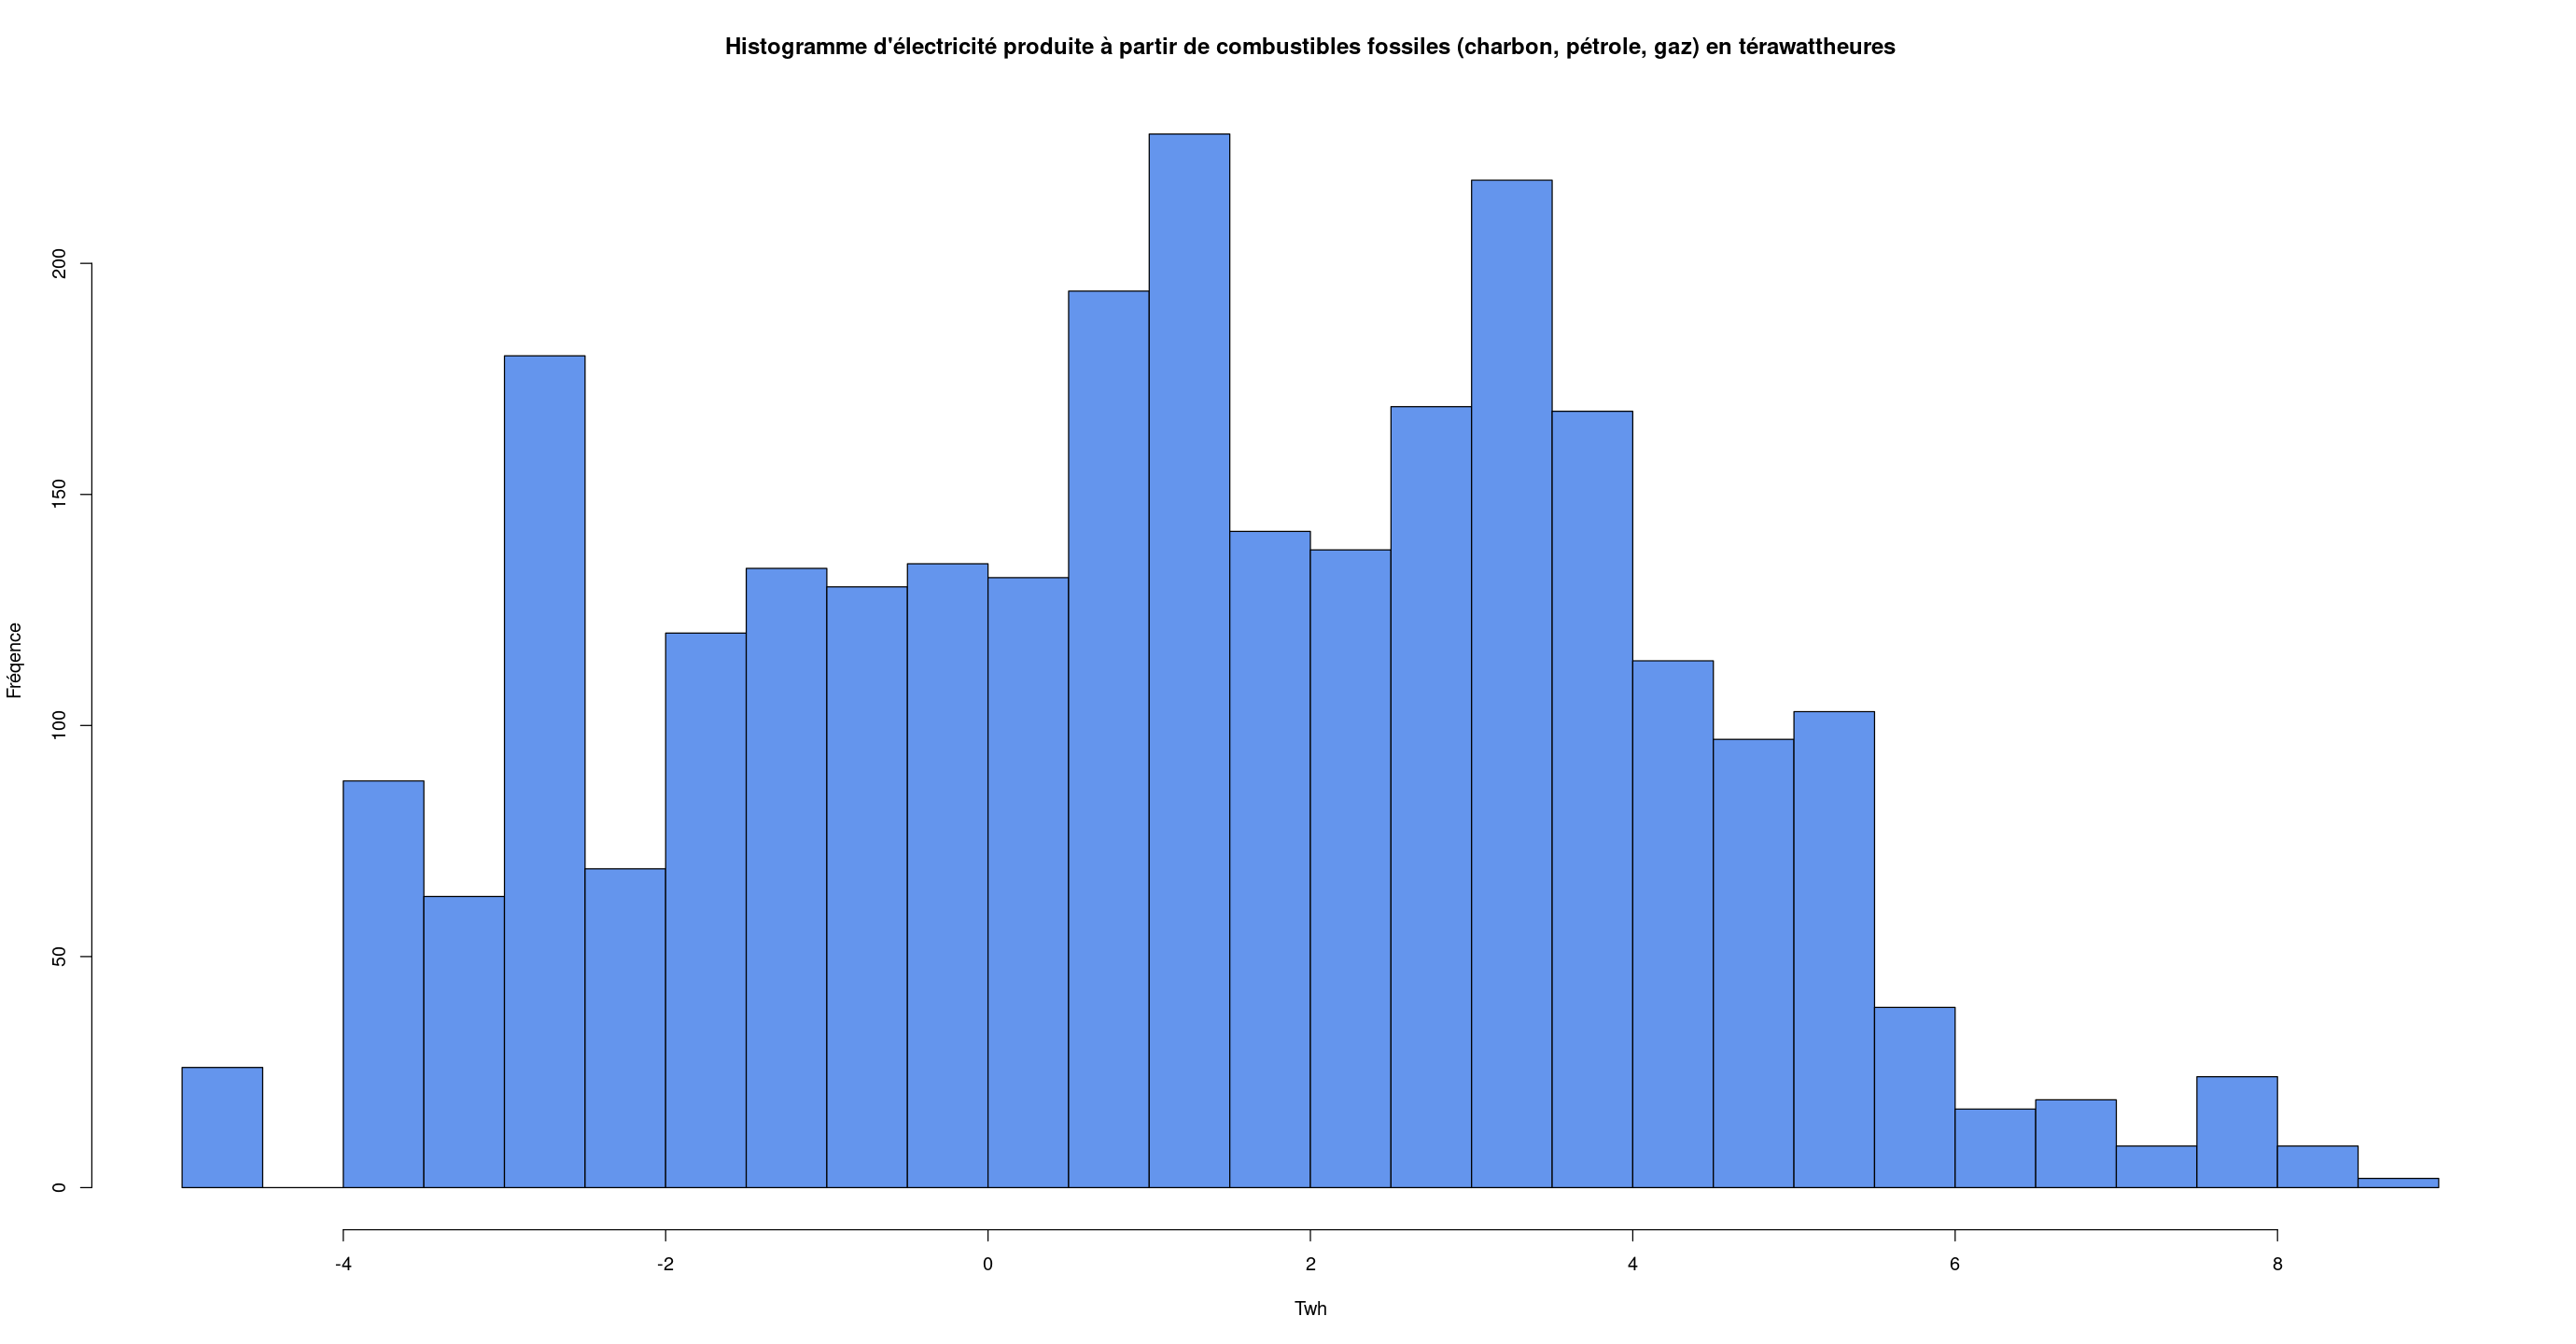

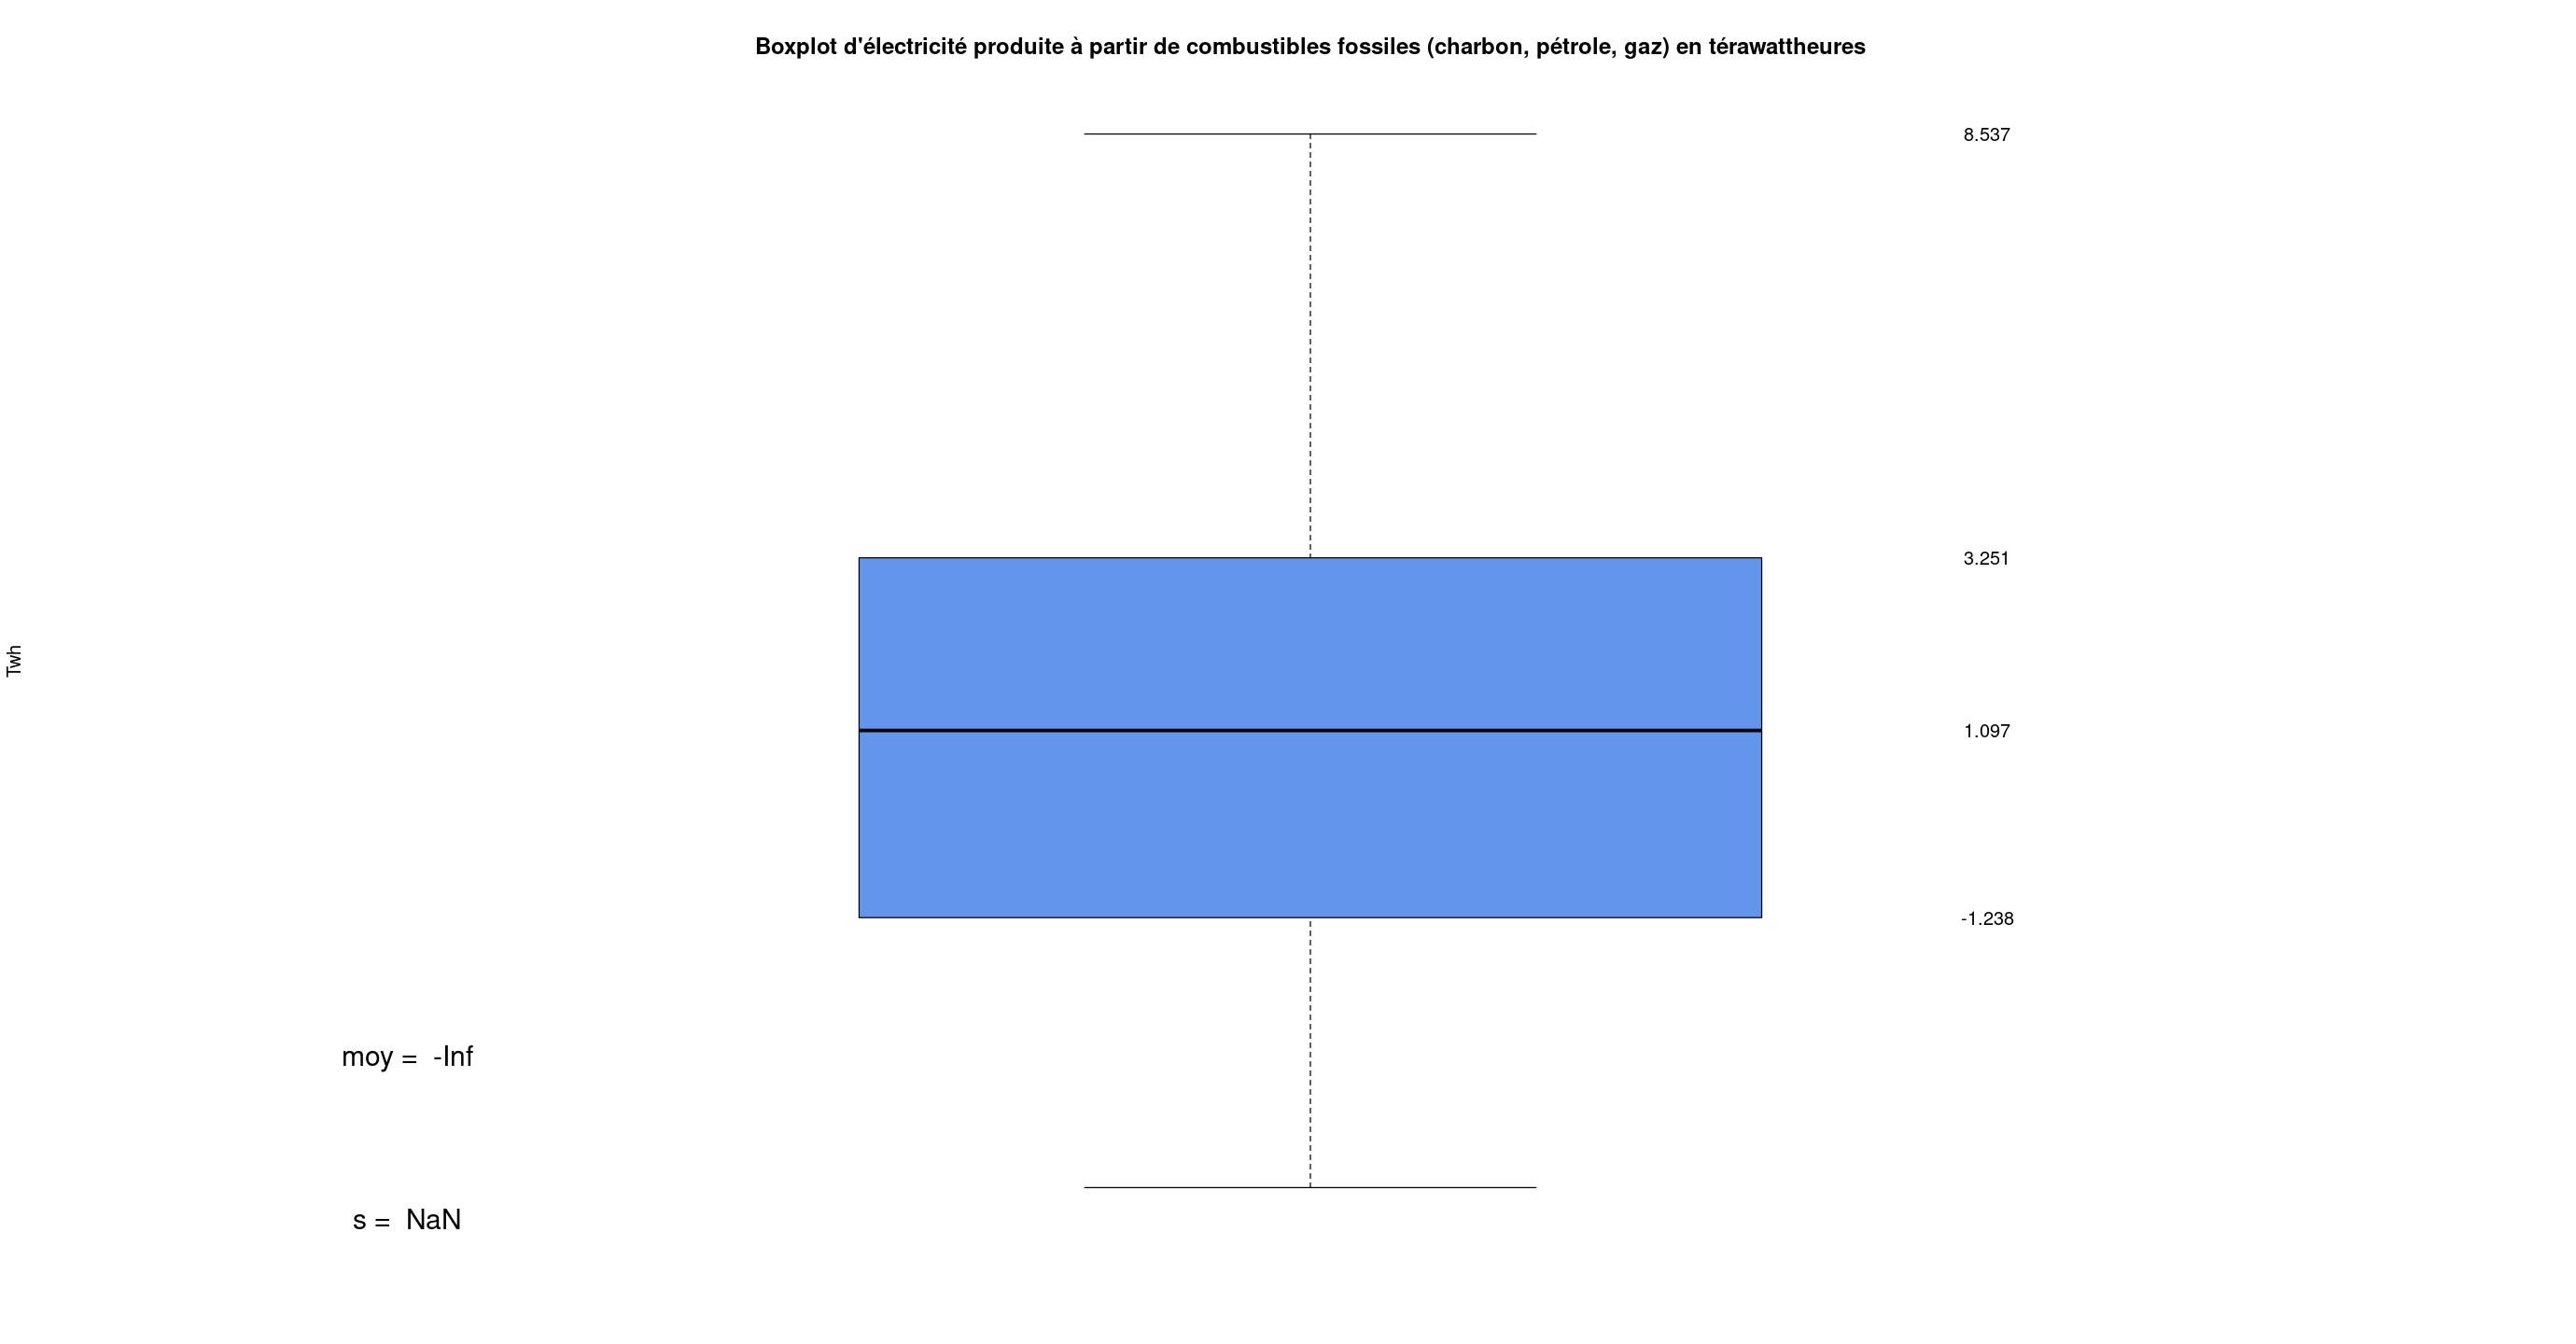

In [17]:
# Square Root Transformation
data$sqrt_transformed <- log(data$Electricity.from.fossil.fuels..TWh.)

# Histogram
hist(data$sqrt_transformed,
     main = "Histogramme d'électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures",
     xlab = 'Twh', ylab = 'Fréqence', col = 'cornflowerblue', breaks = 25)

# Boxplot
boxplot(data$sqrt_transformed,
        main = "Boxplot d'électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures",
        ylab = 'Twh', axes = FALSE, col = 'cornflowerblue')
text(y = fivenum(data$sqrt_transformed),
     labels = round(fivenum(data$sqrt_transformed), 3),
     x = 1.3)

# Horizontal line at the mean
abline(h = mean(data$sqrt_transformed), col = 'darkorange1', lwd = 3)

# Text annotations
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$sqrt_transformed), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$sqrt_transformed), 2)), cex = 1.5)

# Legend
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)


Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Une valeur extrême (-Inf) dans la boite de dispersion 1 n'est pas représentée”


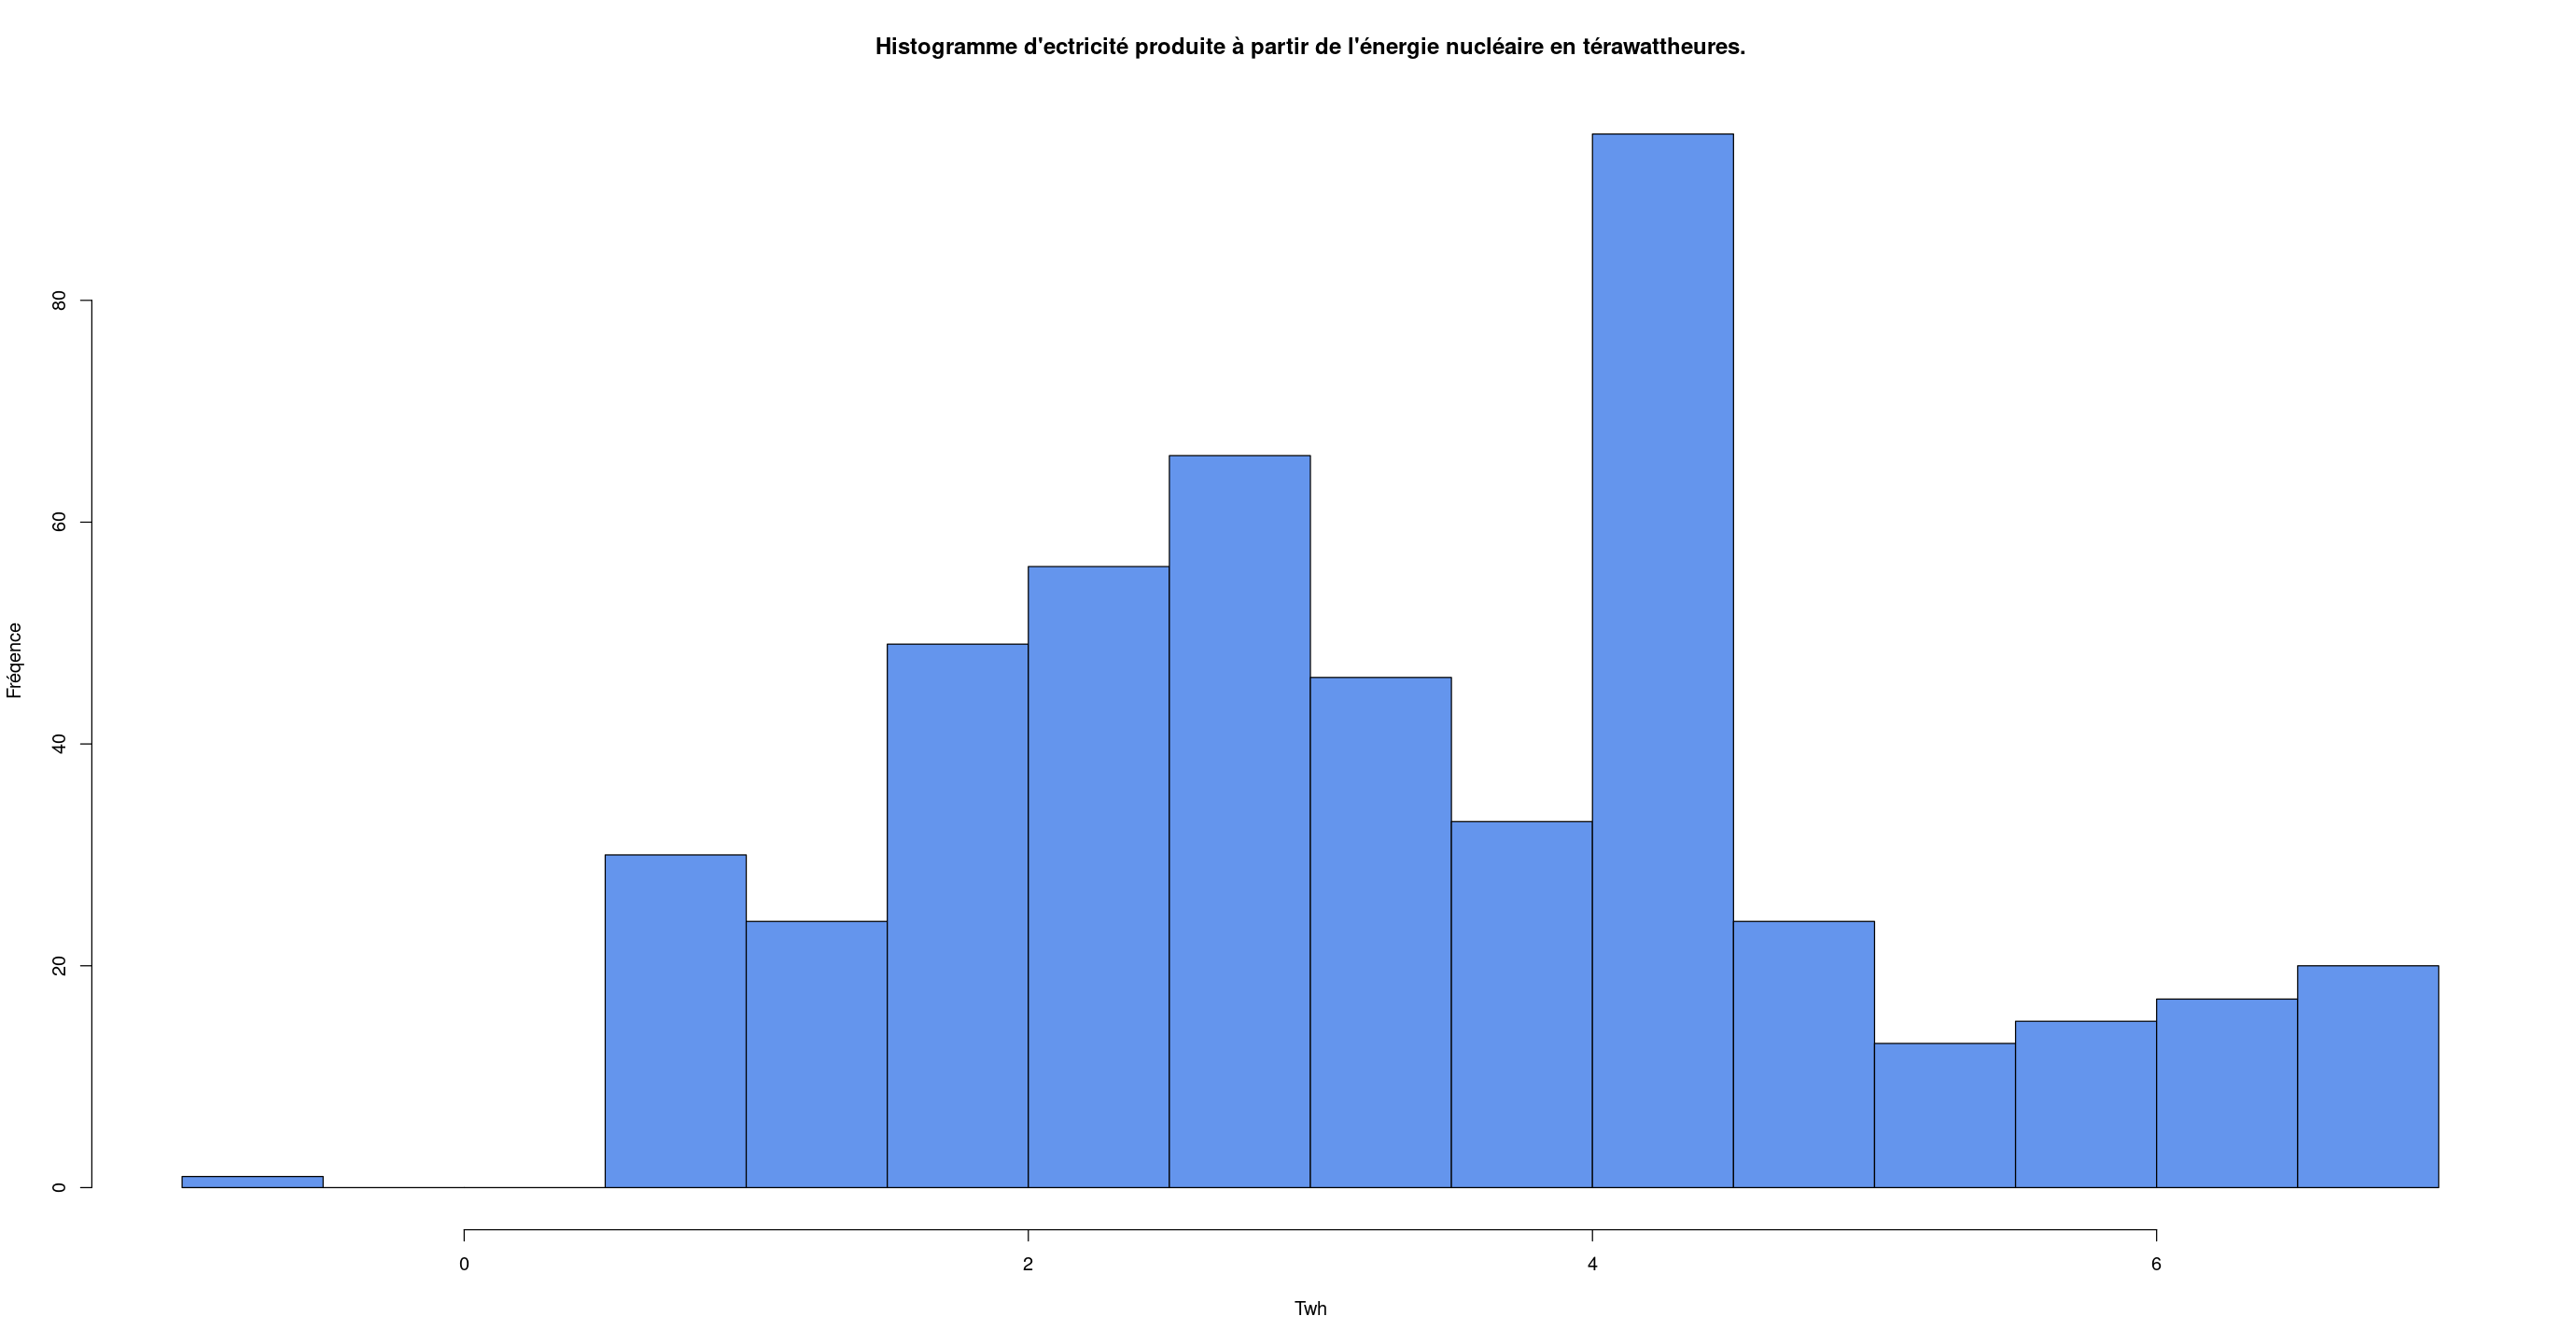

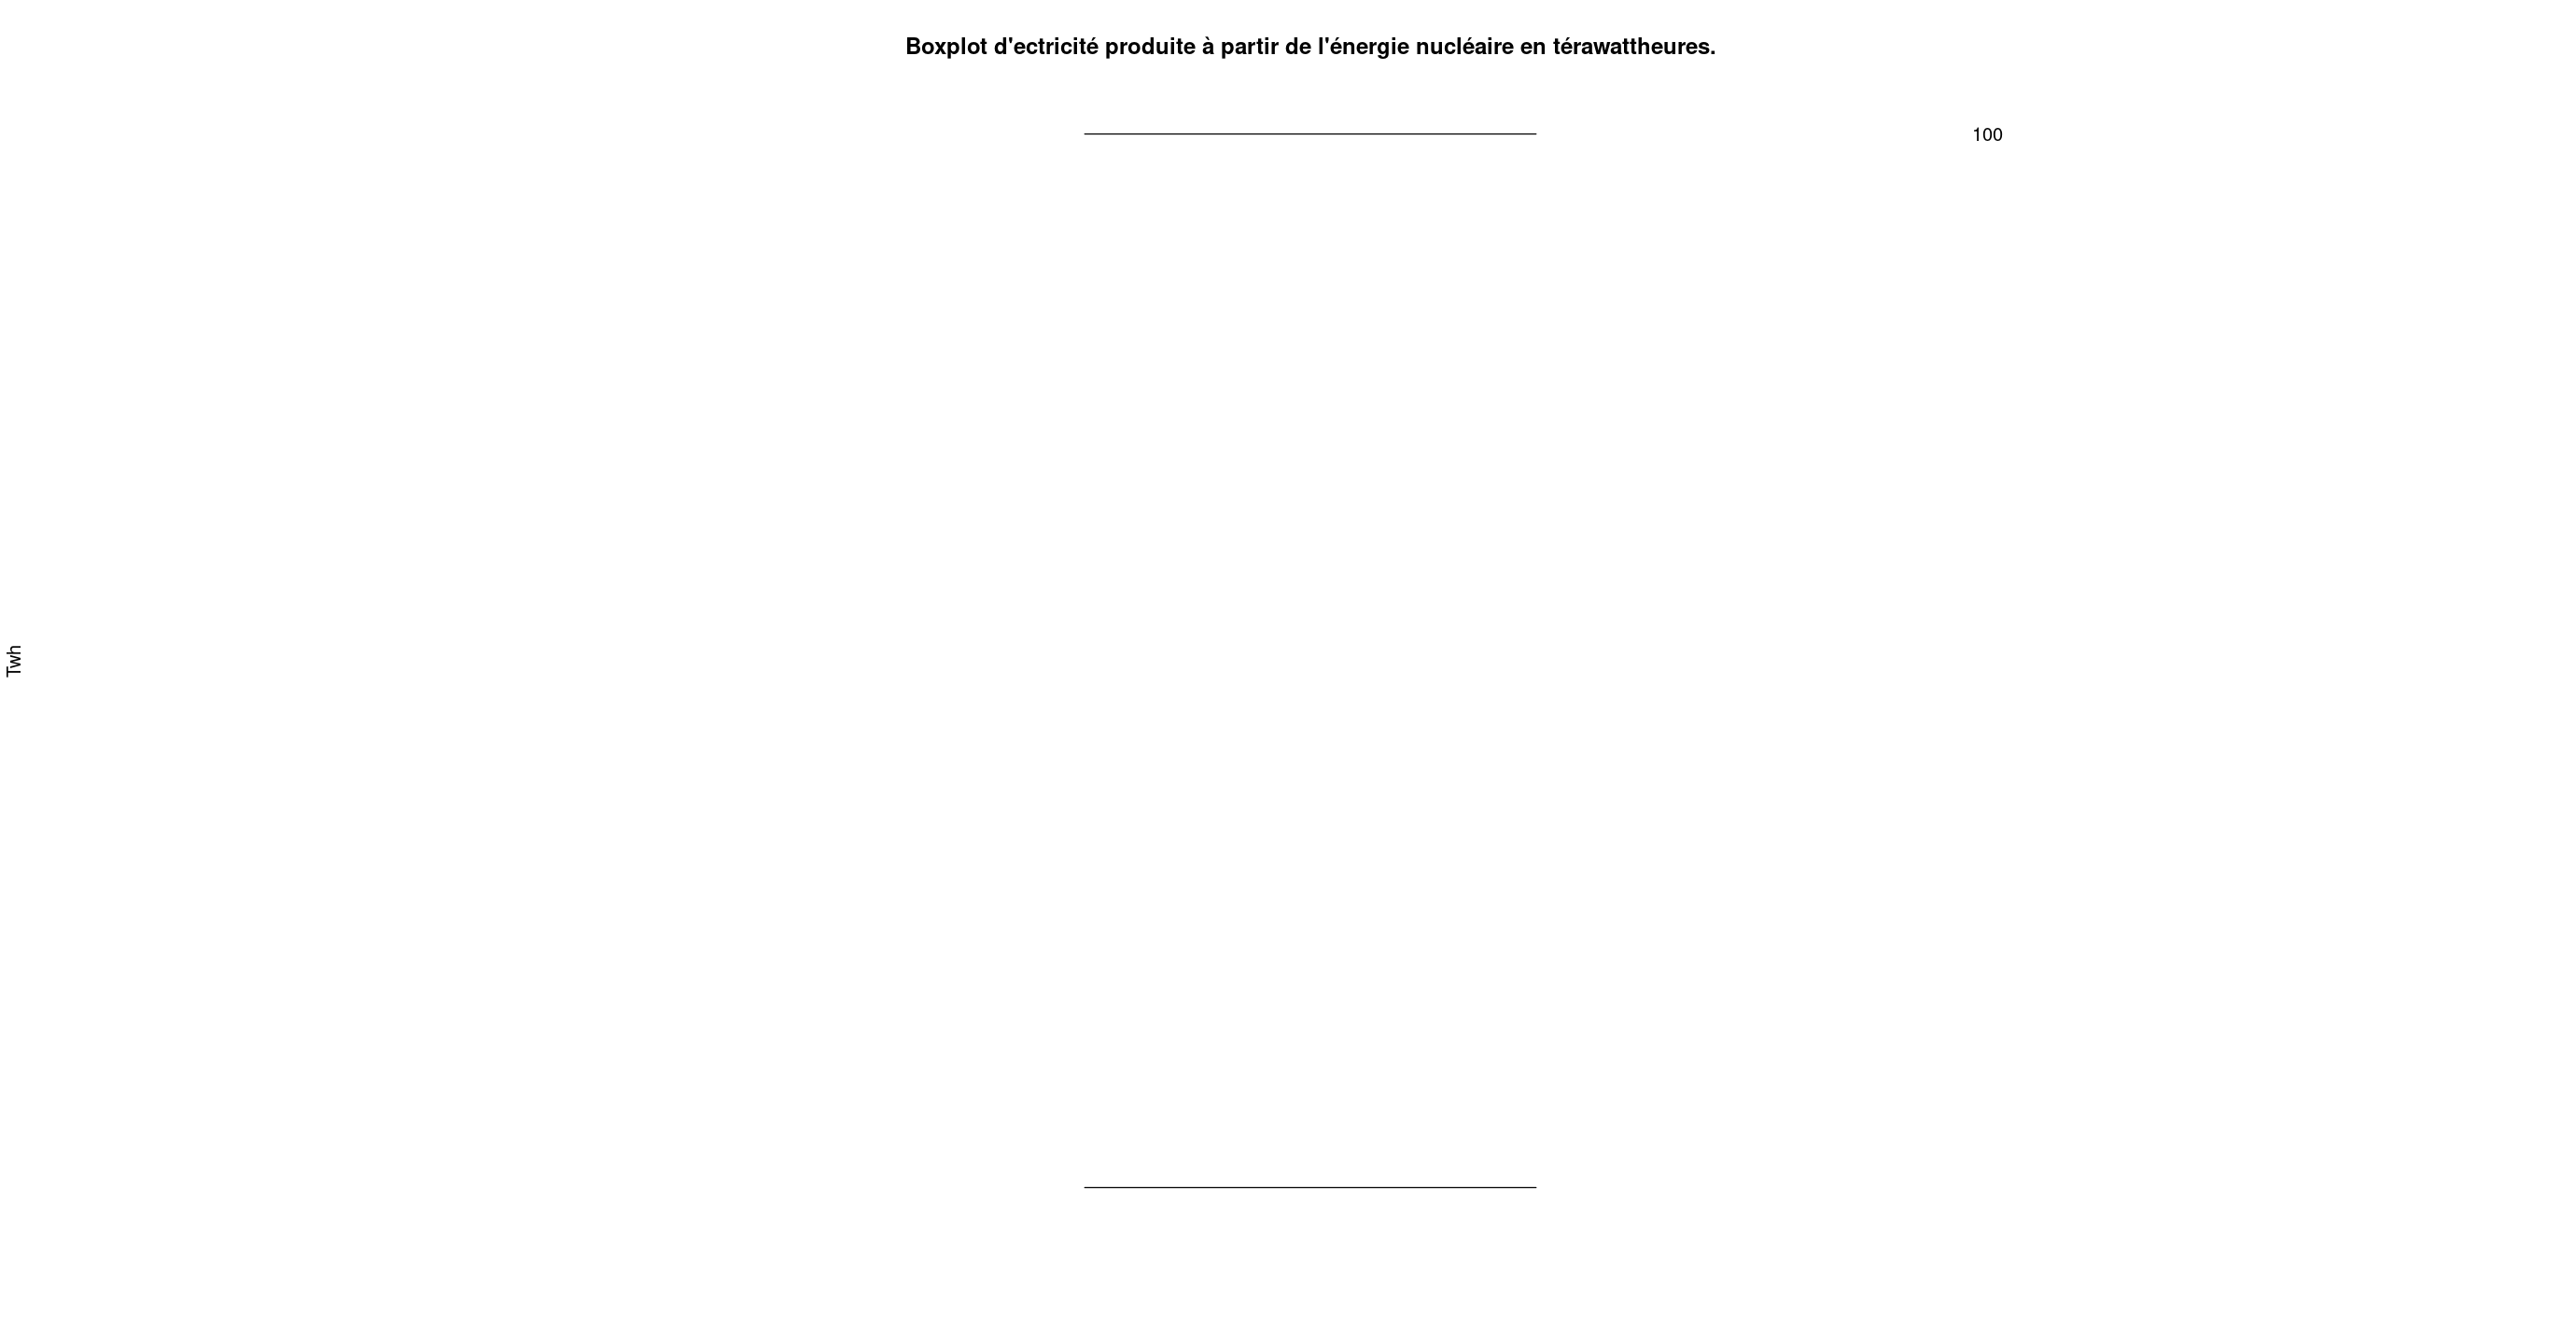

In [18]:
hist(log(data$Electricity.from.nuclear..TWh.), main="Histogramme d'ectricité produite à partir de l'énergie nucléaire en térawattheures.",
           xlab = 'Twh', ylab = 'Fréqence', col= 'cornflowerblue', breaks = 25)
boxplot(log(data$Electricity.from.nuclear..TWh.), main = "Boxplot d'ectricité produite à partir de l'énergie nucléaire en térawattheures.",
        ylab = 'Twh', axes=FALSE, col= 'cornflowerblue')
text(y = fivenum(log(data$Electricity.from.nuclear..TWh.)), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(log(data$Electricity.from.nuclear..TWh.)), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(log(data$Electricity.from.nuclear..TWh.)), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(log(data$Electricity.from.nuclear..TWh.)), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Une valeur extrême (-Inf) dans la boite de dispersion 1 n'est pas représentée”


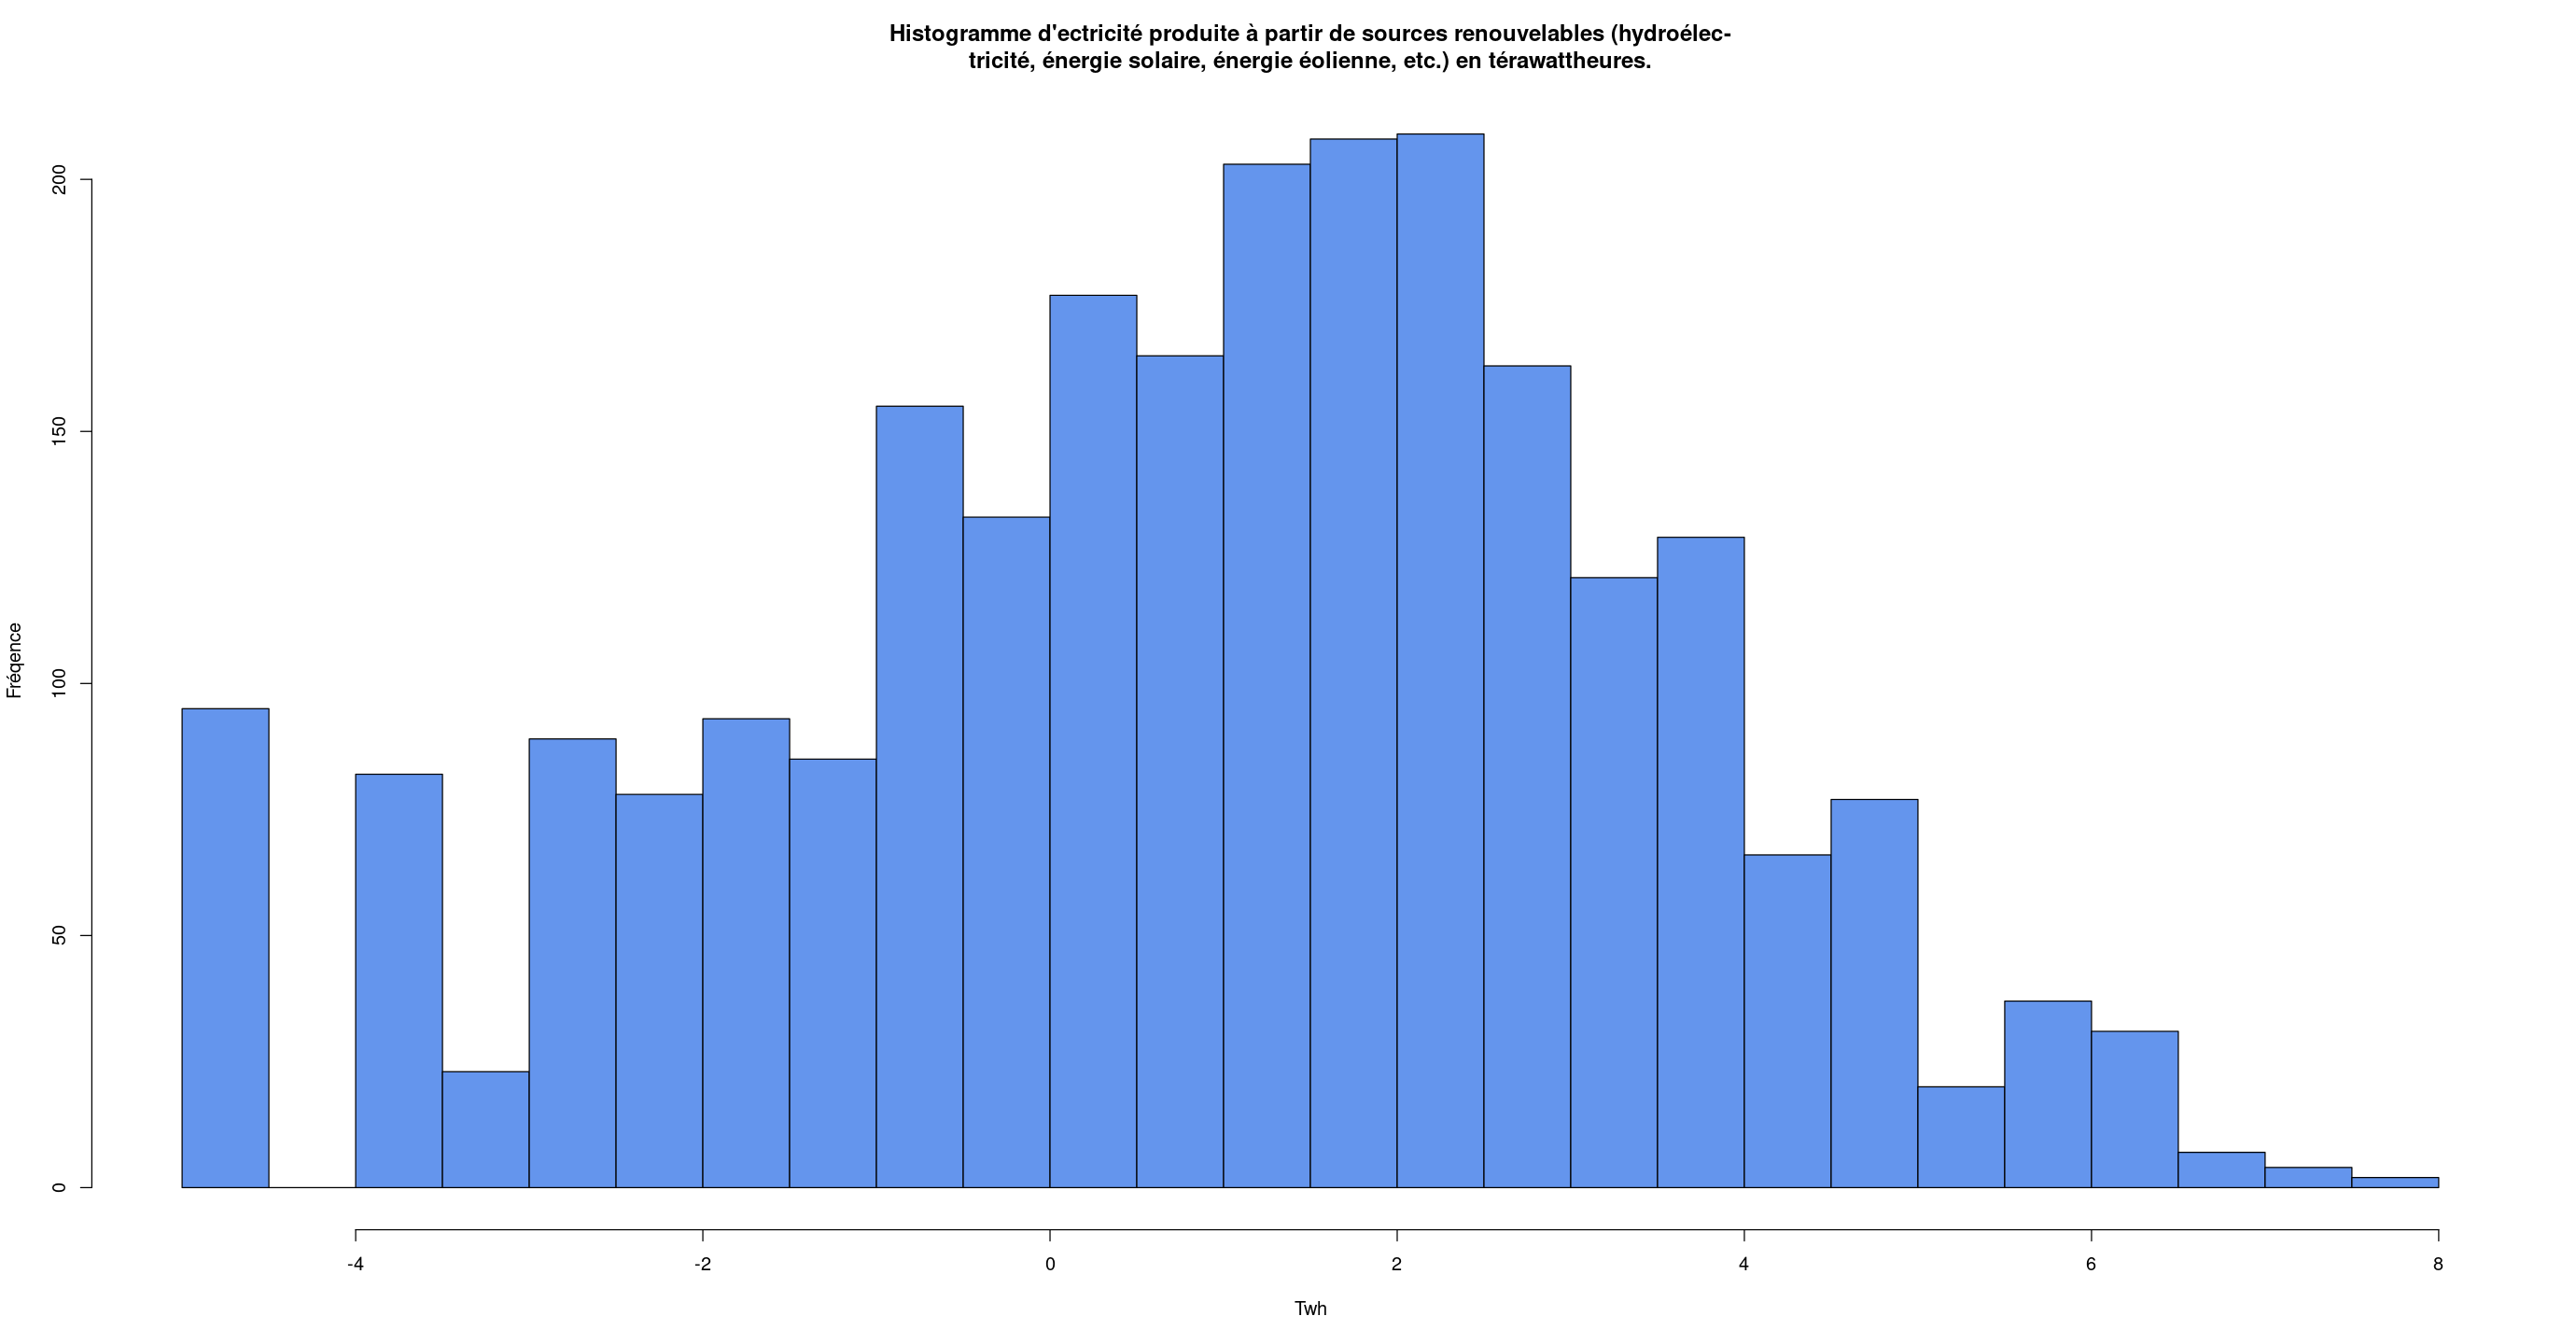

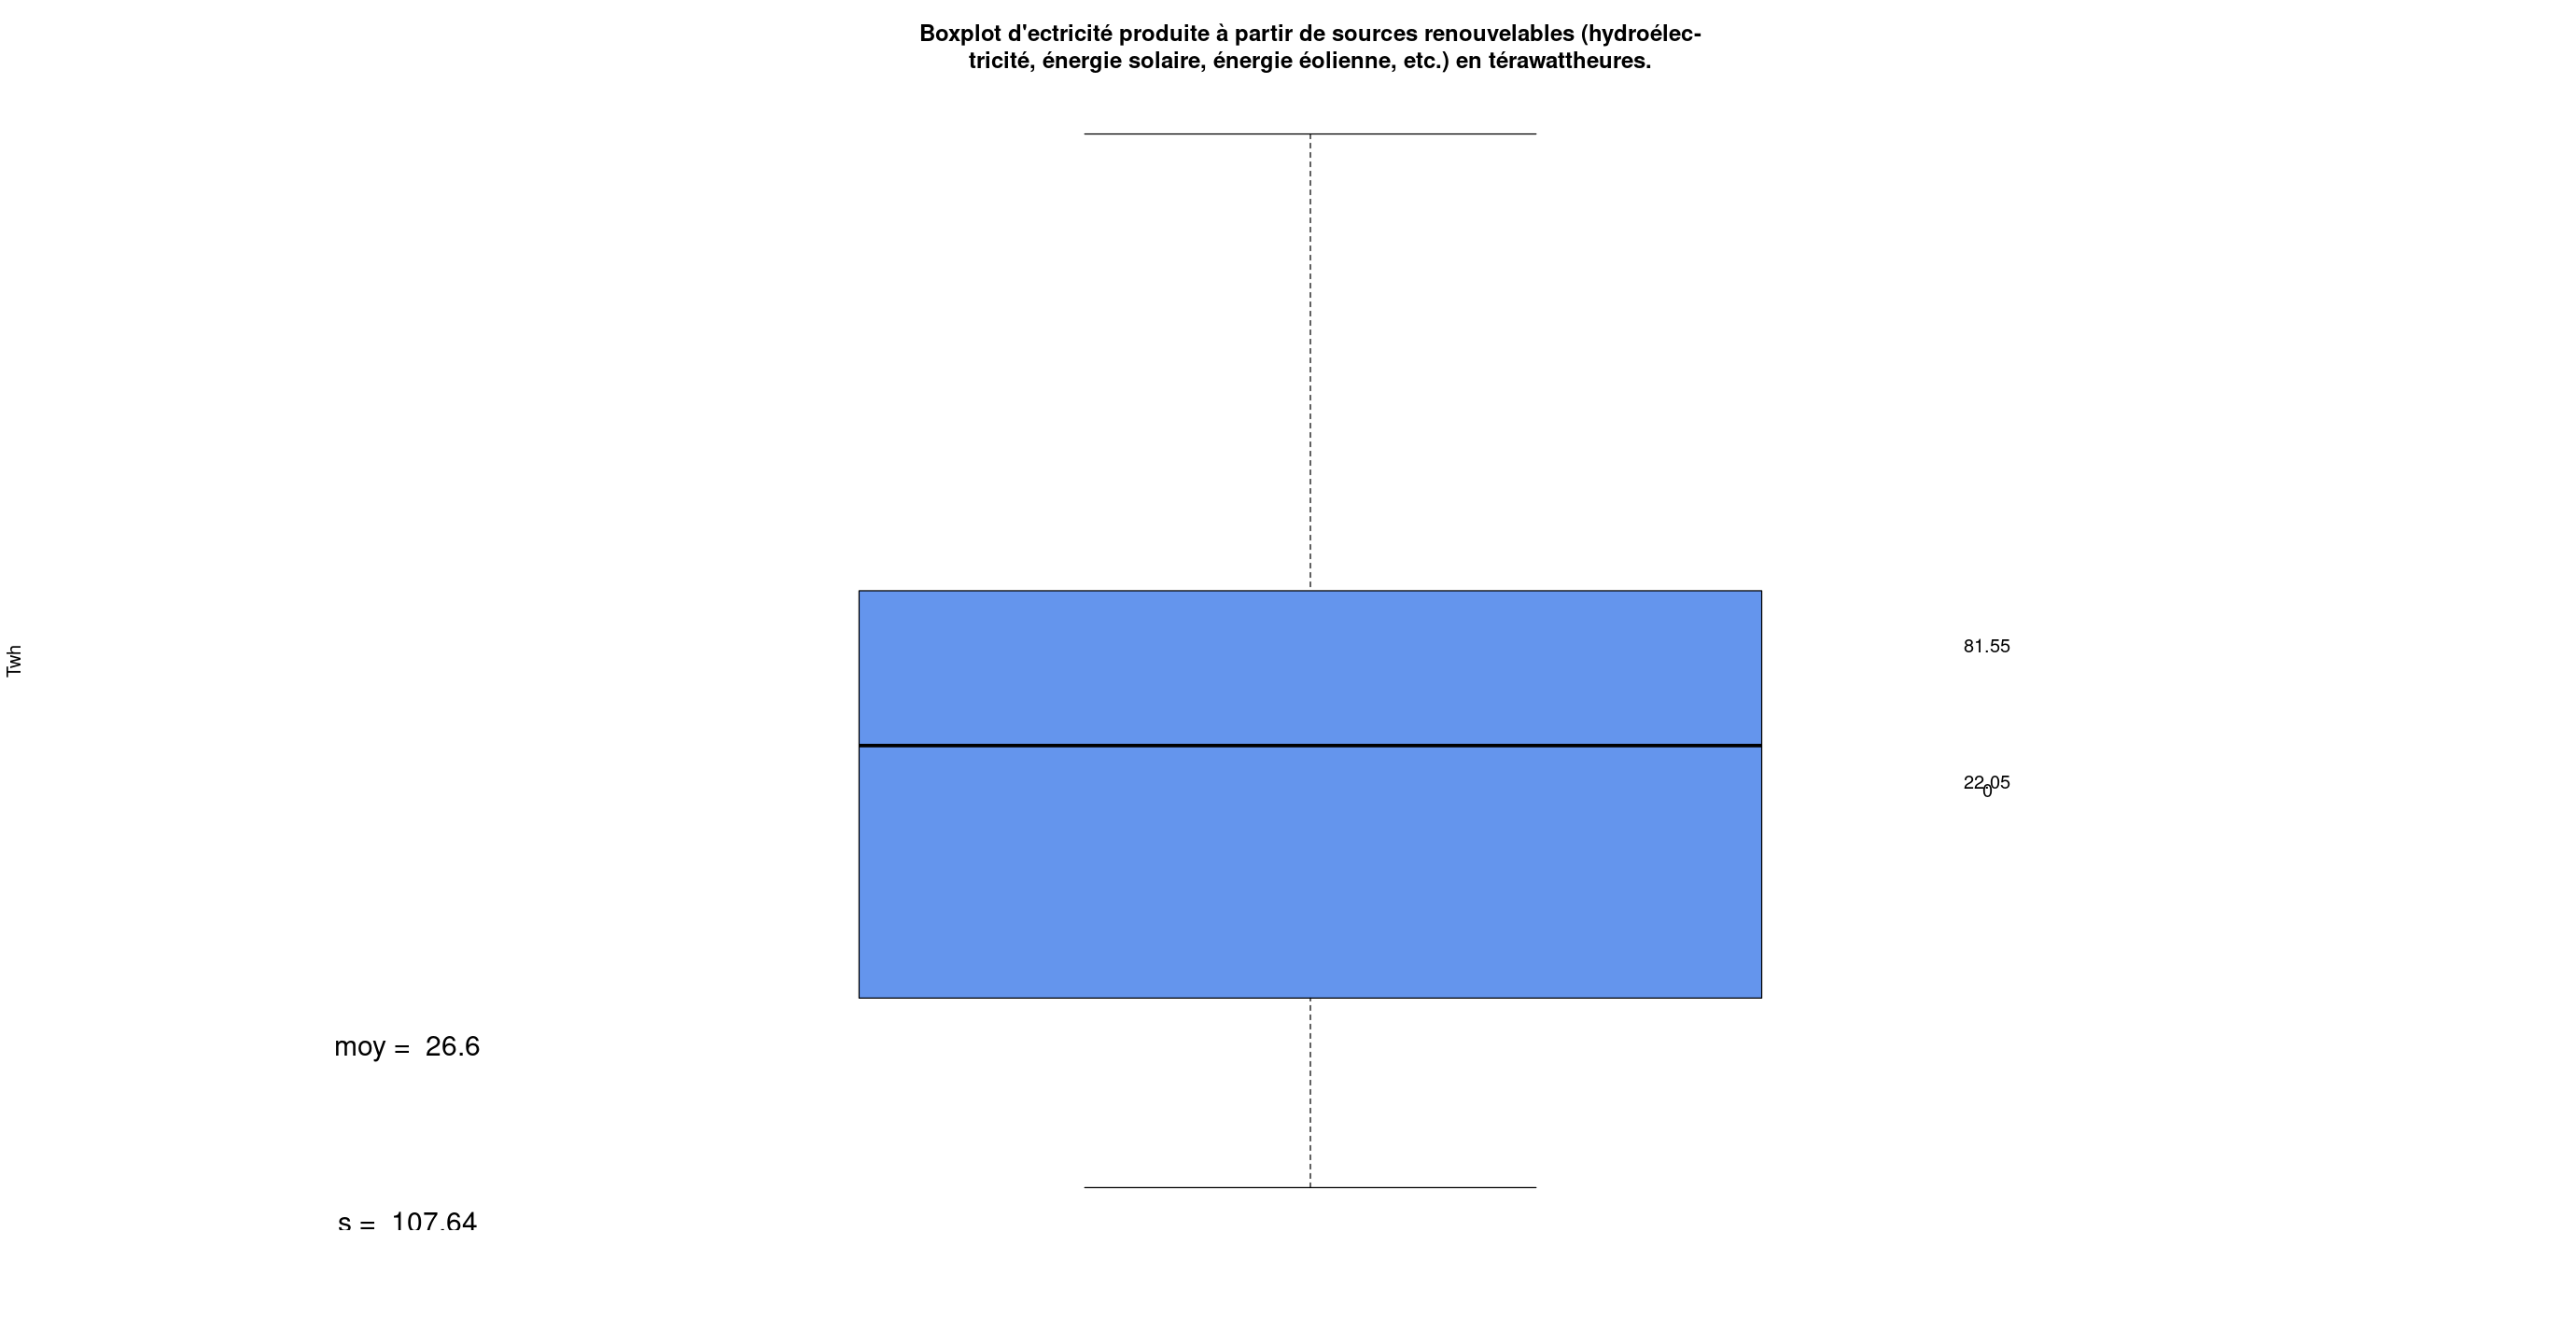

In [19]:
hist(log(data$Electricity.from.renewables..TWh.), main="Histogramme d'ectricité produite à partir de sources renouvelables (hydroélec-
tricité, énergie solaire, énergie éolienne, etc.) en térawattheures.",
           xlab = 'Twh', ylab = 'Fréqence', col= 'cornflowerblue', breaks = 25)
boxplot(log(data$Electricity.from.renewables..TWh.), main = "Boxplot d'ectricité produite à partir de sources renouvelables (hydroélec-
tricité, énergie solaire, énergie éolienne, etc.) en térawattheures.",
        ylab = 'Twh', axes=FALSE, col= 'cornflowerblue')
text(y = fivenum(data$Electricity.from.renewables..TWh.), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Electricity.from.renewables..TWh.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = -3, labels = paste('moy = ', round(mean(data$Electricity.from.renewables..TWh.), 2)), cex = 1.5)
text(x = 0.6, y = -5, labels = paste('s = ', round(sd(data$Electricity.from.renewables..TWh.), 2)), cex = 1.5)
legend(x = 0.5, y = 12.5, legend = 'moyenne', col = "darkorange1", lty = 1, cex = 1)

## Question 5

Visualization of the great heterogeneity of CO2 emissions between countries.

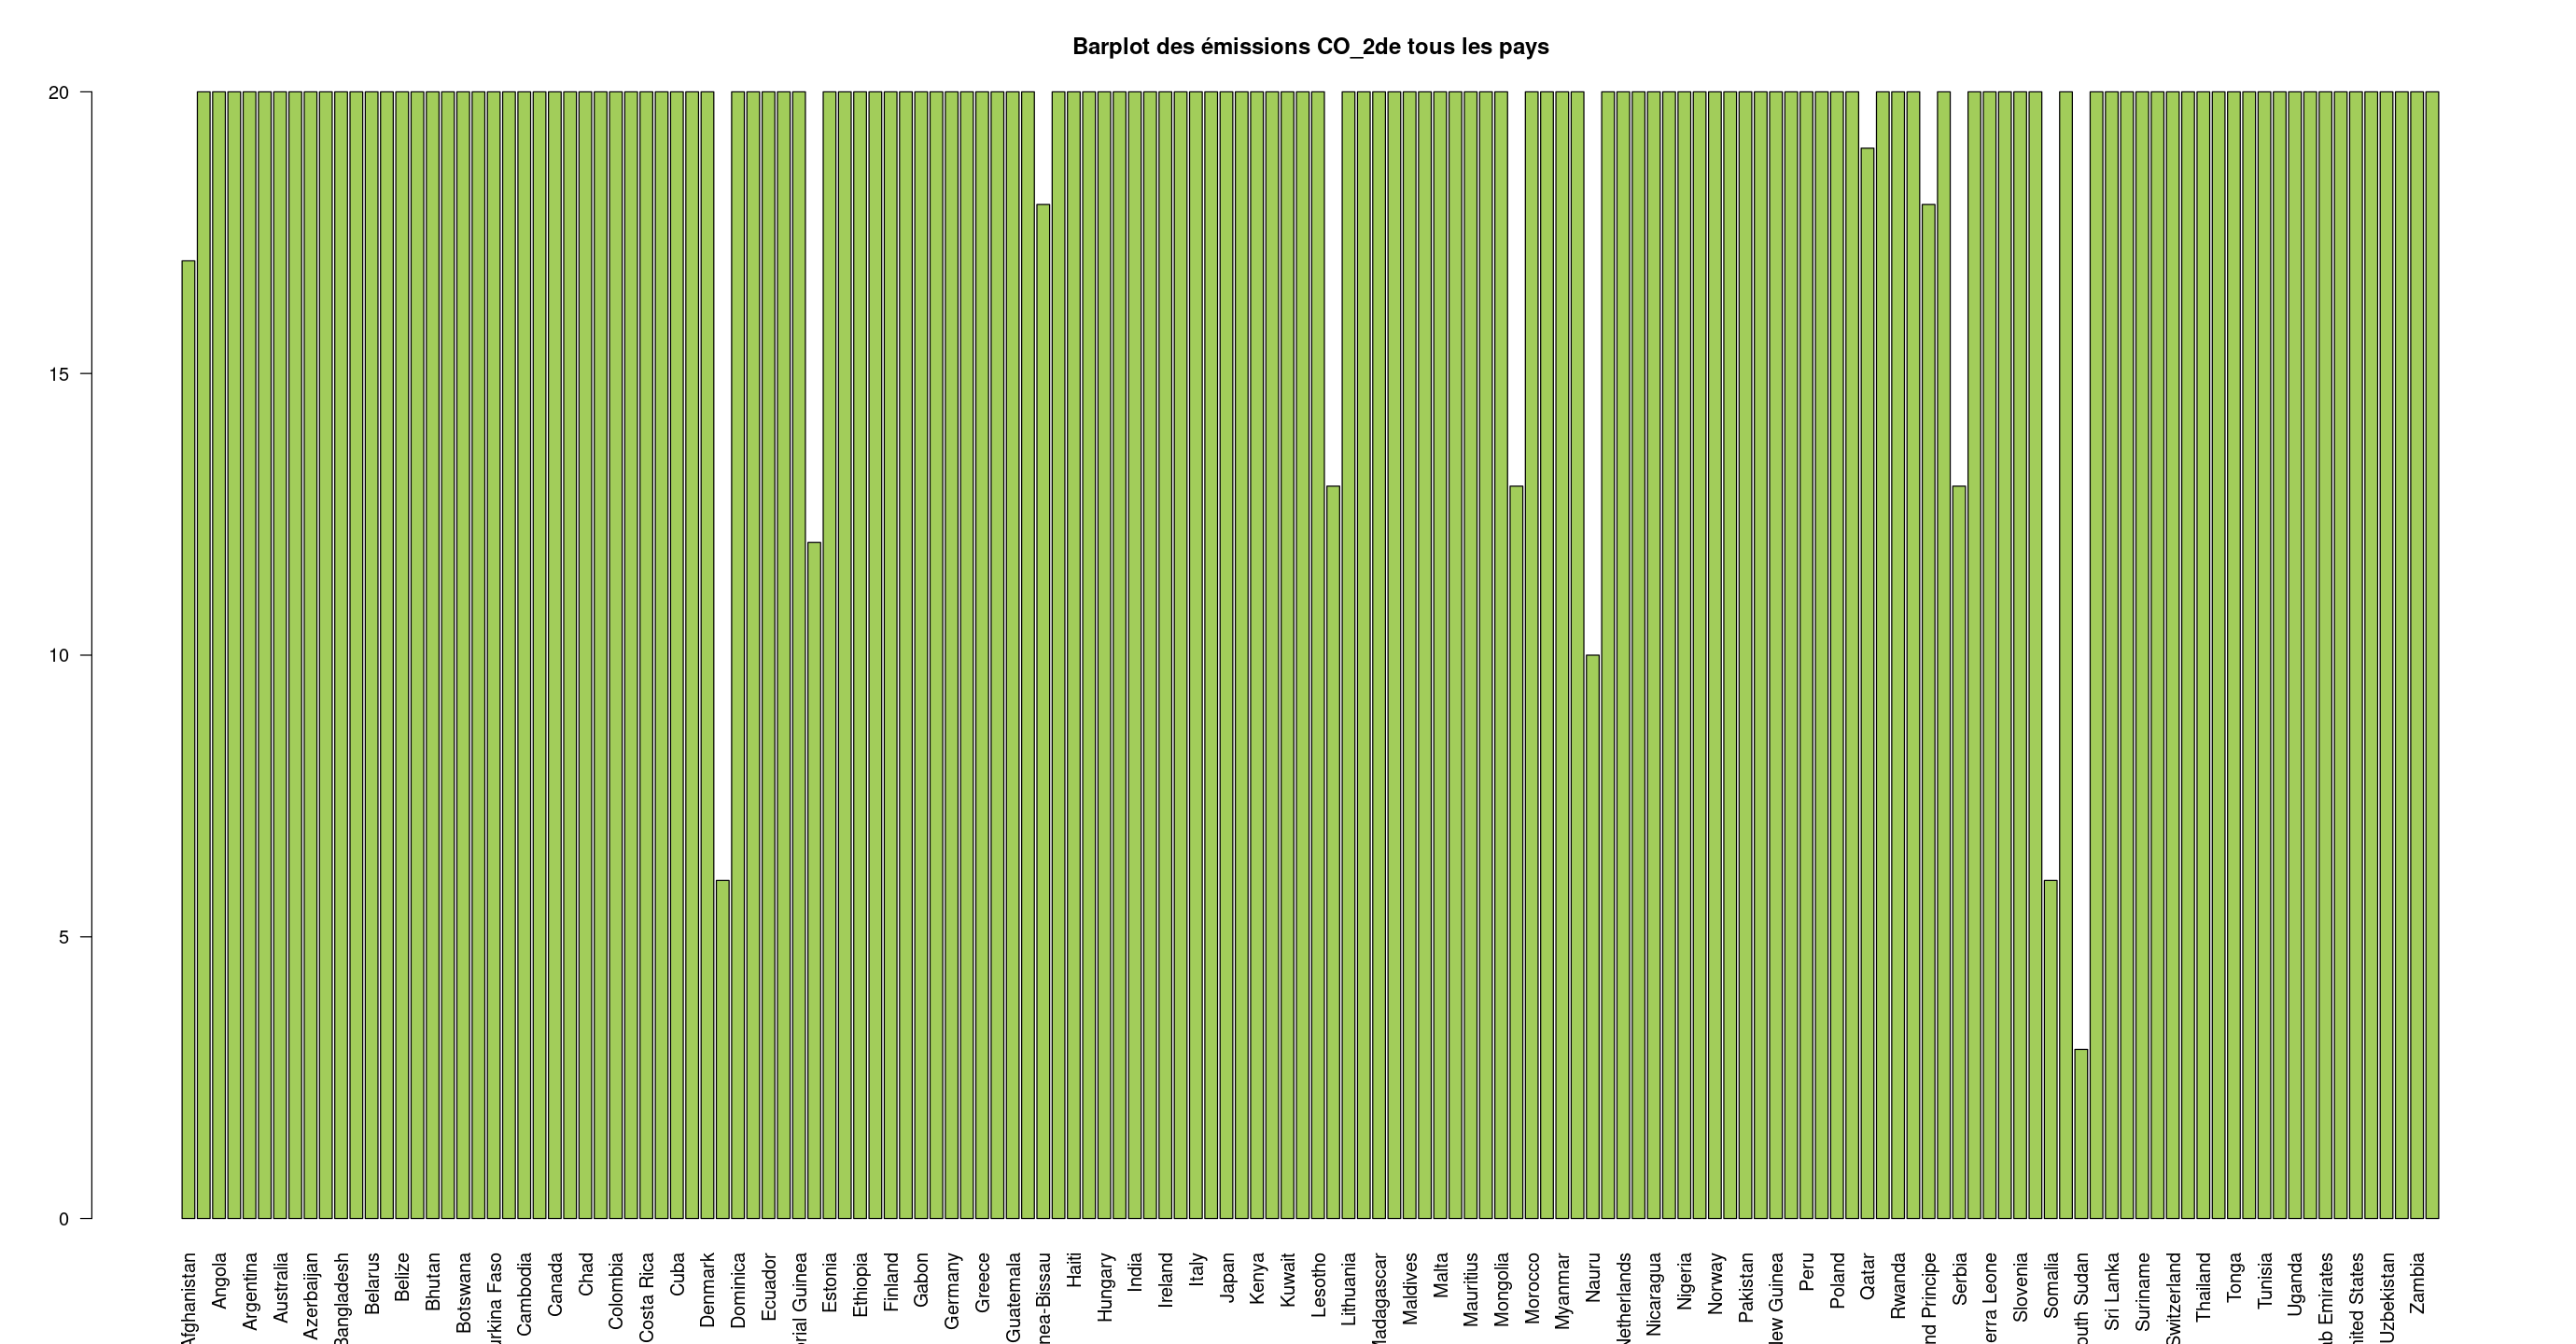

In [ ]:
ggplot(data, aes(x = Entity, y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "darkolivegreen3") +
  labs(title = "Barplot of CO2 emissions for all countries",
       x = "Entity", y = "Value_co2_emissions_kt_by_country")


In [21]:
# Aggregate CO2 emissions by country over all years
total_emissions_by_country <- aggregate(Value_co2_emissions_kt_by_country ~ Entity, data = data, sum)

# Identification of the top 5 CO2 emitting countries
top5_emitters <- total_emissions_by_country[order(total_emissions_by_country$Value_co2_emissions_kt_by_country, decreasing = TRUE), ]
top5_emitters <- head(top5_emitters, 5)

# Display the top 5 CO2 emitting countries.
cat("The top 5 CO2 emitting countries are: \n")
cat(paste(top5_emitters$Entity, collapse = ", "))

The top 5 CO2 emitting countries are: 
China, United States, India, Japan, Germany

## Question 6


## Multidimensional descriptive analysis

We continue the descriptive analysis of the data through a multi-dimensional analysis. Firstly, we explore the data through a scatter plot matrix.

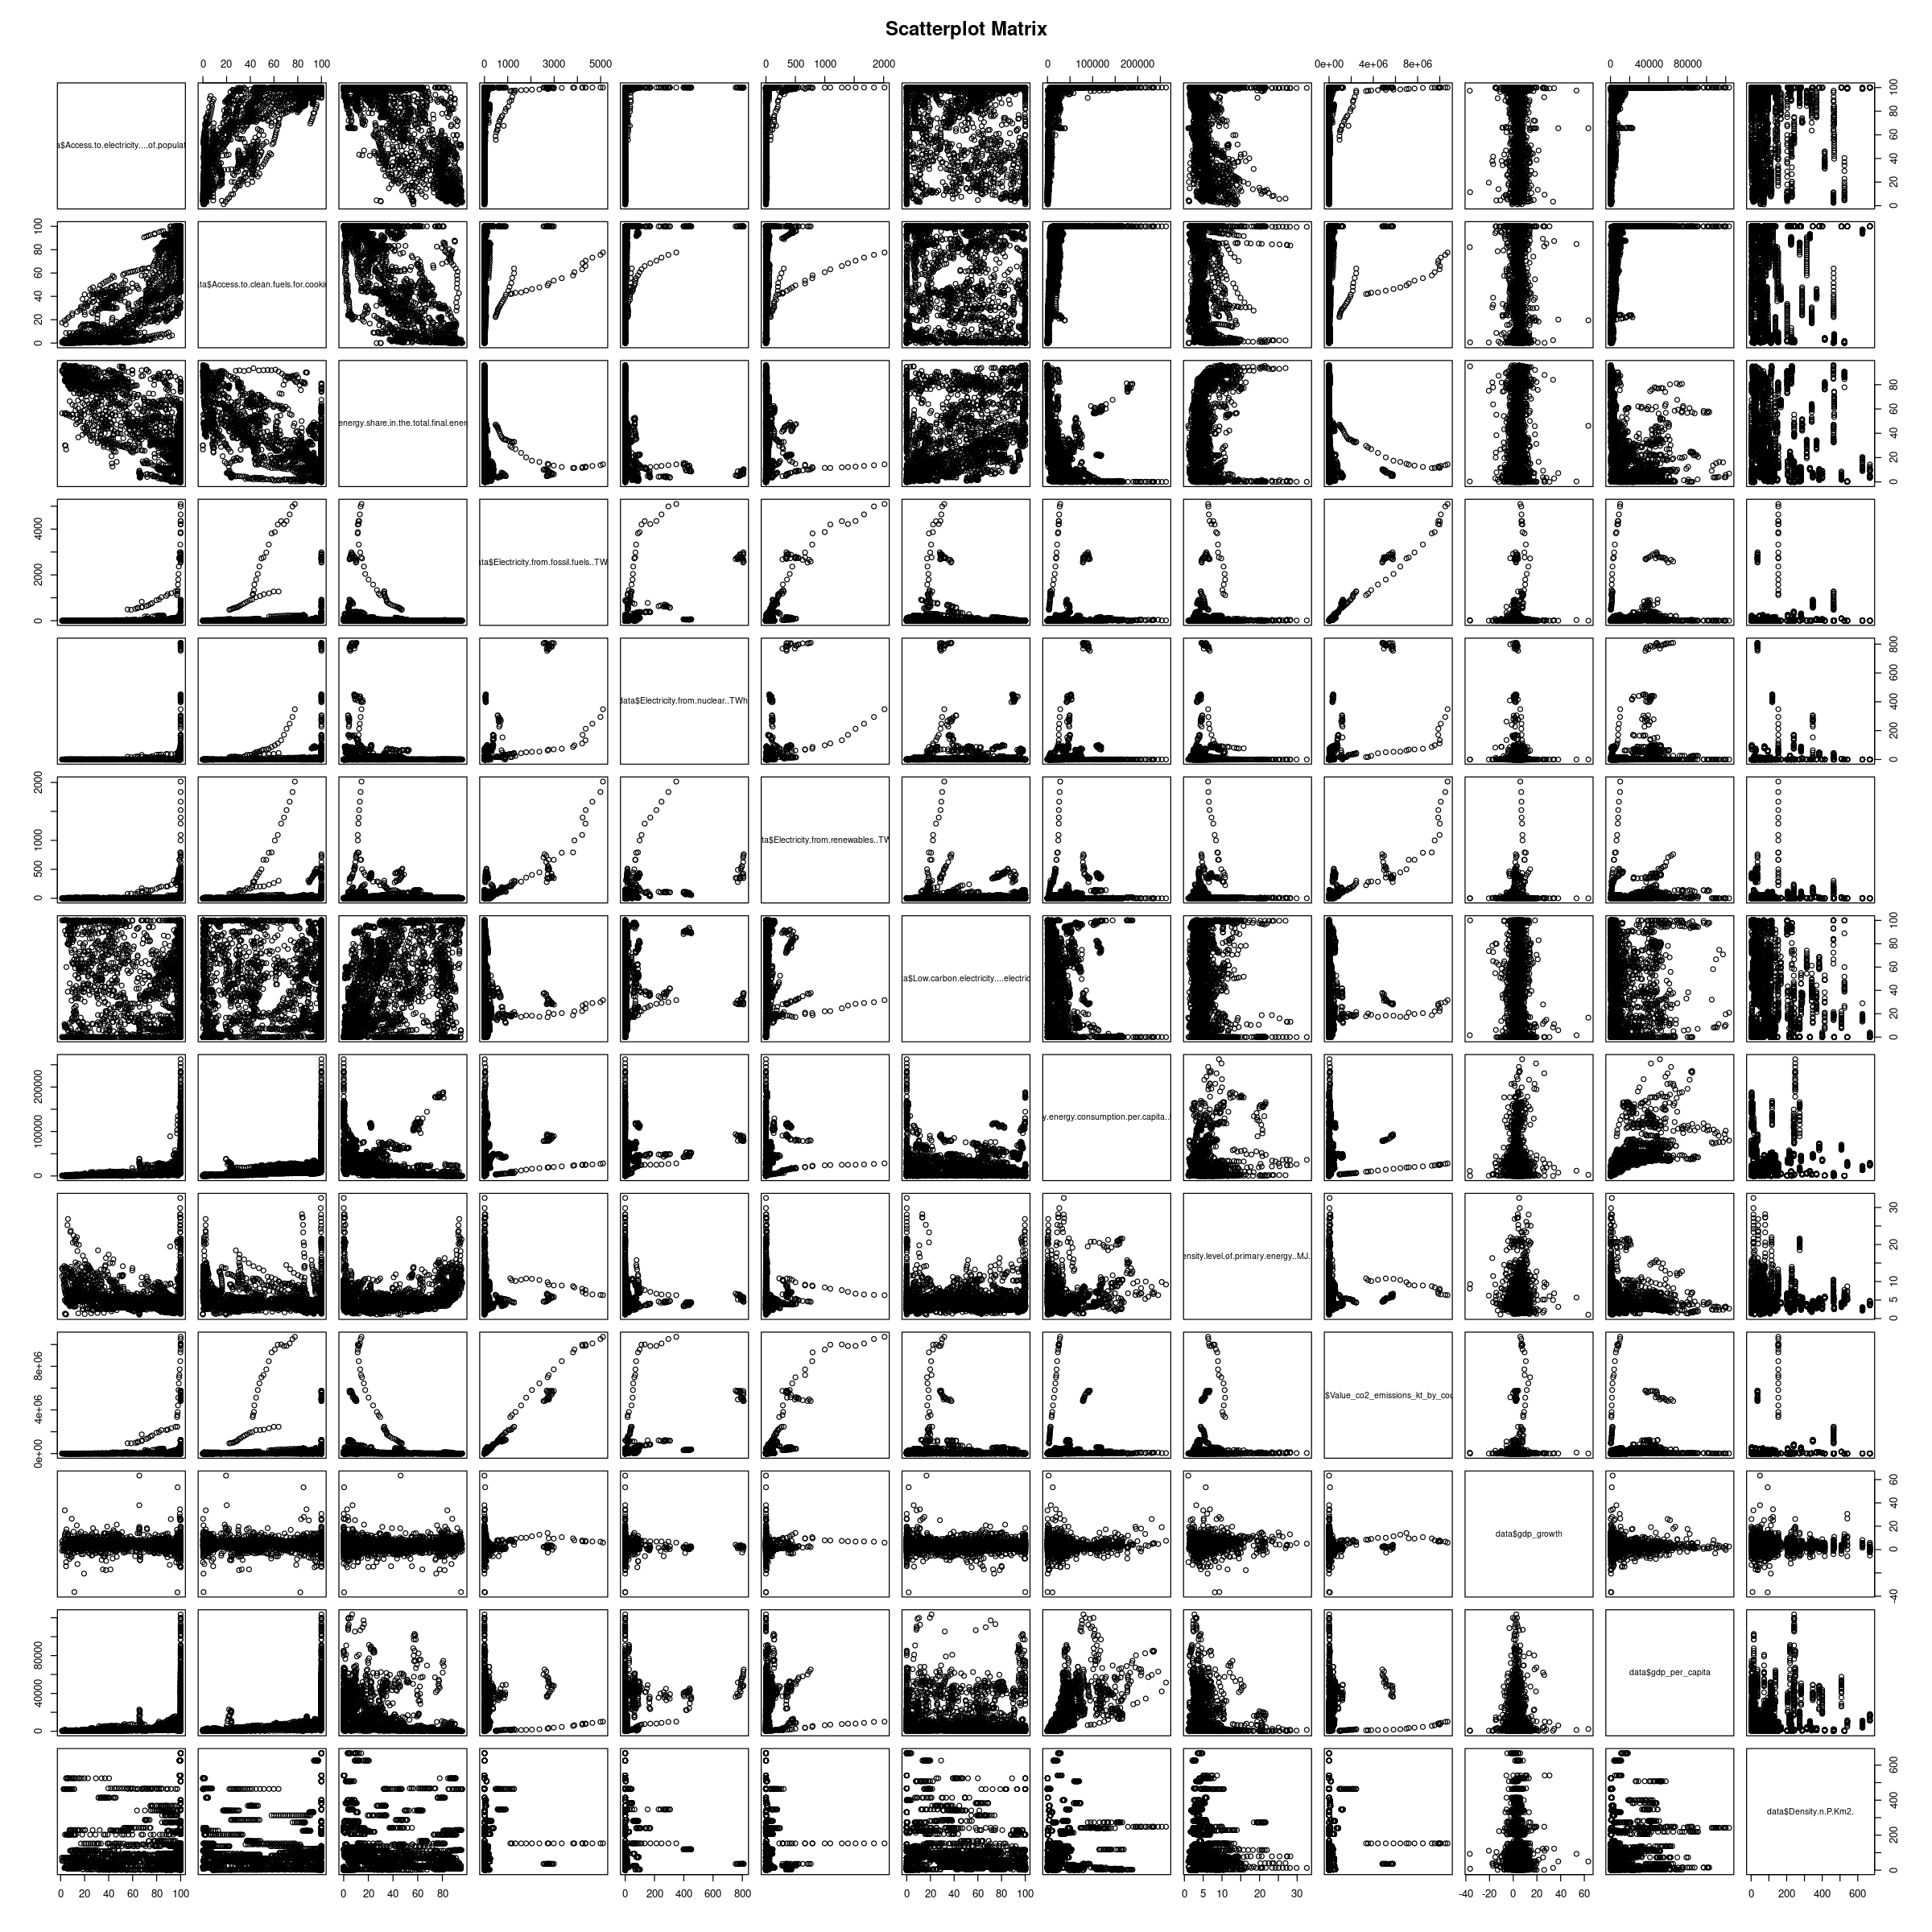

In [22]:
options(repr.plot.width = 20, repr.plot.height = 20)

pairs(~data$Access.to.electricity....of.population.	+
  data$Access.to.clean.fuels.for.cooking	+
  data$Renewable.energy.share.in.the.total.final.energy.consumption....	+
  data$Electricity.from.fossil.fuels..TWh.	+
  data$Electricity.from.nuclear..TWh.	+
  data$Electricity.from.renewables..TWh.	+
  data$Low.carbon.electricity....electricity.	+
  data$Primary.energy.consumption.per.capita..kWh.person.	+
  data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. +
  data$Value_co2_emissions_kt_by_country+ data$gdp_growth +
  data$gdp_per_capita+ data$Density.n.P.Km2. ,data=data, main="Scatterplot Matrix")

At first look this scatter plot does not give us much insight, but we can deduce the following :

* As access to electricity increases, so does the availability of clean fuels for cooking.
* As access to electricity increases, the share of renewable energy in total final energy consumption decreases.
* Regardless of GDP per capita, GDP growth remains more or less constant.

We then proceed to explore the correlations in the data set using a scatter plot

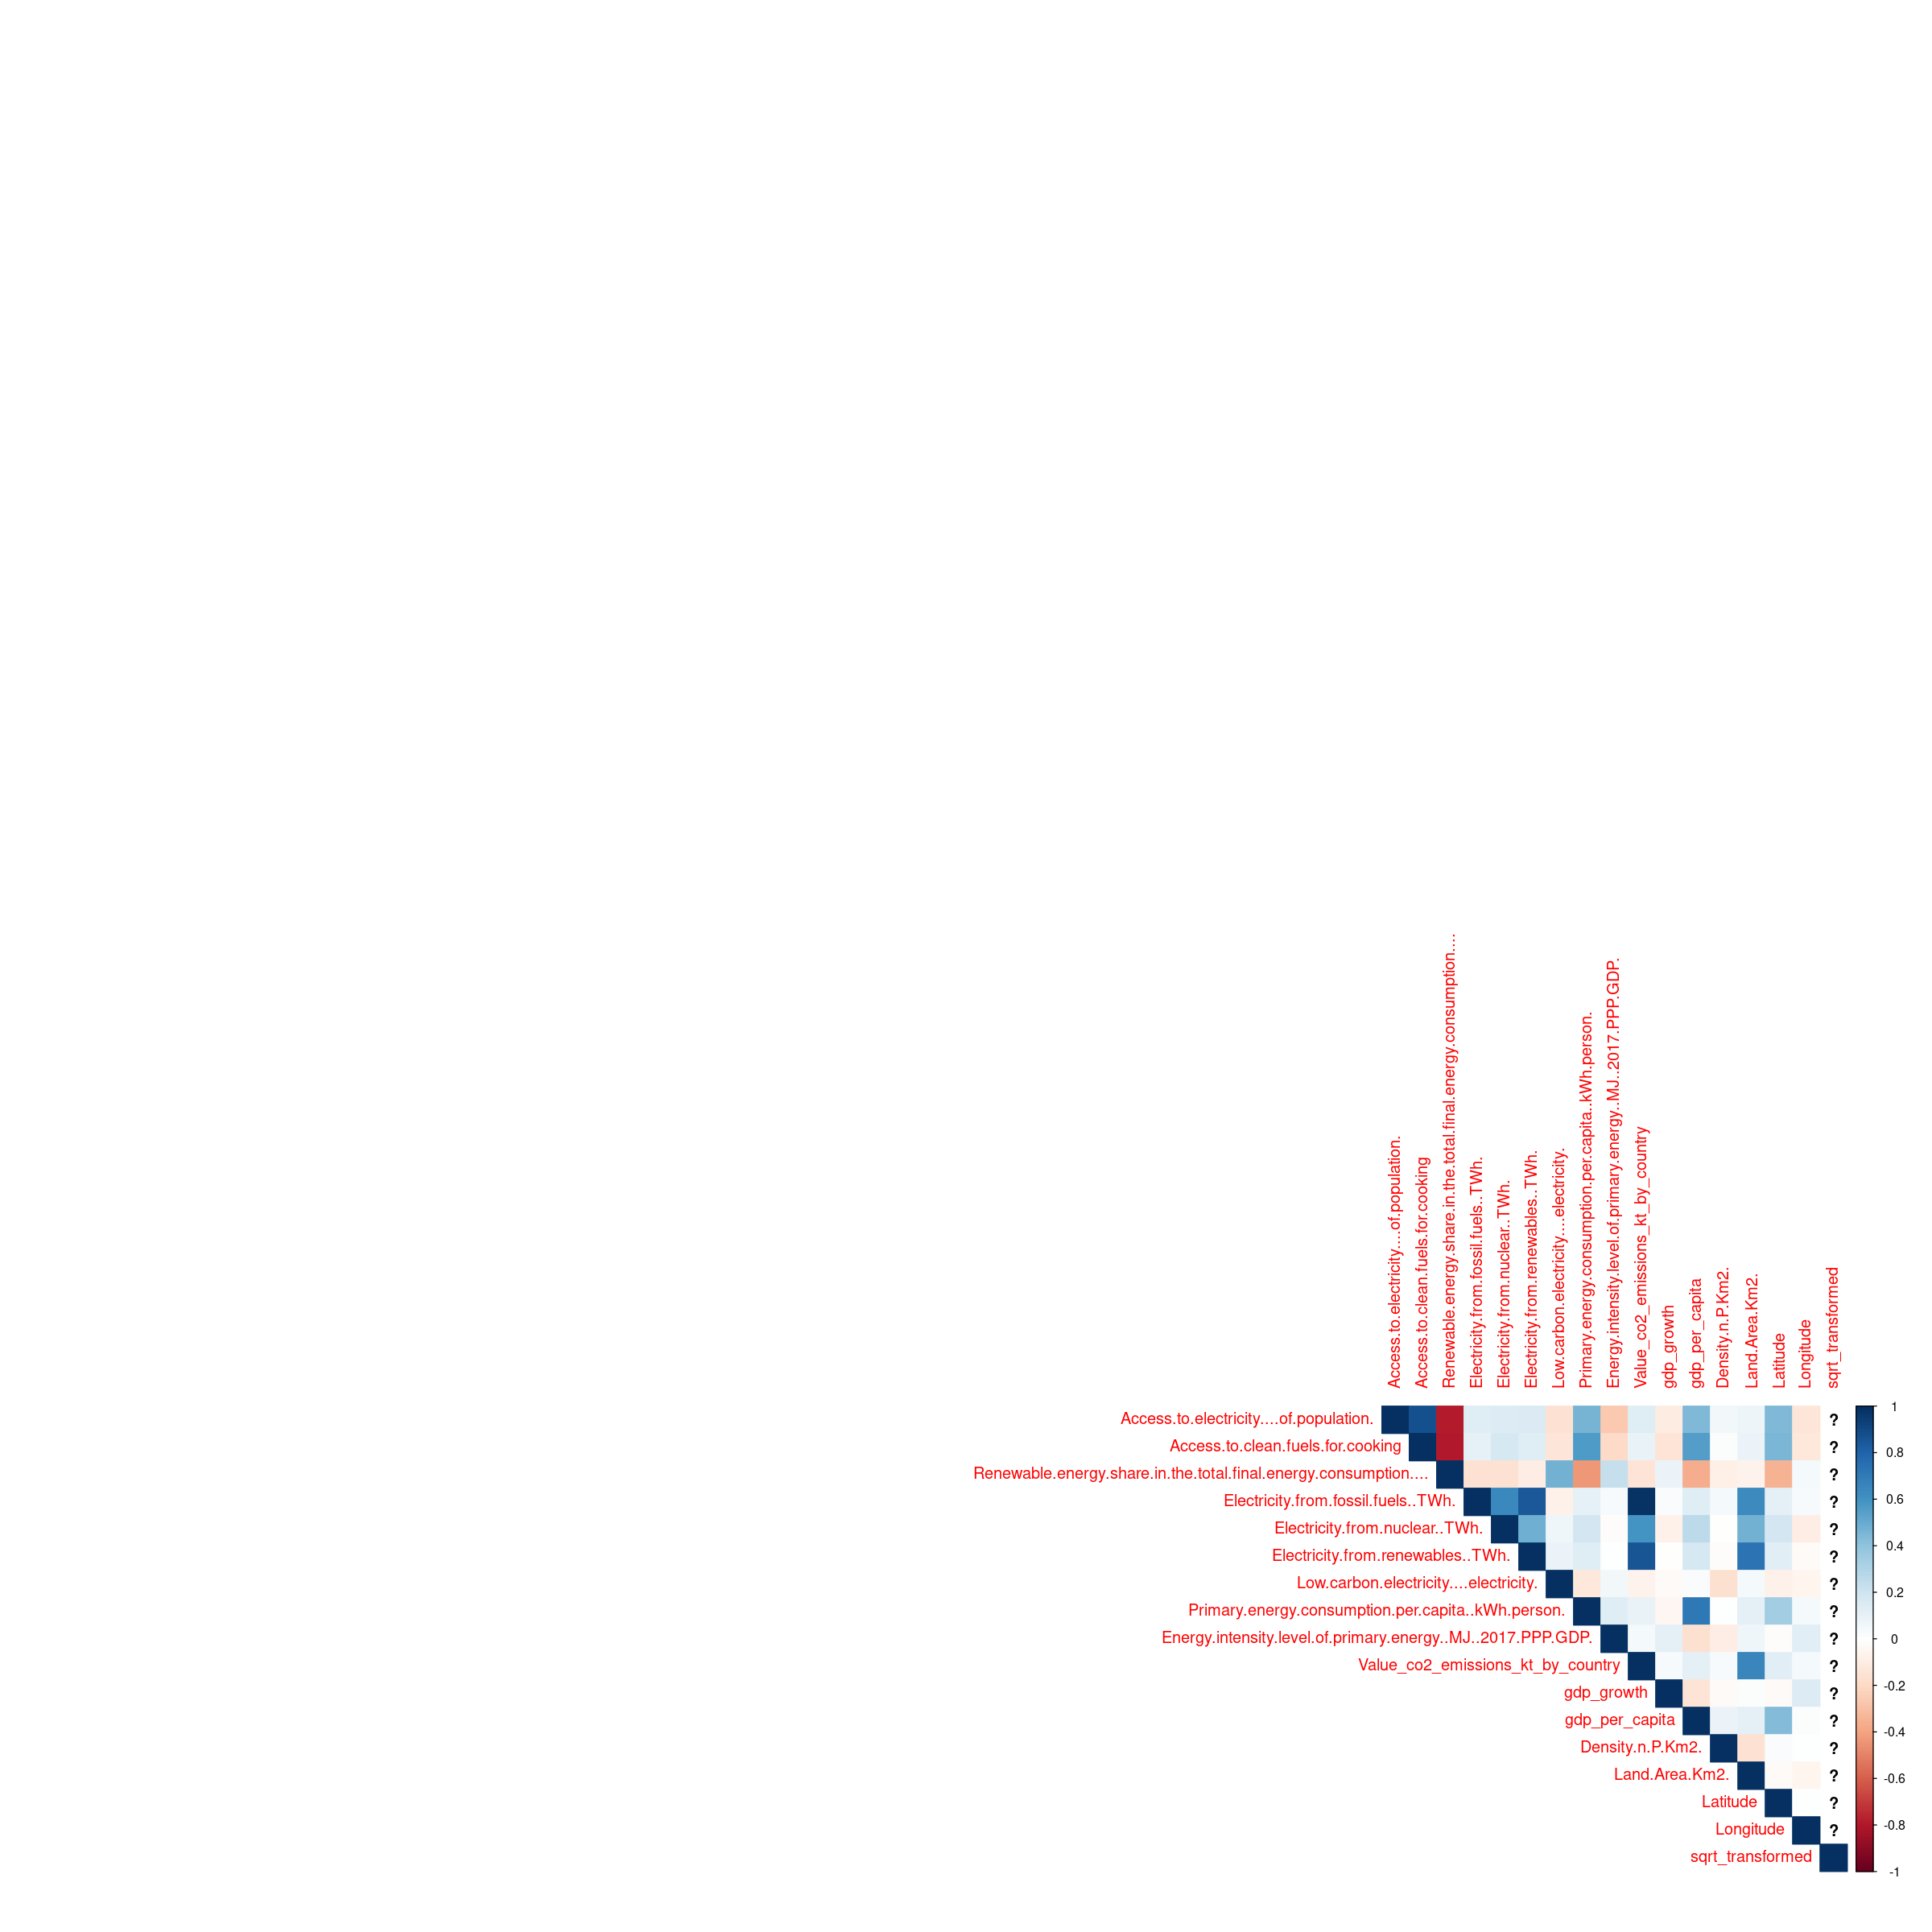

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)
clean_data <- na.omit(data)

M = cor(clean_data[,-c(1,2)])
corrplot(M, method="color", type="upper")

This correlation plot confirms that the access to electricity and the availability of clean fuels for cooking are negatively correlated to the share of renewable energy in total final energy consumption, and that the access to electricity and the availability of clean fuels for cooking is positively correlated.

Electricity from fossil fuels are correlated to electricity from renewables, which tells us that when a country produces a lot of energy from renewables, it is also likely that they produce a lot of fossil fuel. Electricity from nuclear is also correlated to the production of the other sources of energy. We also notice that for countries with bigger land area, more energy is produced (fossil, renewable and nuclear), and the carbon dioxide emissions per person is also bigger.

Primary energy consumption per capita is correlated to the GDP per capita.

We also learn that the variable "electricity from fossil fuels" is strongly positively correlated to the carbon dioxide emissions per person. In addition, electricity from renewables and electricity from nuclear is also positively correlated, electricity from renewables more than electricity from nuclear.

Other variables can also be commented, but the ones mentioned above gives us the most certain information. We also notice that a lot of the variables is not correlated at all or barely positively or negatively correlated.


## Question 7

The following commands perform a Principal Component Analysis (PCA) on quantitative variables.

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,4.5033806,26.490474,26.49047
comp 2,3.2080569,18.870923,45.36140
comp 3,1.3936568,8.197981,53.55938
comp 4,1.3532105,7.960062,61.51944
comp 5,1.0899332,6.411372,67.93081
comp 6,0.9982797,5.872234,73.80305
comp 7,0.8931025,5.253544,79.05659
comp 8,0.7766371,4.568453,83.62504


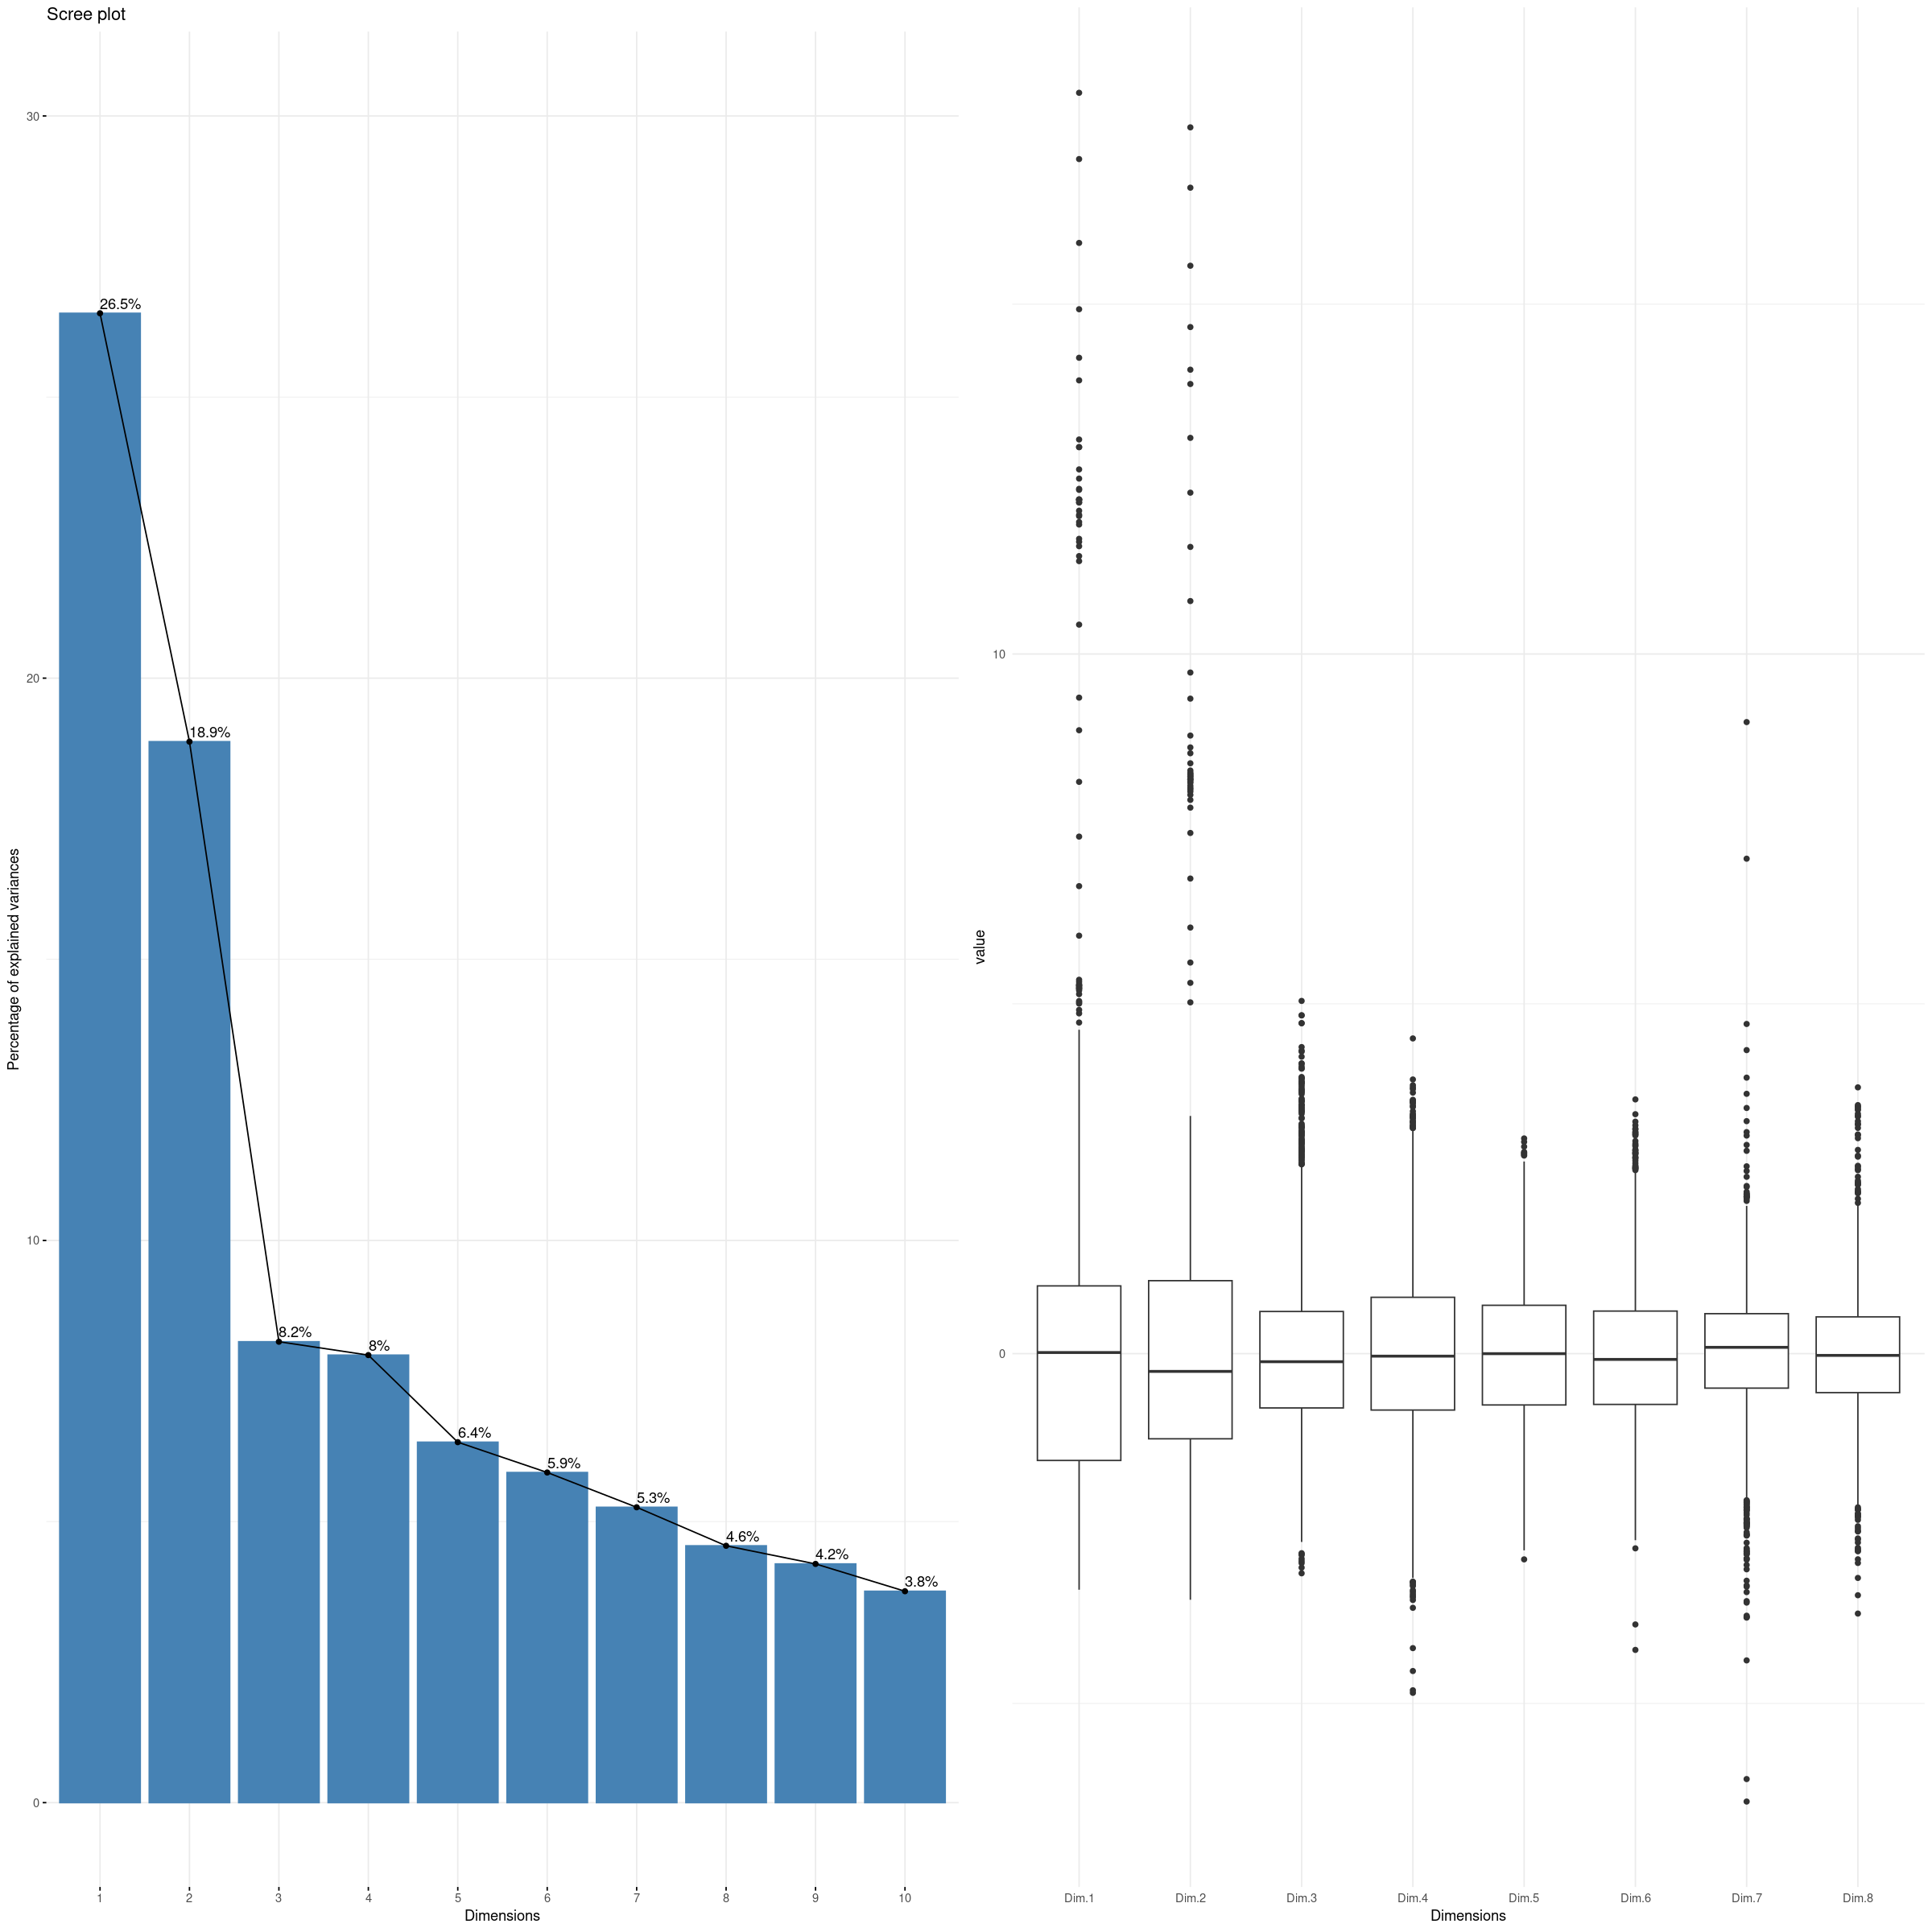

In [ ]:
# Selection of quantitative variables
data_quantitative <- data_complete[, sapply(data_complete, is.numeric)]

# ACP on quantitative variables
acp <- PCA(data_quantitative, scale.unit = TRUE, graph = FALSE, ncp = 9)

#List of the first 10 eigenvalues
print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
head(acp$eig, 10)

We observe a cumulative percentage of variance of 87.87116 corrisponding to 9 eigenvalues. Then, we will keep 9 dimensions as 87.87116% > 85%. 

The next plot shows the percentage of explained variance corresponding to each dimension.

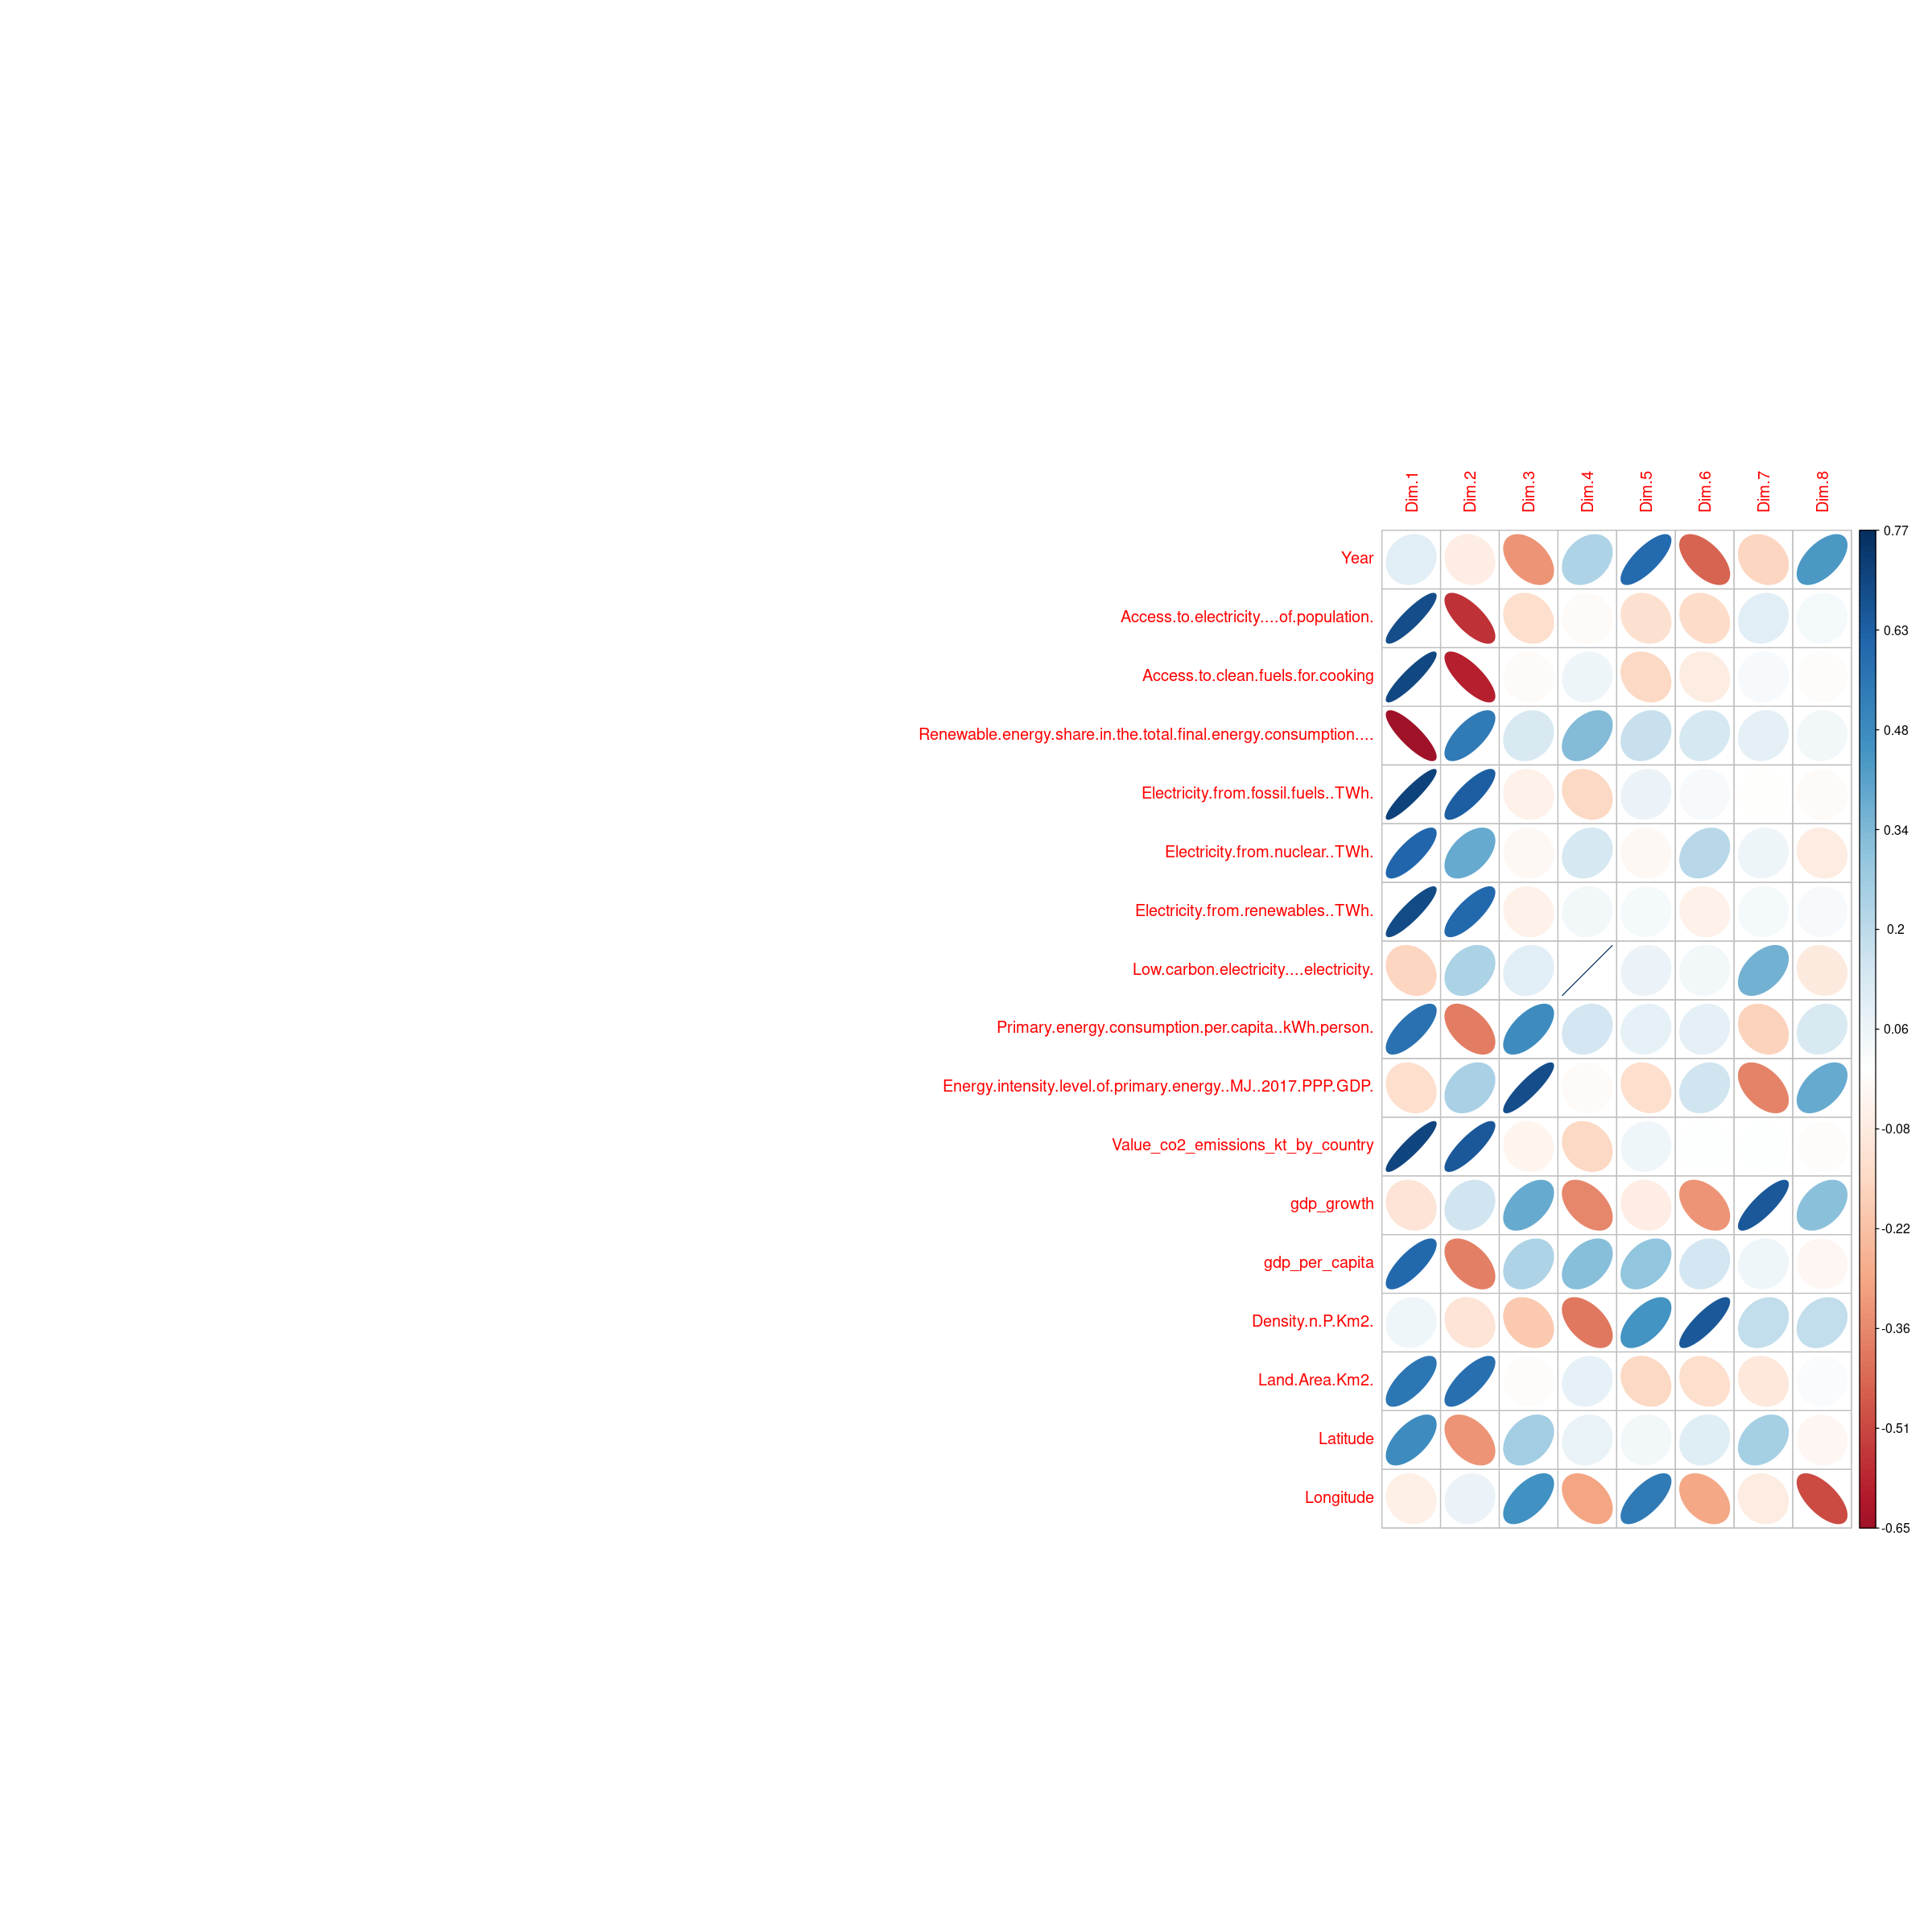

In [25]:
# Decay of Explained Variance
p <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 30)) +
  ggtitle("Decay of Explained Variance") +
  theme(plot.title = element_text(size = 30))

# Display the plot
print(p)

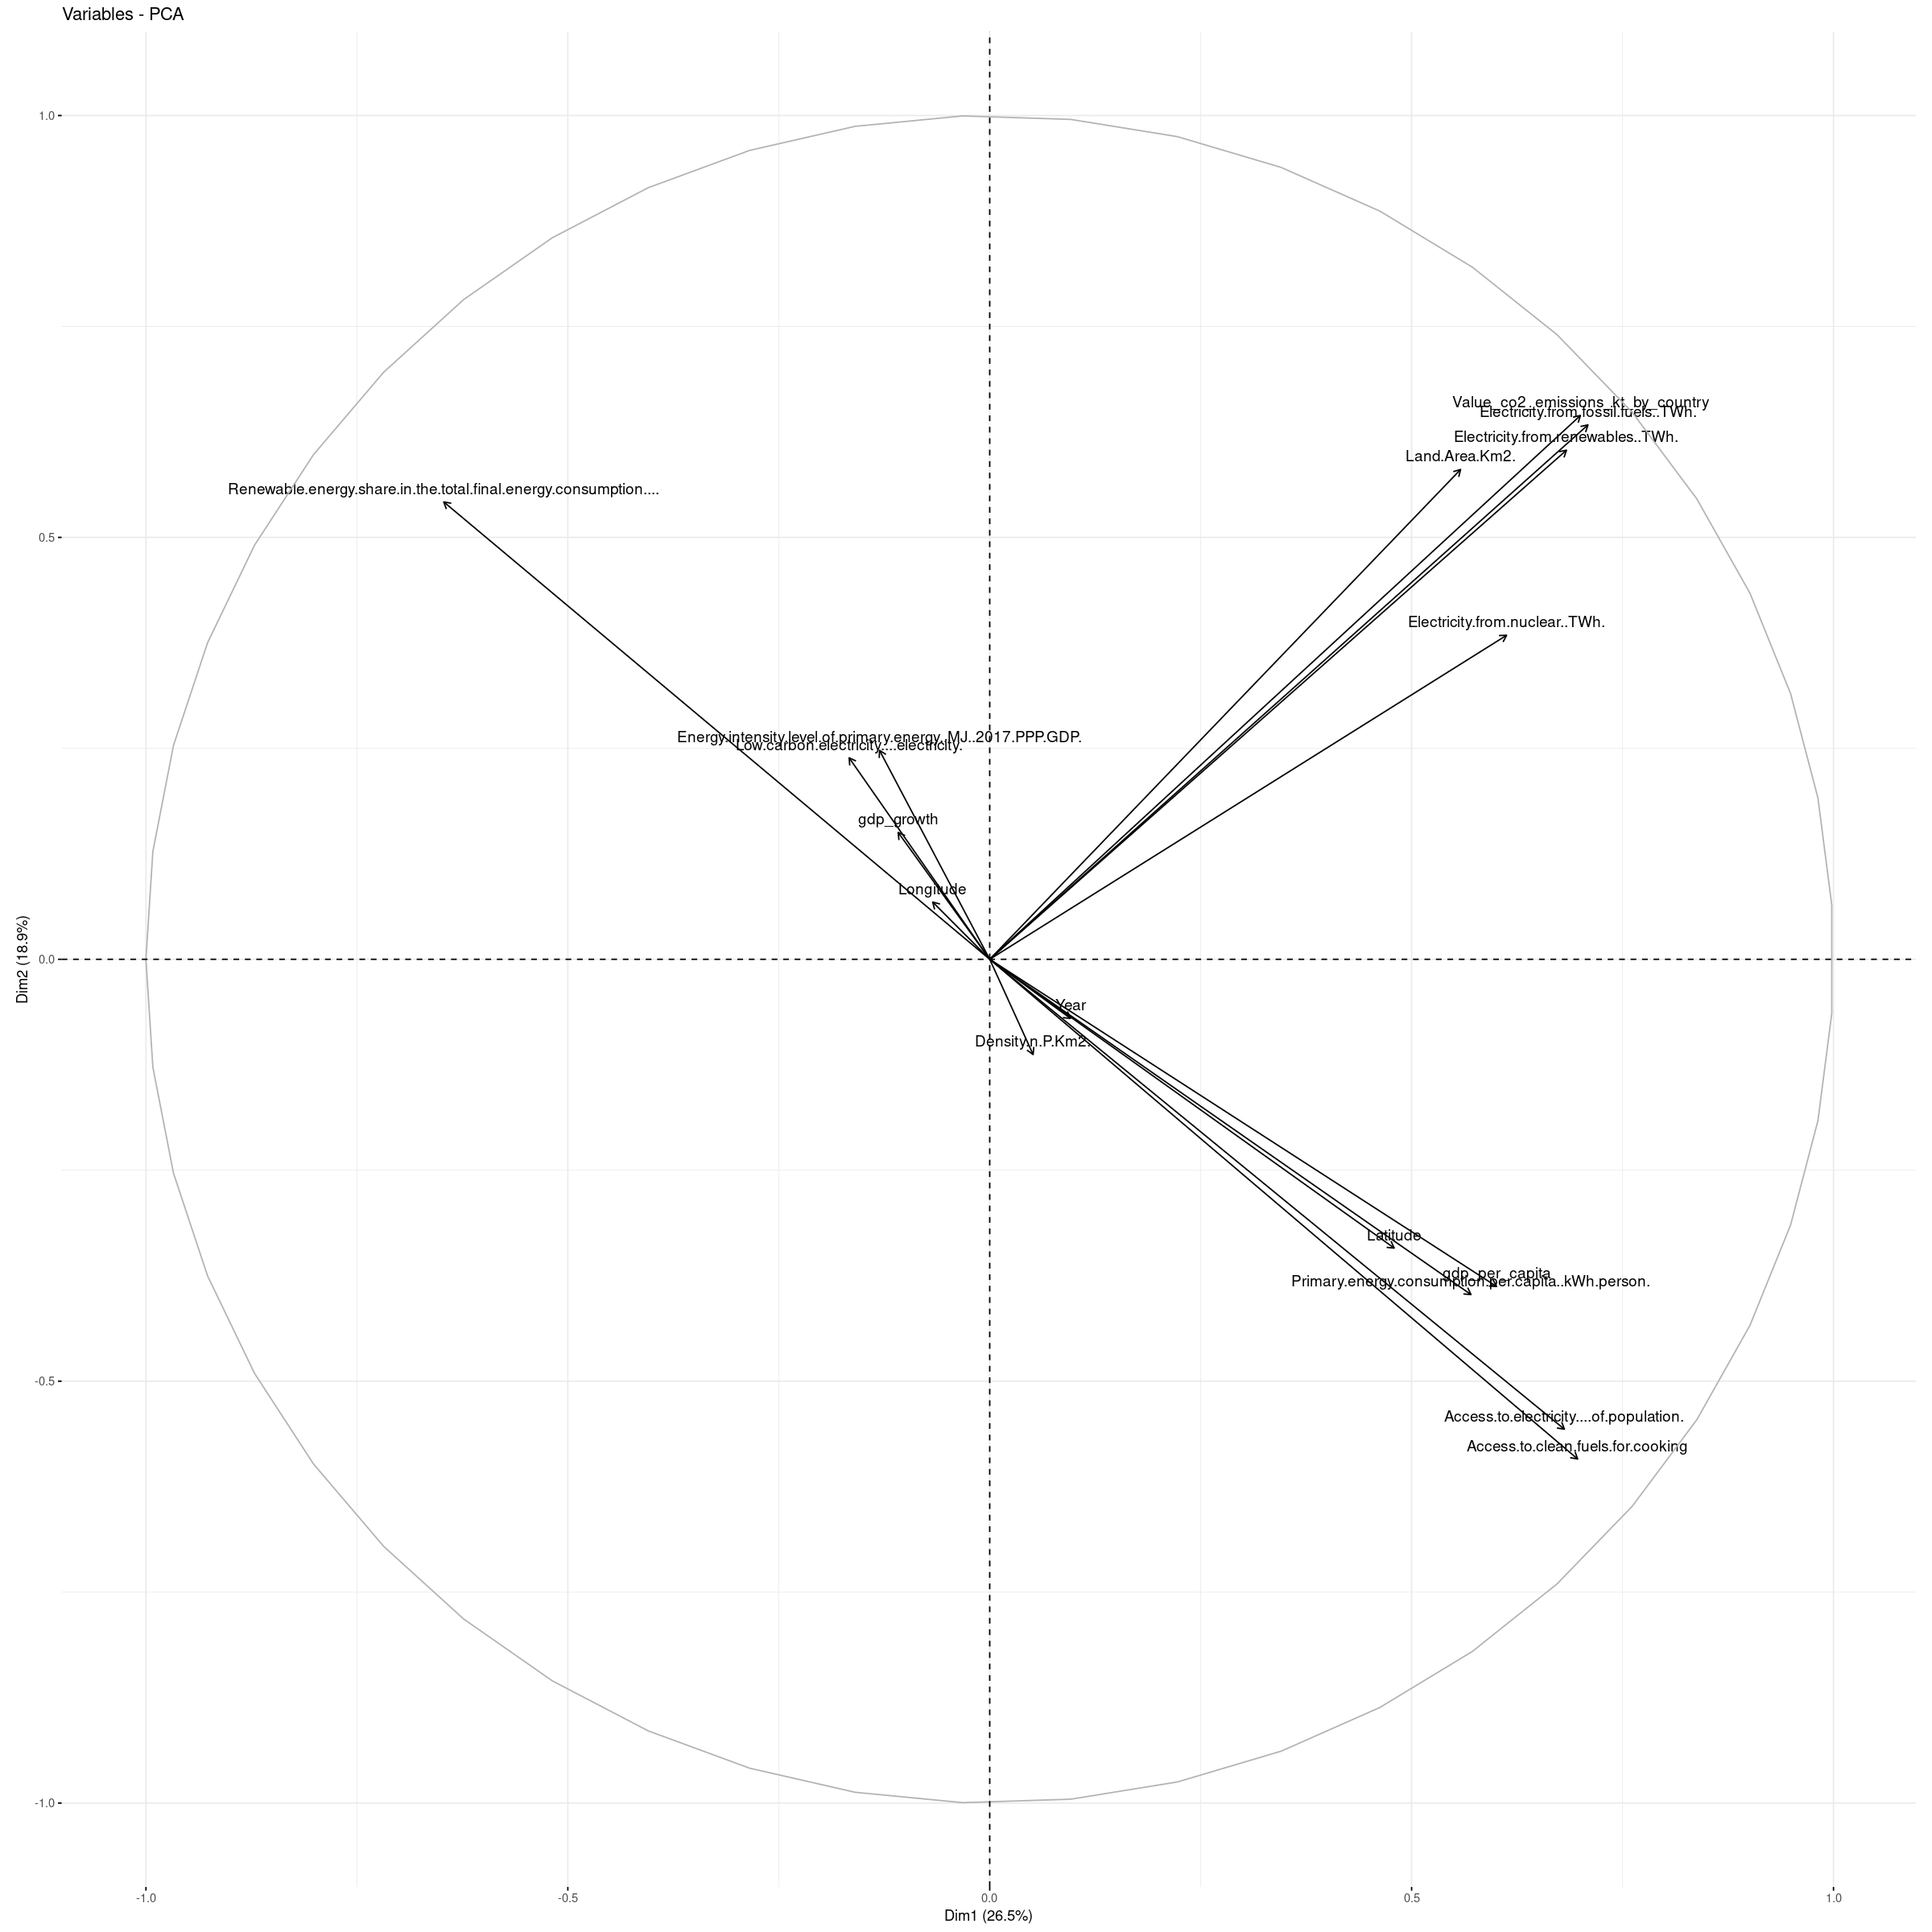

In [26]:
# Boxplots for individual coordinates
ggplot(melt(acp$ind$coord), aes(x = Var2, y = value)) +
  geom_boxplot() +
  ggtitle("Boxplots ") +
  xlab("Dimensions") +
  theme(plot.title = element_text(size = 30))


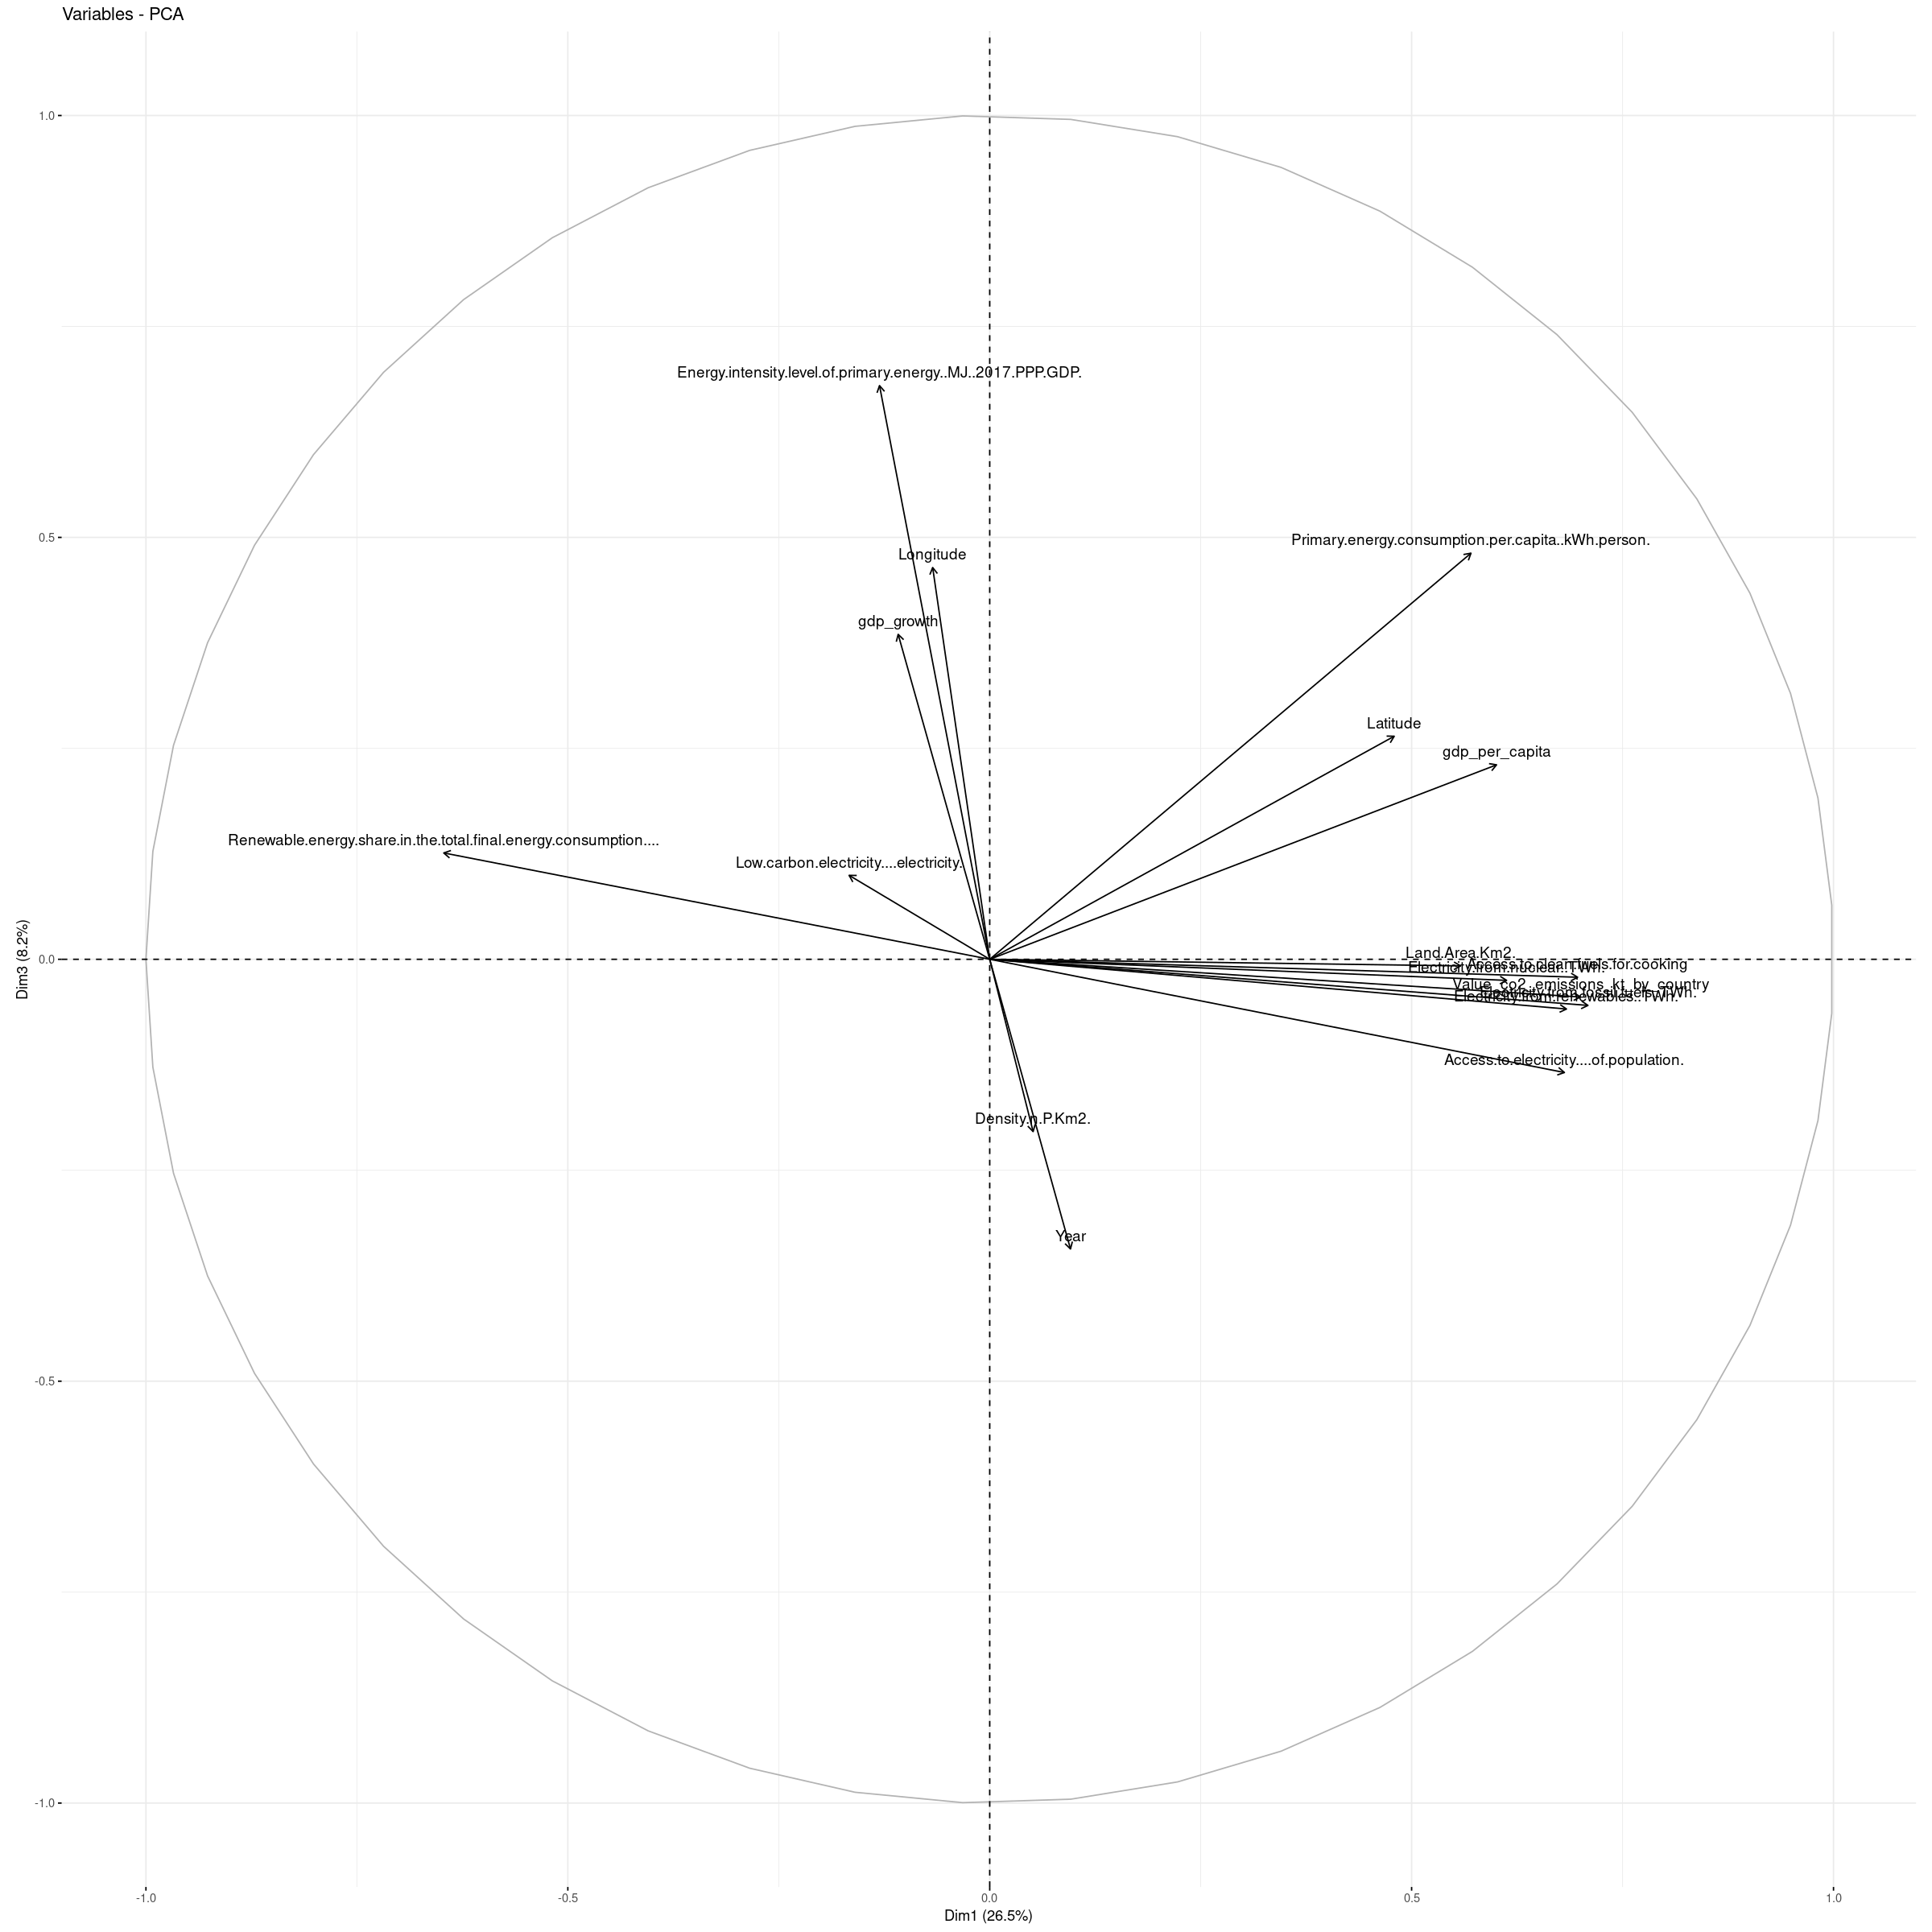

In [27]:
# Correlation matrix between variables and dimensions 
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse", 
         title = "Correlation Matrix between Variables and Dimensions")

In [ ]:
#Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2 of Principal Component Analysis (PCA
fviz_pca_var(acp, axes = c(1, 2), asp = 1)

In [ ]:
#Projection of variables onto the factorial plane composed of dimensions 1 and 3 of Principal Component Analysis (PCA).
fviz_pca_var(acp,axes=c(1,3))

## Question 8

Visualisation de la possible dépendance entre la variable "Year" et la variable à prédire, "Value-co2-emissions".

1. Graphique de dispersion.

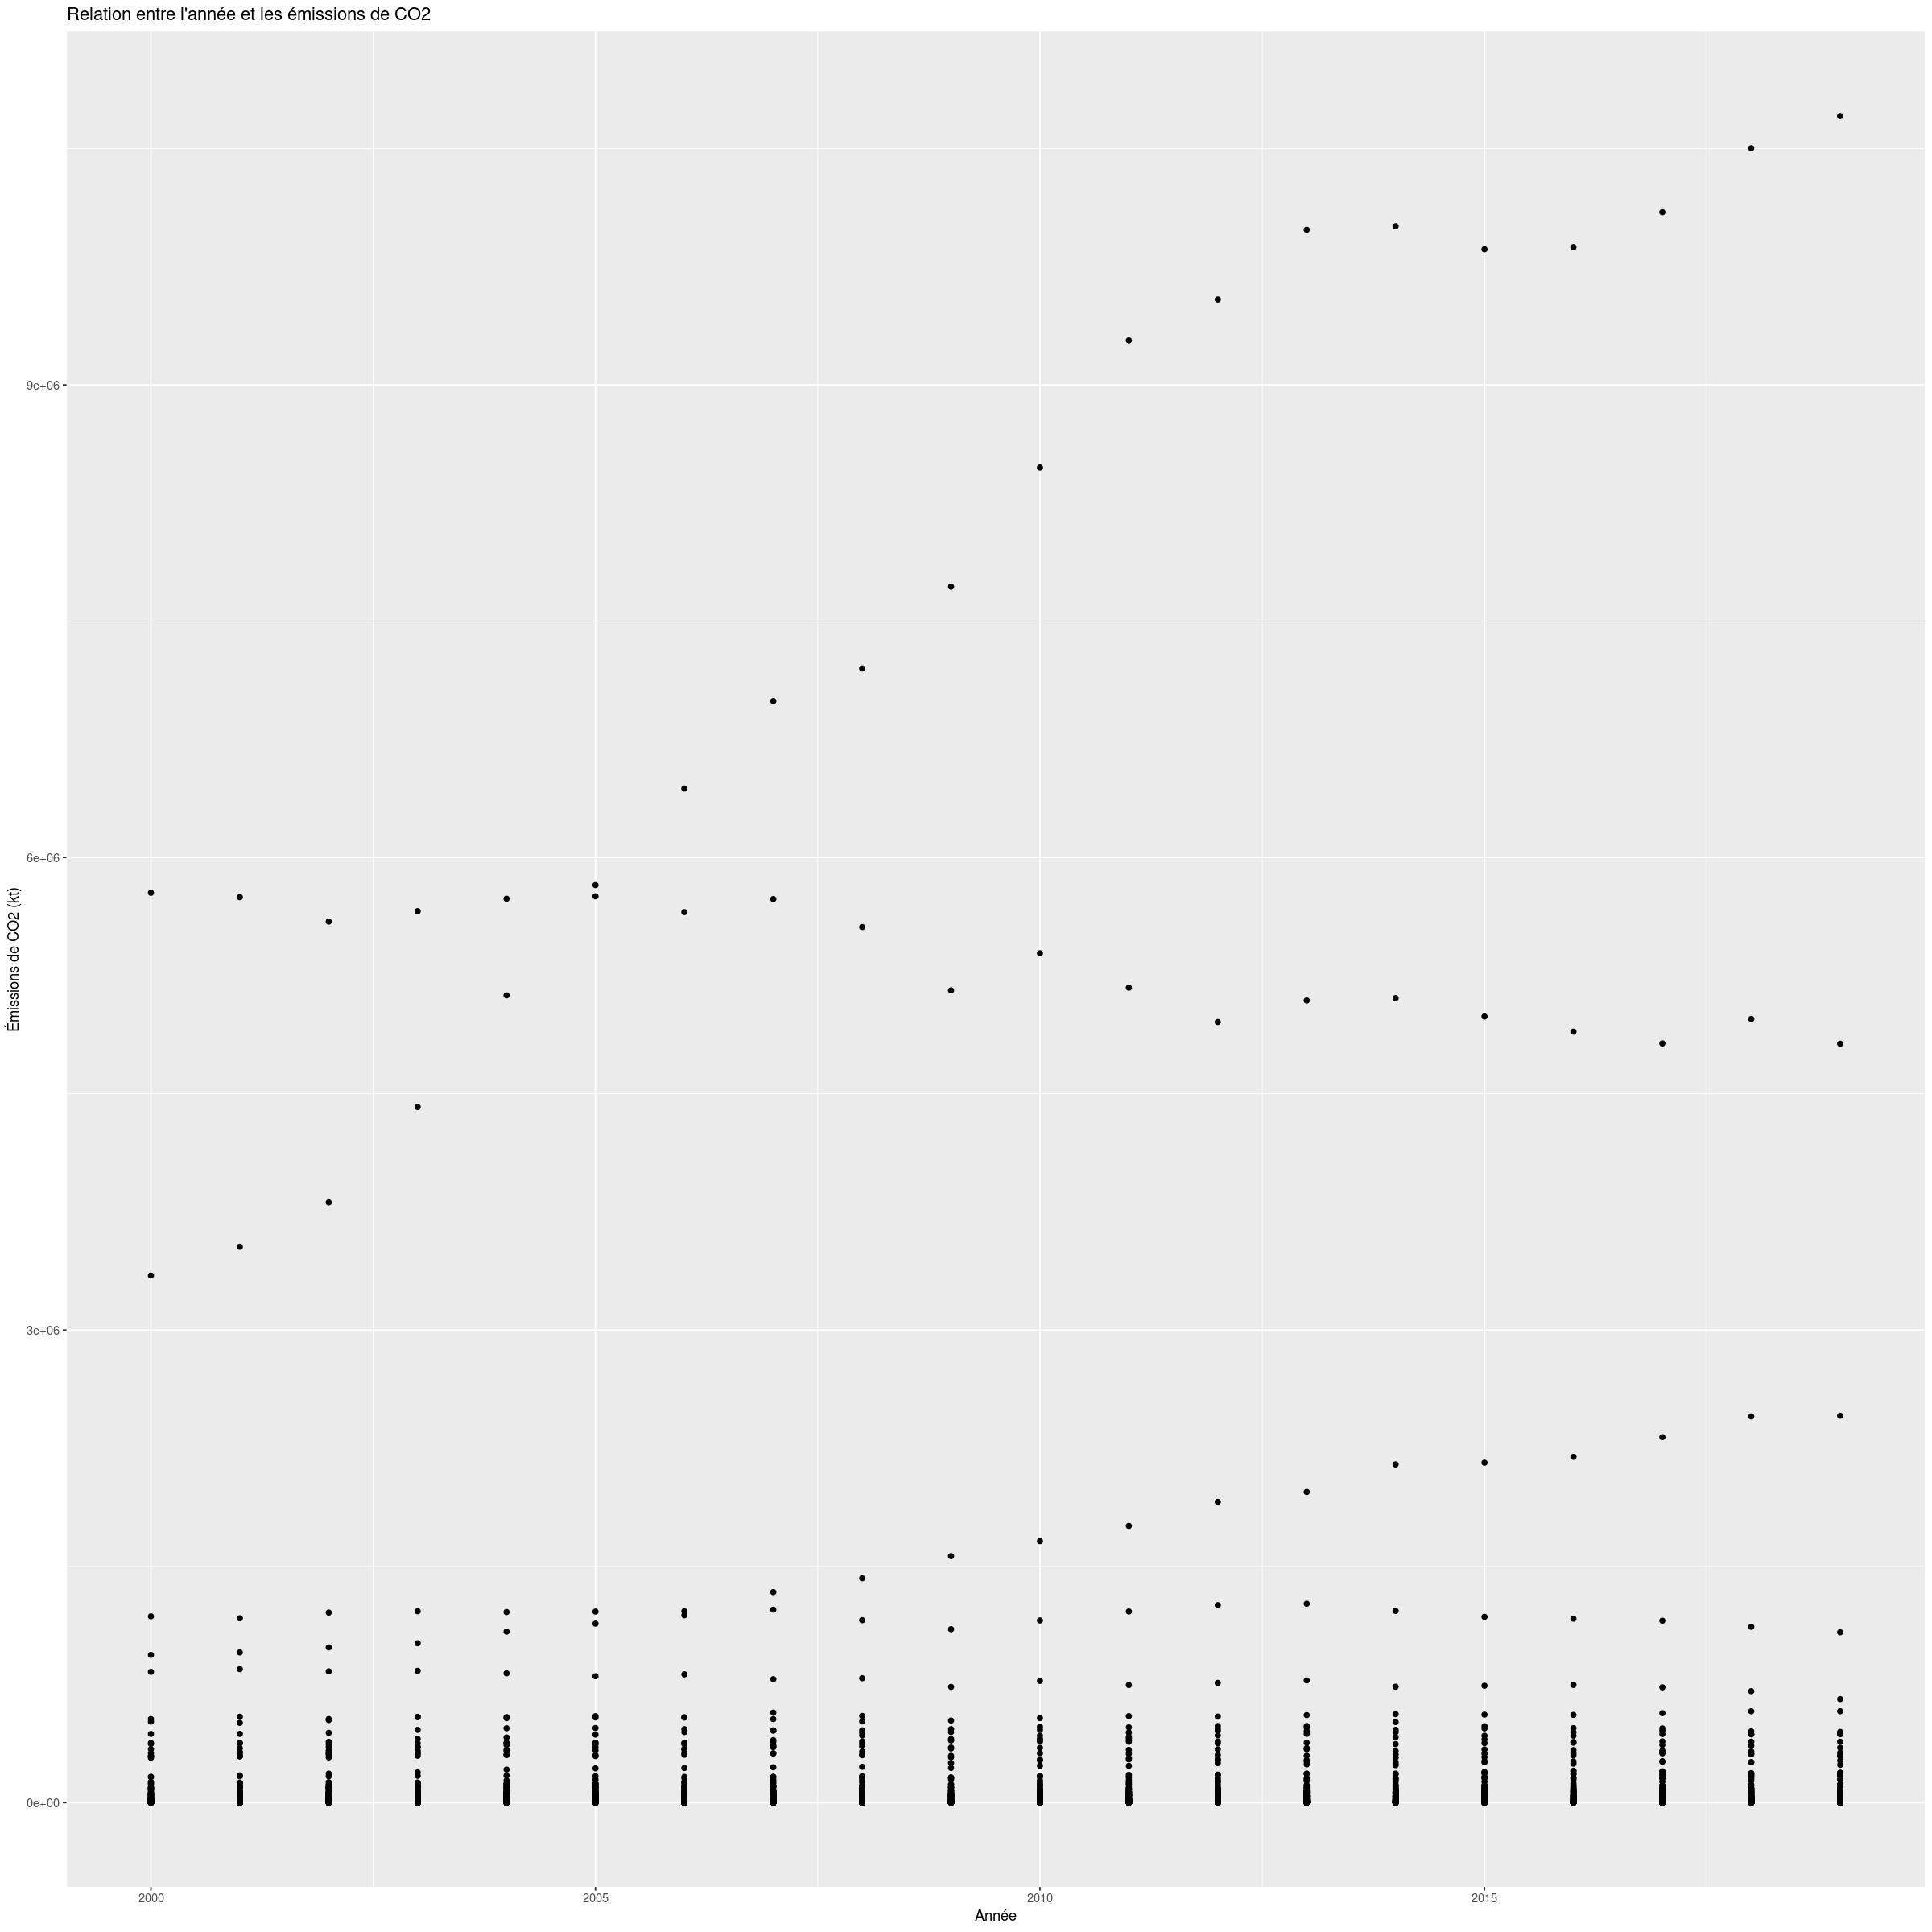

In [28]:
###
#### Pas sûre que c'est ce que les profs attendent
###
######
###
###

# Créer un graphique de dispersion
ggplot(data, aes(x = Year, y = Value_co2_emissions_kt_by_country)) +
  geom_point() +
  labs(x = "Année", y = "Émissions de CO2 (kt)") +
  ggtitle("Relation entre l'année et les émissions de CO2")

2. Coefficient de corrélation

In [29]:
#Coefficient de corrélation entre "Year" et "Value-co2-emissions".
correlation <- cor(data$Year, data$Value_co2_emissions_kt_by_country)
correlation

[1] 0.02055306

Un coefficient de corrélation proche de 1 ou -1 indique une forte corrélation, tandis qu'un coefficient proche de 0 indique une faible corrélation.
Nous observons une corrélation de 0.02, donc il n'existe pas une grande dépendance entre la variable "Year" et la variable "Value-co2-emissions".

3. Modèle de régression linéaire

In [30]:
#Modèle de régression linéaire pour prédire les émissions de CO2 en fonction de l'année
lm_model <- lm(Value_co2_emissions_kt_by_country ~ Year, data = data)
summary(lm_model)


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ Year, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
 -196220  -168142  -147500  -108185 10510940 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -5706591    5338676  -1.069    0.285
Year            2924       2657   1.101    0.271

Residual standard error: 818000 on 2866 degrees of freedom
Multiple R-squared:  0.0004224,	Adjusted R-squared:  7.366e-05 
F-statistic: 1.211 on 1 and 2866 DF,  p-value: 0.2712


 * Les p-values associées aux coefficients (0.285 pour l'intercept et 0.271 pour l'année) sont toutes deux supérieures à un seuil de signification communément utilisé de 0.05. Cela signifie qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle les coefficients sont nuls, ce qui suggère qu'il n'y a pas de relation significative entre l'année et les émissions de CO2.

* Le coefficient de détermination (R²) est très proche de zéro (0.0004224), ce qui indique que la régression linéaire ne parvient pas à expliquer une grande partie de la variation dans les émissions de CO2 à partir de l'année.

* Le test F a une statistique de 1.211 avec une p-value de 0.2712, ce qui confirme le manque de significativité globale du modèle de régression.

En conclusion, ces résultats suggèrent qu'il n'y a pas de relation significative entre l'année et les émissions de CO2 dans vos données.

# Modélisation


## Question 1

Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon test. Vous prendrez un pourcentage de 20% pour l’échantillon test.

In [31]:
###


Pourquoi cette étape est-elle nécessaire lorsque nous nous concentrons sur les performances des algorithmes ?

* Évaluation impartiale : Diviser les données en un ensemble d'apprentissage et un ensemble de test permet d'évaluer objectivement les performances de notre modèle. En utilisant un ensemble de test distinct, nous pouvons estimer la capacité de généralisation du modèle sur des données invisibles.

* Prévention du surapprentissage : L'utilisation d'un ensemble de test distinct permet de détecter le surapprentissage (overfitting) du modèle. Le surapprentissage se produit lorsqu'un modèle est trop complexe et capture le bruit dans les données d'apprentissage plutôt que les véritables relations. En évaluant le modèle sur un ensemble de test indépendant, nous pouvons détecter si le modèle généralise correctement ou s'il est trop spécifique aux données d'apprentissage.

* Optimisation des hyperparamètres : Lorsque nous ajustons les hyperparamètres du modèle (par exemple, la profondeur d'un arbre de décision, le nombre de voisins dans un algorithme k-plus proches voisins), diviser les données en ensembles d'apprentissage et de test nous permet de sélectionner les valeurs d'hyperparamètres qui donnent les meilleures performances sur des données invisibles.

* Estimation des performances attendues : Une fois que nous avons choisi un modèle final, nous pouvons l'évaluer sur l'ensemble de test pour obtenir une estimation honnête de ses performances attendues dans des situations réelles.